# Kelly Allocation with Bayesian Updating

The [Kelly criterion](http://www.herrold.com/brokerage/kelly.pdf), developed by John L. Kelly Jr. at Bell Labs, is an optimal sizing of bets, given an initial pool of wealth, to maximize the doubling rate of wealth in a repeated bets scenario. This has been applied to various games, including horse racing.

However, the major difficulty in applying the criterion is that it assumes that the true probabilities of an event occurring, say for instance, a horse winning a race, is known to the bettor. In reality, these probabilities *have to be estimated by the bettor*. The criterion is sensitive to the estimated probabilities, and since the criterion maximizes the wealth doubling exponent, mistakes made in the estimated probabilities can easily ruin the bettor over time.

For concreteness, we cast the problem to the specific problem of betting on horses at a race track. In order to estimate the probabilities, we cast the problem as a case of Bayesian updating.

In [1]:
import logging
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import dirichlet
from IPython.display import HTML, display
from core.log import create_logger
from core.simulate import plot_wealth, simulate
from core.util import cgr

logger = create_logger()

# Bayesian Updating in Horse racing

### Simulation

We will simulate a classic horse racing scenario to compare the performance of a Bayesian updating portfolio versus the optimal portfolio, the latter which the bettor knows the probability of each horse's win rate. Also, as part of the comparison, we add a portfolio that allocates capital uniformly over all horses, called the **uniform allocation portfolio**. We expect the Kelly based portfolios to outperform this benchmark portfolio.

Both portfolios will start with an initial wealth pool, the default example being $1.

In this simulator, given $k$ horses, each horse $i$ has a probability of winning the race, $p(i)$. The sum of all these probabilities $p(i)$, $i=1, 2, \cdots, k$ is equal to $1$. This case is no longer equivalent to the classic Beta-Bernoulli scenario as studied in introductory multiarm bandit literature, due to the dependency between the probabilities. Instead, the conjugate prior in this scenario is the [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution).

Horses have odds associated with each of them, determining the payout if a bet is place on the horse and the horse wins. For simplicity, we assume that the probabilities and odds remain the same from race to race, although this is not true in real-life parimutuel betting scenarios.

According to the Kelly criterion, a bet is only placed if the probability and the odd exceeds a certain threshold in a sub-fair odds scenario. Essentially, computation of the Kelly criterion under this scenario results in a water-filling algorithm (see Chapter 6 of Elements of Information Theory, 2nd ed.). In simple terms, the Kelly criterion will allocate its resources on high impact bets, while ignoring the rest.

Note that we essentially allocate our portfolio using a **Bayesian updating** mechanism: estimate the probabilities $p(i)$, for all $i$. Based on this, we compute the Kelly allocation to place our bets.

A burn-in period is required to get a reasonably good estimate of the probabilities before betting begins. Typically about 100 trials are required, but this is subject to more investigation. A final compound growth rate (CGR) over the total number of races the bettor has participated is computed. A plot of the growth of the wealth of the bettor under the Bayesian updating portfolio against the optimal portfolio, *i.e.,* where the bettor has knowledge of the exact winning probabilities, will be plotted.


### Parameters of the simulation

We will run the simulation over a set number of horse races. The parameters are
1. `num_races`: number of races the simulation will take place over,
1. `probabilities`: the true probabilities of each horse winning each race (note that the probabilities sum to 1), and
1. `odds`: the payout for each horse should it win the race.
1. `initial_wealth`: the initial wealth gamblers start off with (default: 1)

There is a `burn_in_period` for the Bayesian updating portfolio, since some of races will be required to get a good enough estimate of each horse's probability of winning a race.

In [2]:
# Set simulation parameters
num_races = 2000

probabilities = np.array([0.5, 0.1])
probabilities = np.append(probabilities, 1 - np.sum(probabilities))
odds = np.array([1.3, 7.0, 3.0])

initial_wealth = 1
burn_in_period = 100

In [3]:
bayesian_portfolio_history, optimal_portfolio_history, uniform_portfolio_history, bayesian_portfolio, optimal_portfolio, uniform_portfolio = simulate(
    initial_wealth,
    probabilities,
    odds,
    num_races,
    burn_in_period,
    logger
)

2020-01-12 05:58:53,856 - root - INFO - Race: 1
2020-01-12 05:58:53,872 - root - INFO - Bayesian updating Kelly exponent : 0.0006
2020-01-12 05:58:53,873 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:53,874 - root - INFO - Horse 0 wins
2020-01-12 05:58:53,875 - root - INFO - Race: 2
2020-01-12 05:58:53,886 - root - INFO - Bayesian updating Kelly exponent : 0.0595
2020-01-12 05:58:53,889 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:53,892 - root - INFO - Horse 0 wins
2020-01-12 05:58:53,894 - root - INFO - Race: 3
2020-01-12 05:58:53,907 - root - INFO - Bayesian updating Kelly exponent : 0.0032
2020-01-12 05:58:53,908 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:53,912 - root - INFO - Horse 0 wins
2020-01-12 05:58:53,916 - root - INFO - Race: 4
2020-01-12 05:58:53,930 - root - INFO - Bayesian updating Kelly exponent : 0.0952
2020-01-12 05:58:53,933 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:53,935 - root - 

2020-01-12 05:58:54,601 - root - INFO - Bayesian updating Kelly exponent : 0.0142
2020-01-12 05:58:54,608 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:54,610 - root - INFO - Horse 1 wins
2020-01-12 05:58:54,614 - root - INFO - Race: 34
2020-01-12 05:58:54,622 - root - INFO - Bayesian updating Kelly exponent : 0.1302
2020-01-12 05:58:54,626 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:54,628 - root - INFO - Horse 0 wins
2020-01-12 05:58:54,629 - root - INFO - Race: 35
2020-01-12 05:58:54,643 - root - INFO - Bayesian updating Kelly exponent : 0.0012
2020-01-12 05:58:54,644 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:54,646 - root - INFO - Horse 0 wins
2020-01-12 05:58:54,647 - root - INFO - Race: 36
2020-01-12 05:58:54,654 - root - INFO - Bayesian updating Kelly exponent : 0.0000
2020-01-12 05:58:54,656 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:54,659 - root - INFO - Horse 0 wins
2020-01-12 05:58:54,661 -

2020-01-12 05:58:55,057 - root - INFO - Bayesian updating Kelly exponent : 0.0092
2020-01-12 05:58:55,059 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:55,066 - root - INFO - Horse 2 wins
2020-01-12 05:58:55,067 - root - INFO - Race: 66
2020-01-12 05:58:55,079 - root - INFO - Bayesian updating Kelly exponent : 0.0757
2020-01-12 05:58:55,081 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:55,083 - root - INFO - Horse 0 wins
2020-01-12 05:58:55,084 - root - INFO - Race: 67
2020-01-12 05:58:55,091 - root - INFO - Bayesian updating Kelly exponent : 0.0000
2020-01-12 05:58:55,093 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:55,094 - root - INFO - Horse 0 wins
2020-01-12 05:58:55,096 - root - INFO - Race: 68
2020-01-12 05:58:55,104 - root - INFO - Bayesian updating Kelly exponent : 0.0063
2020-01-12 05:58:55,106 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:55,107 - root - INFO - Horse 2 wins
2020-01-12 05:58:55,110 -

2020-01-12 05:58:55,407 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:55,408 - root - INFO - Horse 0 wins
2020-01-12 05:58:55,410 - root - INFO - Race: 98
2020-01-12 05:58:55,418 - root - INFO - Bayesian updating Kelly exponent : 0.0285
2020-01-12 05:58:55,420 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:55,421 - root - INFO - Horse 2 wins
2020-01-12 05:58:55,423 - root - INFO - Race: 99
2020-01-12 05:58:55,428 - root - INFO - Bayesian updating Kelly exponent : 0.0000
2020-01-12 05:58:55,429 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:55,430 - root - INFO - Horse 2 wins
2020-01-12 05:58:55,431 - root - INFO - Race: 100
2020-01-12 05:58:55,436 - root - INFO - Bayesian updating Kelly exponent : 0.0000
2020-01-12 05:58:55,437 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:55,438 - root - INFO - Horse 0 wins
2020-01-12 05:58:55,439 - root - INFO - Race: 101
2020-01-12 05:58:55,446 - root - INFO - Bayesian updatin

2020-01-12 05:58:55,661 - root - INFO - Net wealth change: 29.04%
2020-01-12 05:58:55,663 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:58:55,665 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:58:55,666 - root - INFO - Safe wealth: 0.71
2020-01-12 05:58:55,668 - root - INFO - Amount won: 0.24
2020-01-12 05:58:55,670 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:58:55,671 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:58:55,672 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:58:55,673 - root - INFO - Safe wealth: 0.03
2020-01-12 05:58:55,674 - root - INFO - Amount won: 0.08
2020-01-12 05:58:55,676 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:58:55,678 - root - INFO - Race: 108
2020-01-12 05:58:55,685 - root - INFO - Bayesian updating Kelly exponent : 0.0141
2020-01-12 05:58:55,686 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:55,687 - root - INFO - Hors

2020-01-12 05:58:55,917 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:58:55,918 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:58:55,919 - root - INFO - Safe wealth: 0.02
2020-01-12 05:58:55,921 - root - INFO - Amount won: 0.15
2020-01-12 05:58:55,923 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:58:55,924 - root - INFO - Race: 114
2020-01-12 05:58:55,932 - root - INFO - Bayesian updating Kelly exponent : 0.0001
2020-01-12 05:58:55,933 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:55,937 - root - INFO - Horse 0 wins
2020-01-12 05:58:55,939 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:58:55,941 - root - INFO - Allocation: [9.92716065e-01 6.42931888e-17 3.39897381e-17 7.28393476e-03]
2020-01-12 05:58:55,942 - root - INFO - Safe wealth: 0.60
2020-01-12 05:58:55,944 - root - INFO - Amount won: 0.00
2020-01-12 05:58:55,947 - root - INFO - Net wealth change: -0.73%
2020-01-12 05:58:55,949 - root - INFO - -------

2020-01-12 05:58:56,152 - root - INFO - Bayesian updating Kelly exponent : 0.0097
2020-01-12 05:58:56,153 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:56,154 - root - INFO - Horse 2 wins
2020-01-12 05:58:56,156 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:58:56,159 - root - INFO - Allocation: [0.90354839 0.         0.010317   0.0861346 ]
2020-01-12 05:58:56,162 - root - INFO - Safe wealth: 0.38
2020-01-12 05:58:56,163 - root - INFO - Amount won: 0.11
2020-01-12 05:58:56,164 - root - INFO - Net wealth change: 16.20%
2020-01-12 05:58:56,165 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:58:56,167 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:58:56,169 - root - INFO - Safe wealth: 0.32
2020-01-12 05:58:56,170 - root - INFO - Amount won: 0.11
2020-01-12 05:58:56,172 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:58:56,180 - root - INFO - ------- UNIFORM ----------
2020-01-12

2020-01-12 05:58:56,366 - root - INFO - Safe wealth: 0.38
2020-01-12 05:58:56,368 - root - INFO - Amount won: 0.18
2020-01-12 05:58:56,372 - root - INFO - Net wealth change: 27.74%
2020-01-12 05:58:56,373 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:58:56,376 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:58:56,378 - root - INFO - Safe wealth: 0.40
2020-01-12 05:58:56,382 - root - INFO - Amount won: 0.13
2020-01-12 05:58:56,382 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:58:56,383 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:58:56,384 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:58:56,385 - root - INFO - Safe wealth: 0.00
2020-01-12 05:58:56,386 - root - INFO - Amount won: 0.01
2020-01-12 05:58:56,387 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:58:56,389 - root - INFO - Race: 127
2020-01-12 05:58:56,395 - root - INFO - Bayesian updating Kelly exponent : 0.0013
2

2020-01-12 05:58:56,601 - root - INFO - Safe wealth: 0.29
2020-01-12 05:58:56,602 - root - INFO - Amount won: 0.10
2020-01-12 05:58:56,603 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:58:56,606 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:58:56,616 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:58:56,618 - root - INFO - Safe wealth: 0.00
2020-01-12 05:58:56,621 - root - INFO - Amount won: 0.00
2020-01-12 05:58:56,622 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:58:56,623 - root - INFO - Race: 133
2020-01-12 05:58:56,633 - root - INFO - Bayesian updating Kelly exponent : 0.0008
2020-01-12 05:58:56,634 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:56,635 - root - INFO - Horse 0 wins
2020-01-12 05:58:56,637 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:58:56,639 - root - INFO - Allocation: [0.98633758 0.         0.01366242 0.        ]
2020-01-12 05:58:56,641 - root - INFO - Safe wealth: 0.43
2020-01

2020-01-12 05:58:56,817 - root - INFO - Safe wealth: 0.00
2020-01-12 05:58:56,819 - root - INFO - Amount won: 0.00
2020-01-12 05:58:56,821 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:58:56,823 - root - INFO - Race: 139
2020-01-12 05:58:56,831 - root - INFO - Bayesian updating Kelly exponent : 0.0078
2020-01-12 05:58:56,832 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:56,834 - root - INFO - Horse 0 wins
2020-01-12 05:58:56,835 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:58:56,837 - root - INFO - Allocation: [9.24042790e-01 9.54097912e-18 4.52587775e-02 3.06984328e-02]
2020-01-12 05:58:56,838 - root - INFO - Safe wealth: 0.30
2020-01-12 05:58:56,841 - root - INFO - Amount won: 0.00
2020-01-12 05:58:56,842 - root - INFO - Net wealth change: -7.60%
2020-01-12 05:58:56,843 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:58:56,846 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12

2020-01-12 05:58:57,148 - root - INFO - Horse 2 wins
2020-01-12 05:58:57,151 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:58:57,154 - root - INFO - Allocation: [1.00000000e+00 1.29562160e-17 0.00000000e+00 9.21282601e-17]
2020-01-12 05:58:57,157 - root - INFO - Safe wealth: 0.34
2020-01-12 05:58:57,159 - root - INFO - Amount won: 0.00
2020-01-12 05:58:57,161 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:58:57,164 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:58:57,179 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:58:57,181 - root - INFO - Safe wealth: 0.23
2020-01-12 05:58:57,183 - root - INFO - Amount won: 0.08
2020-01-12 05:58:57,184 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:58:57,186 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:58:57,188 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:58:57,192 - root - INFO - Safe wealth: 0.00
2020-01-12 05:

2020-01-12 05:58:57,506 - root - INFO - Net wealth change: -10.39%
2020-01-12 05:58:57,508 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:58:57,511 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:58:57,512 - root - INFO - Safe wealth: 0.16
2020-01-12 05:58:57,513 - root - INFO - Amount won: 0.00
2020-01-12 05:58:57,516 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:58:57,517 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:58:57,519 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:58:57,521 - root - INFO - Safe wealth: 0.00
2020-01-12 05:58:57,523 - root - INFO - Amount won: 0.00
2020-01-12 05:58:57,525 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:58:57,526 - root - INFO - Race: 152
2020-01-12 05:58:57,534 - root - INFO - Bayesian updating Kelly exponent : -0.0000
2020-01-12 05:58:57,536 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:57,538 - root - INFO - 

2020-01-12 05:58:57,737 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:58:57,739 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:58:57,743 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:58:57,747 - root - INFO - Safe wealth: 0.00
2020-01-12 05:58:57,772 - root - INFO - Amount won: 0.00
2020-01-12 05:58:57,780 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:58:57,782 - root - INFO - Race: 158
2020-01-12 05:58:57,793 - root - INFO - Bayesian updating Kelly exponent : 0.0111
2020-01-12 05:58:57,794 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:57,796 - root - INFO - Horse 0 wins
2020-01-12 05:58:57,797 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:58:57,799 - root - INFO - Allocation: [9.11024680e-01 3.15719673e-16 0.00000000e+00 8.89753197e-02]
2020-01-12 05:58:57,806 - root - INFO - Safe wealth: 0.22
2020-01-12 05:58:57,808 - root - INFO - Amount won: 0.00
2020-01-12 05:58:57,809 - root - INFO - Net wea

2020-01-12 05:58:58,058 - root - INFO - Race: 164
2020-01-12 05:58:58,067 - root - INFO - Bayesian updating Kelly exponent : 0.0011
2020-01-12 05:58:58,068 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:58,071 - root - INFO - Horse 2 wins
2020-01-12 05:58:58,073 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:58:58,075 - root - INFO - Allocation: [9.71812691e-01 3.12250226e-17 3.23092247e-17 2.81873088e-02]
2020-01-12 05:58:58,080 - root - INFO - Safe wealth: 0.25
2020-01-12 05:58:58,082 - root - INFO - Amount won: 0.02
2020-01-12 05:58:58,083 - root - INFO - Net wealth change: 5.64%
2020-01-12 05:58:58,087 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:58:58,091 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:58:58,094 - root - INFO - Safe wealth: 0.31
2020-01-12 05:58:58,096 - root - INFO - Amount won: 0.10
2020-01-12 05:58:58,097 - root - INFO - Net wealth change: 19.95%
2020-01-12 0

2020-01-12 05:58:58,253 - root - INFO - Allocation: [9.46619356e-01 0.00000000e+00 1.40512602e-16 5.33806439e-02]
2020-01-12 05:58:58,255 - root - INFO - Safe wealth: 0.23
2020-01-12 05:58:58,256 - root - INFO - Amount won: 0.00
2020-01-12 05:58:58,257 - root - INFO - Net wealth change: -5.34%
2020-01-12 05:58:58,258 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:58:58,259 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:58:58,260 - root - INFO - Safe wealth: 0.39
2020-01-12 05:58:58,261 - root - INFO - Amount won: 0.00
2020-01-12 05:58:58,262 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:58:58,263 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:58:58,264 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:58:58,265 - root - INFO - Safe wealth: 0.00
2020-01-12 05:58:58,266 - root - INFO - Amount won: 0.00
2020-01-12 05:58:58,267 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:58:

2020-01-12 05:58:58,426 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:58:58,427 - root - INFO - Safe wealth: 0.88
2020-01-12 05:58:58,428 - root - INFO - Amount won: 0.29
2020-01-12 05:58:58,430 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:58:58,431 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:58:58,432 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:58:58,433 - root - INFO - Safe wealth: 0.00
2020-01-12 05:58:58,434 - root - INFO - Amount won: 0.00
2020-01-12 05:58:58,435 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:58:58,436 - root - INFO - Race: 177
2020-01-12 05:58:58,439 - root - INFO - Bayesian updating Kelly exponent : 0.0012
2020-01-12 05:58:58,440 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:58,441 - root - INFO - Horse 2 wins
2020-01-12 05:58:58,442 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:58:58,443 - root - INFO - Allocatio

2020-01-12 05:58:58,589 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:58:58,590 - root - INFO - Safe wealth: 0.00
2020-01-12 05:58:58,591 - root - INFO - Amount won: 0.00
2020-01-12 05:58:58,591 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:58:58,593 - root - INFO - Race: 183
2020-01-12 05:58:58,599 - root - INFO - Bayesian updating Kelly exponent : 0.0008
2020-01-12 05:58:58,599 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:58,600 - root - INFO - Horse 2 wins
2020-01-12 05:58:58,601 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:58:58,602 - root - INFO - Allocation: [0.97595463 0.         0.         0.02404537]
2020-01-12 05:58:58,603 - root - INFO - Safe wealth: 0.30
2020-01-12 05:58:58,604 - root - INFO - Amount won: 0.02
2020-01-12 05:58:58,604 - root - INFO - Net wealth change: 4.81%
2020-01-12 05:58:58,605 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:58:58,606 - root - INFO - Allocation: [9.00254254e-0

2020-01-12 05:58:58,789 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:58,791 - root - INFO - Horse 1 wins
2020-01-12 05:58:58,793 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:58:58,795 - root - INFO - Allocation: [0.97617426 0.         0.         0.02382574]
2020-01-12 05:58:58,797 - root - INFO - Safe wealth: 0.41
2020-01-12 05:58:58,799 - root - INFO - Amount won: 0.00
2020-01-12 05:58:58,801 - root - INFO - Net wealth change: -2.38%
2020-01-12 05:58:58,803 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:58:58,805 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:58:58,809 - root - INFO - Safe wealth: 1.67
2020-01-12 05:58:58,811 - root - INFO - Amount won: 0.00
2020-01-12 05:58:58,813 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:58:58,815 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:58:58,817 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:5

2020-01-12 05:58:59,139 - root - INFO - Amount won: 0.06
2020-01-12 05:58:59,140 - root - INFO - Net wealth change: 7.87%
2020-01-12 05:58:59,141 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:58:59,143 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:58:59,144 - root - INFO - Safe wealth: 2.10
2020-01-12 05:58:59,146 - root - INFO - Amount won: 0.70
2020-01-12 05:58:59,148 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:58:59,150 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:58:59,152 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:58:59,155 - root - INFO - Safe wealth: 0.00
2020-01-12 05:58:59,157 - root - INFO - Amount won: 0.00
2020-01-12 05:58:59,158 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:58:59,161 - root - INFO - Race: 196
2020-01-12 05:58:59,167 - root - INFO - Bayesian updating Kelly exponent : 0.0145
2020-01-12 05:58:59,168 - root - INFO - Optimal Kelly expone

2020-01-12 05:58:59,954 - root - INFO - Safe wealth: 0.00
2020-01-12 05:58:59,955 - root - INFO - Amount won: 0.00
2020-01-12 05:58:59,957 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:58:59,962 - root - INFO - Race: 208
2020-01-12 05:58:59,980 - root - INFO - Bayesian updating Kelly exponent : 0.0035
2020-01-12 05:58:59,984 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:58:59,989 - root - INFO - Horse 0 wins
2020-01-12 05:58:59,990 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:58:59,993 - root - INFO - Allocation: [9.50154297e-01 1.51788304e-17 0.00000000e+00 4.98457034e-02]
2020-01-12 05:58:59,995 - root - INFO - Safe wealth: 0.60
2020-01-12 05:58:59,998 - root - INFO - Amount won: 0.00
2020-01-12 05:59:00,011 - root - INFO - Net wealth change: -4.98%
2020-01-12 05:59:00,013 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:00,016 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 0

2020-01-12 05:59:00,372 - root - INFO - Horse 0 wins
2020-01-12 05:59:00,374 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:00,377 - root - INFO - Allocation: [9.40535631e-01 0.00000000e+00 1.05818132e-16 5.94643688e-02]
2020-01-12 05:59:00,379 - root - INFO - Safe wealth: 0.54
2020-01-12 05:59:00,382 - root - INFO - Amount won: 0.00
2020-01-12 05:59:00,384 - root - INFO - Net wealth change: -5.95%
2020-01-12 05:59:00,385 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:00,388 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:00,391 - root - INFO - Safe wealth: 2.12
2020-01-12 05:59:00,395 - root - INFO - Amount won: 0.00
2020-01-12 05:59:00,397 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:00,399 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:00,402 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:00,405 - root - INFO - Safe wealth: 0.00
2020-01-12 05

2020-01-12 05:59:00,666 - root - INFO - Net wealth change: -11.51%
2020-01-12 05:59:00,667 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:00,669 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:00,670 - root - INFO - Safe wealth: 3.56
2020-01-12 05:59:00,671 - root - INFO - Amount won: 0.00
2020-01-12 05:59:00,671 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:00,673 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:00,674 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:00,675 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:00,676 - root - INFO - Amount won: 0.00
2020-01-12 05:59:00,677 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:00,678 - root - INFO - Race: 221
2020-01-12 05:59:00,683 - root - INFO - Bayesian updating Kelly exponent : 0.0200
2020-01-12 05:59:00,684 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:00,686 - root - INFO - H

2020-01-12 05:59:00,841 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:00,843 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:00,845 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:00,846 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:00,847 - root - INFO - Amount won: 0.00
2020-01-12 05:59:00,849 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:00,849 - root - INFO - Race: 227
2020-01-12 05:59:00,856 - root - INFO - Bayesian updating Kelly exponent : 0.0249
2020-01-12 05:59:00,858 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:00,859 - root - INFO - Horse 0 wins
2020-01-12 05:59:00,859 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:00,860 - root - INFO - Allocation: [8.66086237e-01 0.00000000e+00 5.05780313e-17 1.33913763e-01]
2020-01-12 05:59:00,862 - root - INFO - Safe wealth: 1.22
2020-01-12 05:59:00,863 - root - INFO - Amount won: 0.00
2020-01-12 05:59:00,864 - root - INFO - Net wea

2020-01-12 05:59:01,008 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:01,009 - root - INFO - Race: 233
2020-01-12 05:59:01,014 - root - INFO - Bayesian updating Kelly exponent : 0.0021
2020-01-12 05:59:01,016 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:01,019 - root - INFO - Horse 0 wins
2020-01-12 05:59:01,021 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:01,022 - root - INFO - Allocation: [9.60966560e-01 4.77048956e-17 1.47451495e-17 3.90334395e-02]
2020-01-12 05:59:01,023 - root - INFO - Safe wealth: 1.27
2020-01-12 05:59:01,024 - root - INFO - Amount won: 0.00
2020-01-12 05:59:01,026 - root - INFO - Net wealth change: -3.90%
2020-01-12 05:59:01,027 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:01,029 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:01,031 - root - INFO - Safe wealth: 3.82
2020-01-12 05:59:01,032 - root - INFO - Amount won: 0.00
2020-01-12 0

2020-01-12 05:59:01,218 - root - INFO - Allocation: [1.00000000e+00 1.28369537e-16 0.00000000e+00 1.24900090e-16]
2020-01-12 05:59:01,219 - root - INFO - Safe wealth: 0.90
2020-01-12 05:59:01,221 - root - INFO - Amount won: 0.00
2020-01-12 05:59:01,222 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:01,223 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:01,225 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:01,226 - root - INFO - Safe wealth: 2.03
2020-01-12 05:59:01,228 - root - INFO - Amount won: 0.68
2020-01-12 05:59:01,229 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:01,230 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:01,231 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:01,232 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:01,234 - root - INFO - Amount won: 0.00
2020-01-12 05:59:01,235 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:01,

2020-01-12 05:59:01,412 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:01,413 - root - INFO - Safe wealth: 6.05
2020-01-12 05:59:01,414 - root - INFO - Amount won: 2.01
2020-01-12 05:59:01,416 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:01,416 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:01,418 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:01,420 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:01,421 - root - INFO - Amount won: 0.00
2020-01-12 05:59:01,422 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:01,424 - root - INFO - Race: 246
2020-01-12 05:59:01,432 - root - INFO - Bayesian updating Kelly exponent : 0.0048
2020-01-12 05:59:01,432 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:01,434 - root - INFO - Horse 2 wins
2020-01-12 05:59:01,436 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:01,437 - root - INFO - Allocatio

2020-01-12 05:59:01,605 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:01,608 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:01,609 - root - INFO - Amount won: 0.00
2020-01-12 05:59:01,612 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:01,614 - root - INFO - Race: 252
2020-01-12 05:59:01,623 - root - INFO - Bayesian updating Kelly exponent : 0.0020
2020-01-12 05:59:01,625 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:01,627 - root - INFO - Horse 0 wins
2020-01-12 05:59:01,629 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:01,630 - root - INFO - Allocation: [0.96266224 0.         0.         0.03733776]
2020-01-12 05:59:01,631 - root - INFO - Safe wealth: 2.41
2020-01-12 05:59:01,632 - root - INFO - Amount won: 0.00
2020-01-12 05:59:01,633 - root - INFO - Net wealth change: -3.73%
2020-01-12 05:59:01,634 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:01,636 - root - INFO - Allocation: [9.00254254e-

2020-01-12 05:59:01,819 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:01,820 - root - INFO - Horse 1 wins
2020-01-12 05:59:01,821 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:01,823 - root - INFO - Allocation: [8.88806948e-01 2.81892565e-18 0.00000000e+00 1.11193052e-01]
2020-01-12 05:59:01,823 - root - INFO - Safe wealth: 1.19
2020-01-12 05:59:01,825 - root - INFO - Amount won: 0.00
2020-01-12 05:59:01,827 - root - INFO - Net wealth change: -11.12%
2020-01-12 05:59:01,829 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:01,831 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:01,835 - root - INFO - Safe wealth: 6.48
2020-01-12 05:59:01,840 - root - INFO - Amount won: 0.00
2020-01-12 05:59:01,843 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:01,848 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:01,851 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25

2020-01-12 05:59:02,205 - root - INFO - Amount won: 0.33
2020-01-12 05:59:02,206 - root - INFO - Net wealth change: 21.67%
2020-01-12 05:59:02,207 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:02,208 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:02,210 - root - INFO - Safe wealth: 6.13
2020-01-12 05:59:02,210 - root - INFO - Amount won: 2.04
2020-01-12 05:59:02,216 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:02,218 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:02,220 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:02,221 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:02,223 - root - INFO - Amount won: 0.00
2020-01-12 05:59:02,225 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:02,226 - root - INFO - Race: 265
2020-01-12 05:59:02,231 - root - INFO - Bayesian updating Kelly exponent : 0.0132
2020-01-12 05:59:02,232 - root - INFO - Optimal Kelly expon

2020-01-12 05:59:02,489 - root - INFO - Amount won: 4.55
2020-01-12 05:59:02,491 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:02,492 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:02,495 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:02,496 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:02,497 - root - INFO - Amount won: 0.00
2020-01-12 05:59:02,499 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:02,500 - root - INFO - Race: 271
2020-01-12 05:59:02,505 - root - INFO - Bayesian updating Kelly exponent : 0.0184
2020-01-12 05:59:02,507 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:02,509 - root - INFO - Horse 2 wins
2020-01-12 05:59:02,509 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:02,512 - root - INFO - Allocation: [8.84785084e-01 1.93421668e-16 3.03576608e-17 1.15214916e-01]
2020-01-12 05:59:02,514 - root - INFO - Safe wealth: 2.78
2020-01-12 05:59:02,515 - root - INFO - Amount wo

2020-01-12 05:59:02,683 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:02,684 - root - INFO - Race: 277
2020-01-12 05:59:02,688 - root - INFO - Bayesian updating Kelly exponent : 0.0218
2020-01-12 05:59:02,689 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:02,691 - root - INFO - Horse 2 wins
2020-01-12 05:59:02,691 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:02,693 - root - INFO - Allocation: [8.74992454e-01 1.18449087e-17 0.00000000e+00 1.25007546e-01]
2020-01-12 05:59:02,694 - root - INFO - Safe wealth: 6.23
2020-01-12 05:59:02,695 - root - INFO - Amount won: 2.67
2020-01-12 05:59:02,696 - root - INFO - Net wealth change: 25.00%
2020-01-12 05:59:02,697 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:02,699 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:02,700 - root - INFO - Safe wealth: 27.56
2020-01-12 05:59:02,701 - root - INFO - Amount won: 9.16
2020-01-1

2020-01-12 05:59:02,854 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:02,855 - root - INFO - Allocation: [9.07146915e-01 0.00000000e+00 8.52996059e-17 9.28530851e-02]
2020-01-12 05:59:02,856 - root - INFO - Safe wealth: 6.41
2020-01-12 05:59:02,857 - root - INFO - Amount won: 1.97
2020-01-12 05:59:02,858 - root - INFO - Net wealth change: 18.57%
2020-01-12 05:59:02,859 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:02,860 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:02,861 - root - INFO - Safe wealth: 26.05
2020-01-12 05:59:02,863 - root - INFO - Amount won: 8.66
2020-01-12 05:59:02,864 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:02,866 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:02,867 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:02,868 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:02,869 - root - INFO - Amount won: 0.00
2020-01-

2020-01-12 05:59:03,034 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:03,036 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:03,037 - root - INFO - Safe wealth: 32.80
2020-01-12 05:59:03,039 - root - INFO - Amount won: 0.00
2020-01-12 05:59:03,039 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:03,040 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:03,042 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:03,044 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:03,045 - root - INFO - Amount won: 0.00
2020-01-12 05:59:03,048 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:03,048 - root - INFO - Race: 290
2020-01-12 05:59:03,057 - root - INFO - Bayesian updating Kelly exponent : 0.0005
2020-01-12 05:59:03,057 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:03,058 - root - INFO - Horse 2 wins
2020-01-12 05:59:03,059 - root - INFO - ------- BAYESI

2020-01-12 05:59:03,229 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:03,230 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:03,231 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:03,232 - root - INFO - Amount won: 0.00
2020-01-12 05:59:03,233 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:03,234 - root - INFO - Race: 296
2020-01-12 05:59:03,238 - root - INFO - Bayesian updating Kelly exponent : 0.0305
2020-01-12 05:59:03,240 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:03,242 - root - INFO - Horse 2 wins
2020-01-12 05:59:03,243 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:03,245 - root - INFO - Allocation: [8.51581212e-01 0.00000000e+00 1.04029198e-16 1.48418788e-01]
2020-01-12 05:59:03,246 - root - INFO - Safe wealth: 3.34
2020-01-12 05:59:03,247 - root - INFO - Amount won: 1.75
2020-01-12 05:59:03,249 - root - INFO - Net wealth change: 29.68%
2020-01-12 05:59:03,251 - root - INFO - -------

2020-01-12 05:59:03,411 - root - INFO - Race: 302
2020-01-12 05:59:03,416 - root - INFO - Bayesian updating Kelly exponent : 0.0250
2020-01-12 05:59:03,417 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:03,419 - root - INFO - Horse 0 wins
2020-01-12 05:59:03,420 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:03,421 - root - INFO - Allocation: [8.65808563e-01 8.30498864e-17 1.12757026e-17 1.34191437e-01]
2020-01-12 05:59:03,422 - root - INFO - Safe wealth: 4.66
2020-01-12 05:59:03,423 - root - INFO - Amount won: 0.00
2020-01-12 05:59:03,425 - root - INFO - Net wealth change: -13.42%
2020-01-12 05:59:03,427 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:03,429 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:03,430 - root - INFO - Safe wealth: 26.37
2020-01-12 05:59:03,432 - root - INFO - Amount won: 0.00
2020-01-12 05:59:03,435 - root - INFO - Net wealth change: -9.97%
2020-01-1

2020-01-12 05:59:03,603 - root - INFO - Allocation: [9.03678292e-01 1.69135539e-16 8.67361738e-18 9.63217082e-02]
2020-01-12 05:59:03,604 - root - INFO - Safe wealth: 9.56
2020-01-12 05:59:03,605 - root - INFO - Amount won: 3.06
2020-01-12 05:59:03,606 - root - INFO - Net wealth change: 19.26%
2020-01-12 05:59:03,607 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:03,608 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:03,609 - root - INFO - Safe wealth: 44.24
2020-01-12 05:59:03,610 - root - INFO - Amount won: 14.71
2020-01-12 05:59:03,611 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:03,612 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:03,613 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:03,614 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:03,615 - root - INFO - Amount won: 0.00
2020-01-12 05:59:03,616 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:

2020-01-12 05:59:03,953 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:03,956 - root - INFO - Safe wealth: 41.81
2020-01-12 05:59:03,958 - root - INFO - Amount won: 0.00
2020-01-12 05:59:03,960 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:03,961 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:03,963 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:03,968 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:03,970 - root - INFO - Amount won: 0.00
2020-01-12 05:59:03,972 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:03,974 - root - INFO - Race: 315
2020-01-12 05:59:03,986 - root - INFO - Bayesian updating Kelly exponent : 0.0456
2020-01-12 05:59:03,987 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:03,991 - root - INFO - Horse 0 wins
2020-01-12 05:59:03,992 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:03,994 - root - INFO - Alloca

2020-01-12 05:59:04,200 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:04,201 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:04,202 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:04,203 - root - INFO - Amount won: 0.00
2020-01-12 05:59:04,204 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:04,205 - root - INFO - Race: 321
2020-01-12 05:59:04,211 - root - INFO - Bayesian updating Kelly exponent : 0.0206
2020-01-12 05:59:04,212 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:04,213 - root - INFO - Horse 2 wins
2020-01-12 05:59:04,215 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:04,218 - root - INFO - Allocation: [0.87831079 0.         0.         0.12168921]
2020-01-12 05:59:04,218 - root - INFO - Safe wealth: 5.93
2020-01-12 05:59:04,222 - root - INFO - Amount won: 2.47
2020-01-12 05:59:04,222 - root - INFO - Net wealth change: 24.34%
2020-01-12 05:59:04,224 - root - INFO - ------- OPTIMAL -------

2020-01-12 05:59:04,492 - root - INFO - Bayesian updating Kelly exponent : 0.0025
2020-01-12 05:59:04,493 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:04,496 - root - INFO - Horse 2 wins
2020-01-12 05:59:04,496 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:04,498 - root - INFO - Allocation: [9.57762069e-01 1.66235298e-16 4.88975180e-17 4.22379309e-02]
2020-01-12 05:59:04,500 - root - INFO - Safe wealth: 5.01
2020-01-12 05:59:04,501 - root - INFO - Amount won: 0.66
2020-01-12 05:59:04,502 - root - INFO - Net wealth change: 8.45%
2020-01-12 05:59:04,503 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:04,504 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:04,505 - root - INFO - Safe wealth: 25.23
2020-01-12 05:59:04,506 - root - INFO - Amount won: 8.39
2020-01-12 05:59:04,508 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:04,510 - root - INFO - ------- UNIFORM -----

2020-01-12 05:59:04,687 - root - INFO - Safe wealth: 4.03
2020-01-12 05:59:04,690 - root - INFO - Amount won: 0.86
2020-01-12 05:59:04,691 - root - INFO - Net wealth change: 13.23%
2020-01-12 05:59:04,692 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:04,693 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:04,695 - root - INFO - Safe wealth: 23.84
2020-01-12 05:59:04,696 - root - INFO - Amount won: 7.93
2020-01-12 05:59:04,697 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:04,699 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:04,701 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:04,701 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:04,704 - root - INFO - Amount won: 0.00
2020-01-12 05:59:04,706 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:04,707 - root - INFO - Race: 334
2020-01-12 05:59:04,713 - root - INFO - Bayesian updating Kelly exponent : 0.0203


2020-01-12 05:59:04,869 - root - INFO - Safe wealth: 30.02
2020-01-12 05:59:04,871 - root - INFO - Amount won: 0.00
2020-01-12 05:59:04,873 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:04,874 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:04,880 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:04,880 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:04,881 - root - INFO - Amount won: 0.00
2020-01-12 05:59:04,882 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:04,883 - root - INFO - Race: 340
2020-01-12 05:59:04,888 - root - INFO - Bayesian updating Kelly exponent : 0.0101
2020-01-12 05:59:04,890 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:04,891 - root - INFO - Horse 0 wins
2020-01-12 05:59:04,892 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:04,892 - root - INFO - Allocation: [9.14576148e-01 0.00000000e+00 4.25007252e-17 8.54238521e-02]
2020-01-12 05:59:04,893 - root - INFO - Safe w

2020-01-12 05:59:05,009 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:05,010 - root - INFO - Amount won: 0.00
2020-01-12 05:59:05,011 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:05,012 - root - INFO - Race: 346
2020-01-12 05:59:05,017 - root - INFO - Bayesian updating Kelly exponent : 0.0181
2020-01-12 05:59:05,018 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:05,019 - root - INFO - Horse 0 wins
2020-01-12 05:59:05,019 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:05,021 - root - INFO - Allocation: [8.86173307e-01 1.20238021e-16 1.02999206e-17 1.13826693e-01]
2020-01-12 05:59:05,021 - root - INFO - Safe wealth: 3.65
2020-01-12 05:59:05,022 - root - INFO - Amount won: 0.00
2020-01-12 05:59:05,023 - root - INFO - Net wealth change: -11.38%
2020-01-12 05:59:05,024 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:05,024 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 

2020-01-12 05:59:05,161 - root - INFO - Horse 2 wins
2020-01-12 05:59:05,162 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:05,163 - root - INFO - Allocation: [8.86238518e-01 0.00000000e+00 7.92009687e-17 1.13761482e-01]
2020-01-12 05:59:05,165 - root - INFO - Safe wealth: 2.96
2020-01-12 05:59:05,166 - root - INFO - Amount won: 1.14
2020-01-12 05:59:05,167 - root - INFO - Net wealth change: 22.75%
2020-01-12 05:59:05,168 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:05,169 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:05,170 - root - INFO - Safe wealth: 18.12
2020-01-12 05:59:05,171 - root - INFO - Amount won: 6.02
2020-01-12 05:59:05,173 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:05,173 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:05,174 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:05,175 - root - INFO - Safe wealth: 0.00
2020-01-12 0

2020-01-12 05:59:05,322 - root - INFO - Net wealth change: -9.11%
2020-01-12 05:59:05,323 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:05,324 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:05,325 - root - INFO - Safe wealth: 12.85
2020-01-12 05:59:05,327 - root - INFO - Amount won: 0.00
2020-01-12 05:59:05,328 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:05,329 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:05,330 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:05,332 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:05,332 - root - INFO - Amount won: 0.00
2020-01-12 05:59:05,334 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:05,336 - root - INFO - Race: 359
2020-01-12 05:59:05,341 - root - INFO - Bayesian updating Kelly exponent : 0.0157
2020-01-12 05:59:05,342 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:05,344 - root - INFO - H

2020-01-12 05:59:05,676 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:05,677 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:05,679 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:05,680 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:05,686 - root - INFO - Amount won: 0.00
2020-01-12 05:59:05,687 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:05,689 - root - INFO - Race: 365
2020-01-12 05:59:05,701 - root - INFO - Bayesian updating Kelly exponent : 0.0109
2020-01-12 05:59:05,703 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:05,704 - root - INFO - Horse 2 wins
2020-01-12 05:59:05,707 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:05,711 - root - INFO - Allocation: [9.11871128e-01 0.00000000e+00 1.55311961e-16 8.81288724e-02]
2020-01-12 05:59:05,712 - root - INFO - Safe wealth: 2.22
2020-01-12 05:59:05,713 - root - INFO - Amount won: 0.64
2020-01-12 05:59:05,716 - root - INFO - Net wea

2020-01-12 05:59:05,886 - root - INFO - Race: 371
2020-01-12 05:59:05,893 - root - INFO - Bayesian updating Kelly exponent : 0.0110
2020-01-12 05:59:05,893 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:05,895 - root - INFO - Horse 0 wins
2020-01-12 05:59:05,896 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:05,897 - root - INFO - Allocation: [0.91154761 0.         0.         0.08845239]
2020-01-12 05:59:05,898 - root - INFO - Safe wealth: 3.70
2020-01-12 05:59:05,899 - root - INFO - Amount won: 0.00
2020-01-12 05:59:05,900 - root - INFO - Net wealth change: -8.85%
2020-01-12 05:59:05,902 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:05,904 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:05,905 - root - INFO - Safe wealth: 24.44
2020-01-12 05:59:05,906 - root - INFO - Amount won: 0.00
2020-01-12 05:59:05,909 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:05,910 - 

2020-01-12 05:59:06,132 - root - INFO - Allocation: [8.83155677e-01 7.84962373e-17 0.00000000e+00 1.16844323e-01]
2020-01-12 05:59:06,133 - root - INFO - Safe wealth: 2.85
2020-01-12 05:59:06,137 - root - INFO - Amount won: 1.13
2020-01-12 05:59:06,139 - root - INFO - Net wealth change: 23.37%
2020-01-12 05:59:06,140 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:06,143 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:06,145 - root - INFO - Safe wealth: 17.34
2020-01-12 05:59:06,146 - root - INFO - Amount won: 5.76
2020-01-12 05:59:06,148 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:06,152 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:06,156 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:06,158 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:06,159 - root - INFO - Amount won: 0.00
2020-01-12 05:59:06,161 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:0

2020-01-12 05:59:06,484 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:06,486 - root - INFO - Safe wealth: 12.30
2020-01-12 05:59:06,488 - root - INFO - Amount won: 0.00
2020-01-12 05:59:06,491 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:06,492 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:06,494 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:06,496 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:06,498 - root - INFO - Amount won: 0.00
2020-01-12 05:59:06,500 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:06,503 - root - INFO - Race: 384
2020-01-12 05:59:06,520 - root - INFO - Bayesian updating Kelly exponent : 0.0132
2020-01-12 05:59:06,522 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:06,524 - root - INFO - Horse 0 wins
2020-01-12 05:59:06,526 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:06,529 - root - INFO - Alloca

2020-01-12 05:59:06,898 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:06,902 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:06,904 - root - INFO - Amount won: 0.00
2020-01-12 05:59:06,907 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:06,910 - root - INFO - Race: 390
2020-01-12 05:59:06,927 - root - INFO - Bayesian updating Kelly exponent : 0.0130
2020-01-12 05:59:06,928 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:06,931 - root - INFO - Horse 2 wins
2020-01-12 05:59:06,932 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:06,935 - root - INFO - Allocation: [9.03415403e-01 1.26634814e-16 9.45424294e-17 9.65845966e-02]
2020-01-12 05:59:06,938 - root - INFO - Safe wealth: 1.49
2020-01-12 05:59:06,940 - root - INFO - Amount won: 0.48
2020-01-12 05:59:06,942 - root - INFO - Net wealth change: 19.32%
2020-01-12 05:59:06,944 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:06,947 - root - INFO - Allocatio

2020-01-12 05:59:07,311 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:07,313 - root - INFO - Horse 2 wins
2020-01-12 05:59:07,316 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:07,319 - root - INFO - Allocation: [9.39210673e-01 0.00000000e+00 9.49761103e-17 6.07893272e-02]
2020-01-12 05:59:07,321 - root - INFO - Safe wealth: 1.60
2020-01-12 05:59:07,323 - root - INFO - Amount won: 0.31
2020-01-12 05:59:07,327 - root - INFO - Net wealth change: 12.16%
2020-01-12 05:59:07,329 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:07,334 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:07,340 - root - INFO - Safe wealth: 9.89
2020-01-12 05:59:07,345 - root - INFO - Amount won: 3.29
2020-01-12 05:59:07,347 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:07,352 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:07,354 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]

2020-01-12 05:59:07,692 - root - INFO - Amount won: 0.39
2020-01-12 05:59:07,692 - root - INFO - Net wealth change: 11.81%
2020-01-12 05:59:07,693 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:07,695 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:07,696 - root - INFO - Safe wealth: 12.45
2020-01-12 05:59:07,698 - root - INFO - Amount won: 4.14
2020-01-12 05:59:07,698 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:07,699 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:07,700 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:07,702 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:07,703 - root - INFO - Amount won: 0.00
2020-01-12 05:59:07,704 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:07,705 - root - INFO - Race: 403
2020-01-12 05:59:07,708 - root - INFO - Bayesian updating Kelly exponent : 0.0138
2020-01-12 05:59:07,711 - root - INFO - Optimal Kelly expo

2020-01-12 05:59:08,136 - root - INFO - Amount won: 0.00
2020-01-12 05:59:08,141 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:08,145 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:08,147 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:08,149 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:08,150 - root - INFO - Amount won: 0.00
2020-01-12 05:59:08,152 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:08,158 - root - INFO - Race: 409
2020-01-12 05:59:08,167 - root - INFO - Bayesian updating Kelly exponent : 0.0114
2020-01-12 05:59:08,169 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:08,172 - root - INFO - Horse 0 wins
2020-01-12 05:59:08,176 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:08,178 - root - INFO - Allocation: [9.10092427e-01 1.82579646e-16 0.00000000e+00 8.99075733e-02]
2020-01-12 05:59:08,180 - root - INFO - Safe wealth: 1.93
2020-01-12 05:59:08,183 - root - INFO - Amount 

2020-01-12 05:59:08,509 - root - INFO - Amount won: 0.00
2020-01-12 05:59:08,512 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:08,513 - root - INFO - Race: 415
2020-01-12 05:59:08,521 - root - INFO - Bayesian updating Kelly exponent : 0.0193
2020-01-12 05:59:08,522 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:08,523 - root - INFO - Horse 2 wins
2020-01-12 05:59:08,525 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:08,527 - root - INFO - Allocation: [8.82214718e-01 0.00000000e+00 1.30537942e-16 1.17785282e-01]
2020-01-12 05:59:08,528 - root - INFO - Safe wealth: 1.63
2020-01-12 05:59:08,530 - root - INFO - Amount won: 0.65
2020-01-12 05:59:08,534 - root - INFO - Net wealth change: 23.56%
2020-01-12 05:59:08,536 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:08,538 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:08,541 - root - INFO - Safe wealth: 13.34
2020-01-12 

2020-01-12 05:59:08,723 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:08,725 - root - INFO - Allocation: [8.83970677e-01 1.10154941e-16 0.00000000e+00 1.16029323e-01]
2020-01-12 05:59:08,727 - root - INFO - Safe wealth: 1.67
2020-01-12 05:59:08,728 - root - INFO - Amount won: 0.00
2020-01-12 05:59:08,729 - root - INFO - Net wealth change: -11.60%
2020-01-12 05:59:08,729 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:08,730 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:08,731 - root - INFO - Safe wealth: 12.60
2020-01-12 05:59:08,732 - root - INFO - Amount won: 0.00
2020-01-12 05:59:08,732 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:08,733 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:08,734 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:08,735 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:08,735 - root - INFO - Amount won: 0.00
2020-01

2020-01-12 05:59:08,865 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:08,866 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:08,867 - root - INFO - Safe wealth: 21.15
2020-01-12 05:59:08,867 - root - INFO - Amount won: 7.03
2020-01-12 05:59:08,868 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:08,870 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:08,871 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:08,872 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:08,873 - root - INFO - Amount won: 0.00
2020-01-12 05:59:08,874 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:08,876 - root - INFO - Race: 428
2020-01-12 05:59:08,880 - root - INFO - Bayesian updating Kelly exponent : 0.0053
2020-01-12 05:59:08,881 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:08,882 - root - INFO - Horse 0 wins
2020-01-12 05:59:08,884 - root - INFO - ------- BAYESIAN

2020-01-12 05:59:09,007 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:09,008 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:09,009 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:09,009 - root - INFO - Amount won: 0.00
2020-01-12 05:59:09,010 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:09,011 - root - INFO - Race: 434
2020-01-12 05:59:09,014 - root - INFO - Bayesian updating Kelly exponent : 0.0224
2020-01-12 05:59:09,015 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:09,016 - root - INFO - Horse 0 wins
2020-01-12 05:59:09,017 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:09,018 - root - INFO - Allocation: [8.73037601e-01 6.04171661e-17 0.00000000e+00 1.26962399e-01]
2020-01-12 05:59:09,019 - root - INFO - Safe wealth: 2.23
2020-01-12 05:59:09,020 - root - INFO - Amount won: 0.00
2020-01-12 05:59:09,021 - root - INFO - Net wealth change: -12.70%
2020-01-12 05:59:09,022 - root - INFO - ------

2020-01-12 05:59:09,149 - root - INFO - Race: 440
2020-01-12 05:59:09,153 - root - INFO - Bayesian updating Kelly exponent : 0.0215
2020-01-12 05:59:09,153 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:09,154 - root - INFO - Horse 0 wins
2020-01-12 05:59:09,155 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:09,156 - root - INFO - Allocation: [8.75763846e-01 3.59955121e-17 0.00000000e+00 1.24236154e-01]
2020-01-12 05:59:09,157 - root - INFO - Safe wealth: 1.31
2020-01-12 05:59:09,157 - root - INFO - Amount won: 0.00
2020-01-12 05:59:09,158 - root - INFO - Net wealth change: -12.42%
2020-01-12 05:59:09,158 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:09,159 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:09,160 - root - INFO - Safe wealth: 7.19
2020-01-12 05:59:09,161 - root - INFO - Amount won: 0.00
2020-01-12 05:59:09,162 - root - INFO - Net wealth change: -9.97%
2020-01-12

2020-01-12 05:59:09,298 - root - INFO - Allocation: [9.56458643e-01 0.00000000e+00 1.16334893e-16 4.35413572e-02]
2020-01-12 05:59:09,299 - root - INFO - Safe wealth: 1.01
2020-01-12 05:59:09,299 - root - INFO - Amount won: 0.00
2020-01-12 05:59:09,300 - root - INFO - Net wealth change: -4.35%
2020-01-12 05:59:09,301 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:09,302 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:09,303 - root - INFO - Safe wealth: 6.79
2020-01-12 05:59:09,304 - root - INFO - Amount won: 0.00
2020-01-12 05:59:09,306 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:09,308 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:09,310 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:09,311 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:09,312 - root - INFO - Amount won: 0.00
2020-01-12 05:59:09,313 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:

2020-01-12 05:59:09,540 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:09,541 - root - INFO - Safe wealth: 4.82
2020-01-12 05:59:09,542 - root - INFO - Amount won: 1.60
2020-01-12 05:59:09,543 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:09,546 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:09,548 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:09,550 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:09,551 - root - INFO - Amount won: 0.00
2020-01-12 05:59:09,552 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:09,554 - root - INFO - Race: 453
2020-01-12 05:59:09,562 - root - INFO - Bayesian updating Kelly exponent : 0.0040
2020-01-12 05:59:09,563 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:09,566 - root - INFO - Horse 0 wins
2020-01-12 05:59:09,566 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:09,568 - root - INFO - Allocatio

2020-01-12 05:59:09,859 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:09,860 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:09,862 - root - INFO - Amount won: 0.00
2020-01-12 05:59:09,862 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:09,864 - root - INFO - Race: 459
2020-01-12 05:59:09,874 - root - INFO - Bayesian updating Kelly exponent : 0.0006
2020-01-12 05:59:09,875 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:09,877 - root - INFO - Horse 2 wins
2020-01-12 05:59:09,878 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:09,879 - root - INFO - Allocation: [9.78913151e-01 0.00000000e+00 1.54932490e-16 2.10868493e-02]
2020-01-12 05:59:09,881 - root - INFO - Safe wealth: 0.79
2020-01-12 05:59:09,884 - root - INFO - Amount won: 0.05
2020-01-12 05:59:09,887 - root - INFO - Net wealth change: 4.22%
2020-01-12 05:59:09,888 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:09,890 - root - INFO - Allocati

2020-01-12 05:59:10,100 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:10,107 - root - INFO - Horse 0 wins
2020-01-12 05:59:10,109 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:10,112 - root - INFO - Allocation: [9.63586978e-01 6.71934296e-17 0.00000000e+00 3.64130219e-02]
2020-01-12 05:59:10,114 - root - INFO - Safe wealth: 0.73
2020-01-12 05:59:10,115 - root - INFO - Amount won: 0.00
2020-01-12 05:59:10,117 - root - INFO - Net wealth change: -3.64%
2020-01-12 05:59:10,119 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:10,121 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:10,124 - root - INFO - Safe wealth: 5.16
2020-01-12 05:59:10,126 - root - INFO - Amount won: 0.00
2020-01-12 05:59:10,129 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:10,131 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:10,133 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]

2020-01-12 05:59:10,300 - root - INFO - Amount won: 0.00
2020-01-12 05:59:10,302 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:10,303 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:10,307 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:10,307 - root - INFO - Safe wealth: 2.75
2020-01-12 05:59:10,309 - root - INFO - Amount won: 0.91
2020-01-12 05:59:10,311 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:10,312 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:10,313 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:10,314 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:10,315 - root - INFO - Amount won: 0.00
2020-01-12 05:59:10,316 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:10,317 - root - INFO - Race: 472
2020-01-12 05:59:10,326 - root - INFO - Bayesian updating Kelly exponent : 0.0403
2020-01-12 05:59:10,327 - root - INFO - Optimal Kelly expone

2020-01-12 05:59:10,456 - root - INFO - Amount won: 0.00
2020-01-12 05:59:10,457 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:10,458 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:10,459 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:10,460 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:10,461 - root - INFO - Amount won: 0.00
2020-01-12 05:59:10,462 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:10,462 - root - INFO - Race: 478
2020-01-12 05:59:10,466 - root - INFO - Bayesian updating Kelly exponent : 0.0176
2020-01-12 05:59:10,467 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:10,468 - root - INFO - Horse 2 wins
2020-01-12 05:59:10,470 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:10,471 - root - INFO - Allocation: [0.88752365 0.         0.         0.11247635]
2020-01-12 05:59:10,473 - root - INFO - Safe wealth: 0.63
2020-01-12 05:59:10,473 - root - INFO - Amount won: 0.24
2020-0

2020-01-12 05:59:10,655 - root - INFO - Amount won: 0.00
2020-01-12 05:59:10,656 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:10,656 - root - INFO - Race: 484
2020-01-12 05:59:10,660 - root - INFO - Bayesian updating Kelly exponent : 0.0122
2020-01-12 05:59:10,661 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:10,661 - root - INFO - Horse 2 wins
2020-01-12 05:59:10,662 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:10,663 - root - INFO - Allocation: [0.90611704 0.         0.         0.09388296]
2020-01-12 05:59:10,664 - root - INFO - Safe wealth: 0.66
2020-01-12 05:59:10,665 - root - INFO - Amount won: 0.20
2020-01-12 05:59:10,666 - root - INFO - Net wealth change: 18.78%
2020-01-12 05:59:10,666 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:10,667 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:10,668 - root - INFO - Safe wealth: 5.23
2020-01-12 05:59:10,669 - ro

2020-01-12 05:59:10,803 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:10,805 - root - INFO - Allocation: [9.43107876e-01 8.79287962e-17 0.00000000e+00 5.68921245e-02]
2020-01-12 05:59:10,805 - root - INFO - Safe wealth: 0.76
2020-01-12 05:59:10,806 - root - INFO - Amount won: 0.14
2020-01-12 05:59:10,806 - root - INFO - Net wealth change: 11.38%
2020-01-12 05:59:10,807 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:10,808 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:10,809 - root - INFO - Safe wealth: 4.94
2020-01-12 05:59:10,809 - root - INFO - Amount won: 1.64
2020-01-12 05:59:10,811 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:10,812 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:10,813 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:10,814 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:10,815 - root - INFO - Amount won: 0.00
2020-01-1

2020-01-12 05:59:10,945 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:10,948 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:10,951 - root - INFO - Safe wealth: 6.22
2020-01-12 05:59:10,951 - root - INFO - Amount won: 0.00
2020-01-12 05:59:10,953 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:10,954 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:10,955 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:10,956 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:10,957 - root - INFO - Amount won: 0.00
2020-01-12 05:59:10,957 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:10,958 - root - INFO - Race: 497
2020-01-12 05:59:10,961 - root - INFO - Bayesian updating Kelly exponent : 0.0076
2020-01-12 05:59:10,962 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:10,964 - root - INFO - Horse 2 wins
2020-01-12 05:59:10,966 - root - INFO - ------- BAYESIA

2020-01-12 05:59:11,108 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:11,109 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:11,110 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:11,111 - root - INFO - Amount won: 0.00
2020-01-12 05:59:11,111 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:11,113 - root - INFO - Race: 503
2020-01-12 05:59:11,117 - root - INFO - Bayesian updating Kelly exponent : 0.0095
2020-01-12 05:59:11,118 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:11,119 - root - INFO - Horse 2 wins
2020-01-12 05:59:11,122 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:11,123 - root - INFO - Allocation: [9.18042035e-01 4.33680869e-18 0.00000000e+00 8.19579649e-02]
2020-01-12 05:59:11,124 - root - INFO - Safe wealth: 0.87
2020-01-12 05:59:11,125 - root - INFO - Amount won: 0.23
2020-01-12 05:59:11,125 - root - INFO - Net wealth change: 16.39%
2020-01-12 05:59:11,126 - root - INFO - -------

2020-01-12 05:59:11,289 - root - INFO - Bayesian updating Kelly exponent : 0.0080
2020-01-12 05:59:11,290 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:11,291 - root - INFO - Horse 0 wins
2020-01-12 05:59:11,292 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:11,295 - root - INFO - Allocation: [9.24455050e-01 7.54604712e-17 1.20563282e-16 7.55449498e-02]
2020-01-12 05:59:11,298 - root - INFO - Safe wealth: 0.81
2020-01-12 05:59:11,299 - root - INFO - Amount won: 0.00
2020-01-12 05:59:11,300 - root - INFO - Net wealth change: -7.55%
2020-01-12 05:59:11,301 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:11,302 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:11,303 - root - INFO - Safe wealth: 5.00
2020-01-12 05:59:11,306 - root - INFO - Amount won: 0.00
2020-01-12 05:59:11,307 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:11,308 - root - INFO - ------- UNIFORM -----

2020-01-12 05:59:11,520 - root - INFO - Safe wealth: 1.05
2020-01-12 05:59:11,525 - root - INFO - Amount won: 0.00
2020-01-12 05:59:11,527 - root - INFO - Net wealth change: -11.29%
2020-01-12 05:59:11,530 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:11,533 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:11,535 - root - INFO - Safe wealth: 8.39
2020-01-12 05:59:11,537 - root - INFO - Amount won: 0.00
2020-01-12 05:59:11,539 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:11,541 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:11,542 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:11,545 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:11,547 - root - INFO - Amount won: 0.00
2020-01-12 05:59:11,549 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:11,551 - root - INFO - Race: 516
2020-01-12 05:59:11,561 - root - INFO - Bayesian updating Kelly exponent : 0.002

2020-01-12 05:59:11,779 - root - INFO - Safe wealth: 7.93
2020-01-12 05:59:11,779 - root - INFO - Amount won: 0.00
2020-01-12 05:59:11,780 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:11,781 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:11,782 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:11,783 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:11,783 - root - INFO - Amount won: 0.00
2020-01-12 05:59:11,784 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:11,785 - root - INFO - Race: 522
2020-01-12 05:59:11,795 - root - INFO - Bayesian updating Kelly exponent : 0.0009
2020-01-12 05:59:11,797 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:11,798 - root - INFO - Horse 0 wins
2020-01-12 05:59:11,800 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:11,802 - root - INFO - Allocation: [9.74245112e-01 6.07153217e-18 0.00000000e+00 2.57548876e-02]
2020-01-12 05:59:11,804 - root - INFO - Safe we

2020-01-12 05:59:12,098 - root - INFO - Amount won: 0.00
2020-01-12 05:59:12,103 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:12,104 - root - INFO - Race: 528
2020-01-12 05:59:12,111 - root - INFO - Bayesian updating Kelly exponent : 0.0132
2020-01-12 05:59:12,113 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:12,116 - root - INFO - Horse 0 wins
2020-01-12 05:59:12,117 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:12,119 - root - INFO - Allocation: [9.02710901e-01 7.89299182e-17 0.00000000e+00 9.72890990e-02]
2020-01-12 05:59:12,120 - root - INFO - Safe wealth: 1.10
2020-01-12 05:59:12,122 - root - INFO - Amount won: 0.00
2020-01-12 05:59:12,123 - root - INFO - Net wealth change: -9.73%
2020-01-12 05:59:12,124 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:12,129 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:12,132 - root - INFO - Safe wealth: 8.99
2020-01-12

2020-01-12 05:59:12,320 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:12,325 - root - INFO - Allocation: [9.04205556e-01 2.00360561e-16 0.00000000e+00 9.57944436e-02]
2020-01-12 05:59:12,328 - root - INFO - Safe wealth: 1.08
2020-01-12 05:59:12,330 - root - INFO - Amount won: 0.34
2020-01-12 05:59:12,334 - root - INFO - Net wealth change: 19.16%
2020-01-12 05:59:12,343 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:12,345 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:12,347 - root - INFO - Safe wealth: 8.49
2020-01-12 05:59:12,352 - root - INFO - Amount won: 2.82
2020-01-12 05:59:12,353 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:12,354 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:12,356 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:12,357 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:12,358 - root - INFO - Amount won: 0.00
2020-01-1

2020-01-12 05:59:12,604 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:12,605 - root - INFO - Safe wealth: 6.02
2020-01-12 05:59:12,606 - root - INFO - Amount won: 0.00
2020-01-12 05:59:12,608 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:12,609 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:12,609 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:12,611 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:12,612 - root - INFO - Amount won: 0.00
2020-01-12 05:59:12,613 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:12,614 - root - INFO - Race: 541
2020-01-12 05:59:12,620 - root - INFO - Bayesian updating Kelly exponent : 0.0070
2020-01-12 05:59:12,621 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:12,622 - root - INFO - Horse 0 wins
2020-01-12 05:59:12,623 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:12,624 - root - INFO - Allocat

2020-01-12 05:59:12,774 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:12,774 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:12,776 - root - INFO - Amount won: 0.00
2020-01-12 05:59:12,777 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:12,778 - root - INFO - Race: 547
2020-01-12 05:59:12,787 - root - INFO - Bayesian updating Kelly exponent : 0.0107
2020-01-12 05:59:12,790 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:12,791 - root - INFO - Horse 0 wins
2020-01-12 05:59:12,792 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:12,794 - root - INFO - Allocation: [9.12825068e-01 0.00000000e+00 4.19586241e-17 8.71749320e-02]
2020-01-12 05:59:12,795 - root - INFO - Safe wealth: 1.04
2020-01-12 05:59:12,795 - root - INFO - Amount won: 0.00
2020-01-12 05:59:12,797 - root - INFO - Net wealth change: -8.72%
2020-01-12 05:59:12,798 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:12,800 - root - INFO - Allocat

2020-01-12 05:59:12,982 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:12,983 - root - INFO - Horse 0 wins
2020-01-12 05:59:12,984 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:12,985 - root - INFO - Allocation: [9.27123531e-01 1.29236899e-16 0.00000000e+00 7.28764689e-02]
2020-01-12 05:59:12,990 - root - INFO - Safe wealth: 0.97
2020-01-12 05:59:12,990 - root - INFO - Amount won: 0.00
2020-01-12 05:59:12,992 - root - INFO - Net wealth change: -7.29%
2020-01-12 05:59:12,993 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:12,994 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:12,995 - root - INFO - Safe wealth: 6.45
2020-01-12 05:59:12,996 - root - INFO - Amount won: 0.00
2020-01-12 05:59:12,997 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:12,998 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:12,999 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]

2020-01-12 05:59:13,229 - root - INFO - Amount won: 0.23
2020-01-12 05:59:13,231 - root - INFO - Net wealth change: 11.67%
2020-01-12 05:59:13,234 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:13,237 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:13,252 - root - INFO - Safe wealth: 10.83
2020-01-12 05:59:13,253 - root - INFO - Amount won: 3.60
2020-01-12 05:59:13,256 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:13,257 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:13,259 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:13,261 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:13,264 - root - INFO - Amount won: 0.00
2020-01-12 05:59:13,265 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:13,267 - root - INFO - Race: 560
2020-01-12 05:59:13,273 - root - INFO - Bayesian updating Kelly exponent : 0.0170
2020-01-12 05:59:13,275 - root - INFO - Optimal Kelly expo

2020-01-12 05:59:13,603 - root - INFO - Amount won: 3.40
2020-01-12 05:59:13,605 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:13,607 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:13,610 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:13,613 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:13,621 - root - INFO - Amount won: 0.00
2020-01-12 05:59:13,623 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:13,624 - root - INFO - Race: 566
2020-01-12 05:59:13,632 - root - INFO - Bayesian updating Kelly exponent : 0.0000
2020-01-12 05:59:13,635 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:13,636 - root - INFO - Horse 2 wins
2020-01-12 05:59:13,638 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:13,640 - root - INFO - Allocation: [1.00000000e+00 4.16333634e-17 0.00000000e+00 0.00000000e+00]
2020-01-12 05:59:13,643 - root - INFO - Safe wealth: 1.26
2020-01-12 05:59:13,646 - root - INFO - Amount wo

2020-01-12 05:59:13,943 - root - INFO - Amount won: 0.00
2020-01-12 05:59:13,944 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:13,946 - root - INFO - Race: 572
2020-01-12 05:59:13,961 - root - INFO - Bayesian updating Kelly exponent : 0.0073
2020-01-12 05:59:13,965 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:13,966 - root - INFO - Horse 0 wins
2020-01-12 05:59:13,972 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:13,975 - root - INFO - Allocation: [9.28303618e-01 3.27429056e-17 0.00000000e+00 7.16963821e-02]
2020-01-12 05:59:13,977 - root - INFO - Safe wealth: 1.19
2020-01-12 05:59:13,978 - root - INFO - Amount won: 0.00
2020-01-12 05:59:13,980 - root - INFO - Net wealth change: -7.17%
2020-01-12 05:59:13,981 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:13,983 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:13,986 - root - INFO - Safe wealth: 15.45
2020-01-12 

2020-01-12 05:59:14,242 - root - INFO - Horse 0 wins
2020-01-12 05:59:14,243 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:14,244 - root - INFO - Allocation: [0.94400946 0.         0.         0.05599054]
2020-01-12 05:59:14,245 - root - INFO - Safe wealth: 1.00
2020-01-12 05:59:14,246 - root - INFO - Amount won: 0.00
2020-01-12 05:59:14,247 - root - INFO - Net wealth change: -5.60%
2020-01-12 05:59:14,248 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:14,249 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:14,249 - root - INFO - Safe wealth: 10.96
2020-01-12 05:59:14,251 - root - INFO - Amount won: 0.00
2020-01-12 05:59:14,252 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:14,253 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:14,255 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:14,257 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:14,259 - ro

2020-01-12 05:59:14,489 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:14,493 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:14,495 - root - INFO - Safe wealth: 18.39
2020-01-12 05:59:14,497 - root - INFO - Amount won: 6.11
2020-01-12 05:59:14,499 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:14,501 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:14,503 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:14,505 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:14,510 - root - INFO - Amount won: 0.00
2020-01-12 05:59:14,512 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:14,517 - root - INFO - Race: 585
2020-01-12 05:59:14,523 - root - INFO - Bayesian updating Kelly exponent : 0.0152
2020-01-12 05:59:14,525 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:14,527 - root - INFO - Horse 0 wins
2020-01-12 05:59:14,530 - root - INFO - ------- BAYESIAN

2020-01-12 05:59:14,816 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:14,817 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:14,818 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:14,820 - root - INFO - Amount won: 0.00
2020-01-12 05:59:14,821 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:14,822 - root - INFO - Race: 591
2020-01-12 05:59:14,836 - root - INFO - Bayesian updating Kelly exponent : 0.0024
2020-01-12 05:59:14,836 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:14,837 - root - INFO - Horse 0 wins
2020-01-12 05:59:14,838 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:14,839 - root - INFO - Allocation: [0.95914806 0.         0.         0.04085194]
2020-01-12 05:59:14,839 - root - INFO - Safe wealth: 1.28
2020-01-12 05:59:14,840 - root - INFO - Amount won: 0.00
2020-01-12 05:59:14,841 - root - INFO - Net wealth change: -4.09%
2020-01-12 05:59:14,841 - root - INFO - ------- OPTIMAL ---------

2020-01-12 05:59:14,978 - root - INFO - Bayesian updating Kelly exponent : 0.0038
2020-01-12 05:59:14,979 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:14,981 - root - INFO - Horse 1 wins
2020-01-12 05:59:14,982 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:14,983 - root - INFO - Allocation: [9.47791664e-01 6.07153217e-18 5.89805982e-17 5.22083362e-02]
2020-01-12 05:59:14,985 - root - INFO - Safe wealth: 1.30
2020-01-12 05:59:14,987 - root - INFO - Amount won: 0.00
2020-01-12 05:59:14,991 - root - INFO - Net wealth change: -5.22%
2020-01-12 05:59:14,994 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:14,995 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:14,998 - root - INFO - Safe wealth: 14.79
2020-01-12 05:59:14,999 - root - INFO - Amount won: 0.00
2020-01-12 05:59:15,000 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:15,002 - root - INFO - ------- UNIFORM ----

2020-01-12 05:59:15,269 - root - INFO - Safe wealth: 1.14
2020-01-12 05:59:15,270 - root - INFO - Amount won: 0.00
2020-01-12 05:59:15,271 - root - INFO - Net wealth change: -11.09%
2020-01-12 05:59:15,274 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:15,279 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:15,285 - root - INFO - Safe wealth: 13.97
2020-01-12 05:59:15,286 - root - INFO - Amount won: 0.00
2020-01-12 05:59:15,294 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:15,295 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:15,296 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:15,298 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:15,303 - root - INFO - Amount won: 0.00
2020-01-12 05:59:15,304 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:15,306 - root - INFO - Race: 604
2020-01-12 05:59:15,317 - root - INFO - Bayesian updating Kelly exponent : 0.00

2020-01-12 05:59:15,484 - root - INFO - Safe wealth: 13.21
2020-01-12 05:59:15,485 - root - INFO - Amount won: 0.00
2020-01-12 05:59:15,485 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:15,486 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:15,487 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:15,487 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:15,488 - root - INFO - Amount won: 0.00
2020-01-12 05:59:15,489 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:15,490 - root - INFO - Race: 610
2020-01-12 05:59:15,495 - root - INFO - Bayesian updating Kelly exponent : 0.0110
2020-01-12 05:59:15,496 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:15,497 - root - INFO - Horse 0 wins
2020-01-12 05:59:15,498 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:15,499 - root - INFO - Allocation: [9.11374275e-01 0.00000000e+00 3.16587034e-17 8.86257246e-02]
2020-01-12 05:59:15,500 - root - INFO - Safe w

2020-01-12 05:59:15,626 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:15,627 - root - INFO - Amount won: 0.00
2020-01-12 05:59:15,627 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:15,628 - root - INFO - Race: 616
2020-01-12 05:59:15,637 - root - INFO - Bayesian updating Kelly exponent : 0.0016
2020-01-12 05:59:15,638 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:15,639 - root - INFO - Horse 2 wins
2020-01-12 05:59:15,639 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:15,640 - root - INFO - Allocation: [9.66122558e-01 0.00000000e+00 4.42354486e-17 3.38774421e-02]
2020-01-12 05:59:15,641 - root - INFO - Safe wealth: 1.49
2020-01-12 05:59:15,642 - root - INFO - Amount won: 0.16
2020-01-12 05:59:15,643 - root - INFO - Net wealth change: 6.78%
2020-01-12 05:59:15,644 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:15,645 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05

2020-01-12 05:59:15,780 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:15,781 - root - INFO - Horse 2 wins
2020-01-12 05:59:15,782 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:15,783 - root - INFO - Allocation: [8.95960816e-01 0.00000000e+00 3.42607887e-17 1.04039184e-01]
2020-01-12 05:59:15,784 - root - INFO - Safe wealth: 2.60
2020-01-12 05:59:15,786 - root - INFO - Amount won: 0.91
2020-01-12 05:59:15,788 - root - INFO - Net wealth change: 20.81%
2020-01-12 05:59:15,789 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:15,791 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:15,793 - root - INFO - Safe wealth: 59.40
2020-01-12 05:59:15,794 - root - INFO - Amount won: 19.75
2020-01-12 05:59:15,796 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:15,797 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:15,798 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.2

2020-01-12 05:59:16,083 - root - INFO - Amount won: 0.00
2020-01-12 05:59:16,083 - root - INFO - Net wealth change: -8.82%
2020-01-12 05:59:16,084 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:16,085 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:16,086 - root - INFO - Safe wealth: 56.14
2020-01-12 05:59:16,087 - root - INFO - Amount won: 0.00
2020-01-12 05:59:16,087 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:16,088 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:16,089 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:16,090 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:16,093 - root - INFO - Amount won: 0.00
2020-01-12 05:59:16,094 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:16,095 - root - INFO - Race: 629
2020-01-12 05:59:16,100 - root - INFO - Bayesian updating Kelly exponent : 0.0067
2020-01-12 05:59:16,101 - root - INFO - Optimal Kelly ex

2020-01-12 05:59:16,260 - root - INFO - Amount won: 0.00
2020-01-12 05:59:16,262 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:16,264 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:16,267 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:16,268 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:16,269 - root - INFO - Amount won: 0.00
2020-01-12 05:59:16,270 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:16,272 - root - INFO - Race: 635
2020-01-12 05:59:16,281 - root - INFO - Bayesian updating Kelly exponent : 0.0079
2020-01-12 05:59:16,286 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:16,289 - root - INFO - Horse 0 wins
2020-01-12 05:59:16,290 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:16,292 - root - INFO - Allocation: [9.24901821e-01 0.00000000e+00 1.38777878e-16 7.50981786e-02]
2020-01-12 05:59:16,295 - root - INFO - Safe wealth: 2.43
2020-01-12 05:59:16,298 - root - INFO - Amount 

2020-01-12 05:59:16,544 - root - INFO - Amount won: 0.00
2020-01-12 05:59:16,545 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:16,547 - root - INFO - Race: 641
2020-01-12 05:59:16,559 - root - INFO - Bayesian updating Kelly exponent : 0.0093
2020-01-12 05:59:16,560 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:16,561 - root - INFO - Horse 0 wins
2020-01-12 05:59:16,562 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:16,565 - root - INFO - Allocation: [9.18820750e-01 1.35525272e-18 1.41813644e-16 8.11792497e-02]
2020-01-12 05:59:16,566 - root - INFO - Safe wealth: 2.12
2020-01-12 05:59:16,568 - root - INFO - Amount won: 0.00
2020-01-12 05:59:16,570 - root - INFO - Net wealth change: -8.12%
2020-01-12 05:59:16,572 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:16,577 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:16,578 - root - INFO - Safe wealth: 45.14
2020-01-12 

2020-01-12 05:59:16,805 - root - INFO - Horse 2 wins
2020-01-12 05:59:16,810 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:16,812 - root - INFO - Allocation: [9.74571285e-01 1.79760720e-16 7.00394603e-17 2.54287146e-02]
2020-01-12 05:59:16,813 - root - INFO - Safe wealth: 1.71
2020-01-12 05:59:16,814 - root - INFO - Amount won: 0.13
2020-01-12 05:59:16,816 - root - INFO - Net wealth change: 5.09%
2020-01-12 05:59:16,817 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:16,818 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:16,819 - root - INFO - Safe wealth: 42.66
2020-01-12 05:59:16,820 - root - INFO - Amount won: 14.18
2020-01-12 05:59:16,821 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:16,822 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:16,824 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:16,825 - root - INFO - Safe wealth: 0.00
2020-01-12 0

2020-01-12 05:59:17,031 - root - INFO - Net wealth change: -8.72%
2020-01-12 05:59:17,033 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:17,035 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:17,035 - root - INFO - Safe wealth: 53.71
2020-01-12 05:59:17,036 - root - INFO - Amount won: 0.00
2020-01-12 05:59:17,037 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:17,038 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:17,039 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:17,039 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:17,041 - root - INFO - Amount won: 0.00
2020-01-12 05:59:17,042 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:17,044 - root - INFO - Race: 654
2020-01-12 05:59:17,051 - root - INFO - Bayesian updating Kelly exponent : 0.0135
2020-01-12 05:59:17,052 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:17,054 - root - INFO - H

2020-01-12 05:59:17,199 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:17,199 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:17,200 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:17,201 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:17,202 - root - INFO - Amount won: 0.00
2020-01-12 05:59:17,204 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:17,204 - root - INFO - Race: 660
2020-01-12 05:59:17,207 - root - INFO - Bayesian updating Kelly exponent : 0.0127
2020-01-12 05:59:17,208 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:17,209 - root - INFO - Horse 2 wins
2020-01-12 05:59:17,210 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:17,211 - root - INFO - Allocation: [9.04499272e-01 0.00000000e+00 2.49366500e-18 9.55007284e-02]
2020-01-12 05:59:17,211 - root - INFO - Safe wealth: 0.96
2020-01-12 05:59:17,212 - root - INFO - Amount won: 0.30
2020-01-12 05:59:17,213 - root - INFO - Net wea

2020-01-12 05:59:17,353 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:17,354 - root - INFO - Race: 666
2020-01-12 05:59:17,357 - root - INFO - Bayesian updating Kelly exponent : 0.0177
2020-01-12 05:59:17,358 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:17,359 - root - INFO - Horse 0 wins
2020-01-12 05:59:17,360 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:17,362 - root - INFO - Allocation: [0.88725646 0.         0.         0.11274354]
2020-01-12 05:59:17,363 - root - INFO - Safe wealth: 2.27
2020-01-12 05:59:17,364 - root - INFO - Amount won: 0.00
2020-01-12 05:59:17,366 - root - INFO - Net wealth change: -11.27%
2020-01-12 05:59:17,367 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:17,368 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:17,369 - root - INFO - Safe wealth: 102.16
2020-01-12 05:59:17,369 - root - INFO - Amount won: 0.00
2020-01-12 05:59:17,370 -

2020-01-12 05:59:17,670 - root - INFO - Allocation: [9.43606495e-01 0.00000000e+00 6.94702542e-17 5.63935049e-02]
2020-01-12 05:59:17,673 - root - INFO - Safe wealth: 1.42
2020-01-12 05:59:17,674 - root - INFO - Amount won: 0.26
2020-01-12 05:59:17,677 - root - INFO - Net wealth change: 11.28%
2020-01-12 05:59:17,677 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:17,680 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:17,681 - root - INFO - Safe wealth: 54.38
2020-01-12 05:59:17,682 - root - INFO - Amount won: 18.08
2020-01-12 05:59:17,683 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:17,685 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:17,686 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:17,686 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:17,687 - root - INFO - Amount won: 0.00
2020-01-12 05:59:17,689 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:

2020-01-12 05:59:17,835 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:17,836 - root - INFO - Safe wealth: 91.24
2020-01-12 05:59:17,837 - root - INFO - Amount won: 30.33
2020-01-12 05:59:17,838 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:17,839 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:17,840 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:17,841 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:17,841 - root - INFO - Amount won: 0.00
2020-01-12 05:59:17,842 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:17,843 - root - INFO - Race: 679
2020-01-12 05:59:17,849 - root - INFO - Bayesian updating Kelly exponent : 0.0046
2020-01-12 05:59:17,849 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:17,850 - root - INFO - Horse 0 wins
2020-01-12 05:59:17,851 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:17,852 - root - INFO - Allocat

2020-01-12 05:59:18,024 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:18,025 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:18,026 - root - INFO - Amount won: 0.00
2020-01-12 05:59:18,027 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:18,034 - root - INFO - Race: 685
2020-01-12 05:59:18,039 - root - INFO - Bayesian updating Kelly exponent : 0.0097
2020-01-12 05:59:18,040 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:18,043 - root - INFO - Horse 2 wins
2020-01-12 05:59:18,046 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:18,049 - root - INFO - Allocation: [9.16868329e-01 1.30971622e-16 0.00000000e+00 8.31316707e-02]
2020-01-12 05:59:18,051 - root - INFO - Safe wealth: 2.57
2020-01-12 05:59:18,052 - root - INFO - Amount won: 0.70
2020-01-12 05:59:18,053 - root - INFO - Net wealth change: 16.63%
2020-01-12 05:59:18,054 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:18,056 - root - INFO - Allocatio

2020-01-12 05:59:18,246 - root - INFO - Bayesian updating Kelly exponent : 0.0099
2020-01-12 05:59:18,248 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:18,248 - root - INFO - Horse 2 wins
2020-01-12 05:59:18,249 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:18,250 - root - INFO - Allocation: [0.9161442 0.        0.        0.0838558]
2020-01-12 05:59:18,251 - root - INFO - Safe wealth: 3.68
2020-01-12 05:59:18,252 - root - INFO - Amount won: 1.01
2020-01-12 05:59:18,253 - root - INFO - Net wealth change: 16.77%
2020-01-12 05:59:18,254 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:18,255 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:18,265 - root - INFO - Safe wealth: 173.52
2020-01-12 05:59:18,266 - root - INFO - Amount won: 57.68
2020-01-12 05:59:18,267 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:18,268 - root - INFO - ------- UNIFORM ----------
2020-01-12 

2020-01-12 05:59:18,374 - root - INFO - Safe wealth: 4.69
2020-01-12 05:59:18,374 - root - INFO - Amount won: 0.00
2020-01-12 05:59:18,375 - root - INFO - Net wealth change: -10.18%
2020-01-12 05:59:18,376 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:18,376 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:18,377 - root - INFO - Safe wealth: 218.49
2020-01-12 05:59:18,378 - root - INFO - Amount won: 0.00
2020-01-12 05:59:18,378 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:18,379 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:18,379 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:18,380 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:18,381 - root - INFO - Amount won: 0.00
2020-01-12 05:59:18,381 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:18,382 - root - INFO - Race: 698
2020-01-12 05:59:18,388 - root - INFO - Bayesian updating Kelly exponent : 0.0

2020-01-12 05:59:18,616 - root - INFO - Safe wealth: 275.12
2020-01-12 05:59:18,618 - root - INFO - Amount won: 0.00
2020-01-12 05:59:18,619 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:18,621 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:18,626 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:18,627 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:18,629 - root - INFO - Amount won: 0.00
2020-01-12 05:59:18,632 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:18,634 - root - INFO - Race: 704
2020-01-12 05:59:18,646 - root - INFO - Bayesian updating Kelly exponent : 0.0083
2020-01-12 05:59:18,648 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:18,649 - root - INFO - Horse 0 wins
2020-01-12 05:59:18,652 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:18,653 - root - INFO - Allocation: [9.23158385e-01 4.22296746e-17 0.00000000e+00 7.68416149e-02]
2020-01-12 05:59:18,655 - root - INFO - Safe 

2020-01-12 05:59:18,848 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:18,849 - root - INFO - Amount won: 0.00
2020-01-12 05:59:18,850 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:18,850 - root - INFO - Race: 710
2020-01-12 05:59:18,854 - root - INFO - Bayesian updating Kelly exponent : 0.0103
2020-01-12 05:59:18,855 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:18,857 - root - INFO - Horse 2 wins
2020-01-12 05:59:18,859 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:18,860 - root - INFO - Allocation: [9.13926376e-01 0.00000000e+00 8.02851709e-17 8.60736241e-02]
2020-01-12 05:59:18,861 - root - INFO - Safe wealth: 4.71
2020-01-12 05:59:18,862 - root - INFO - Amount won: 1.33
2020-01-12 05:59:18,866 - root - INFO - Net wealth change: 17.21%
2020-01-12 05:59:18,868 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:18,870 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12

2020-01-12 05:59:19,022 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:19,023 - root - INFO - Horse 0 wins
2020-01-12 05:59:19,023 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:19,024 - root - INFO - Allocation: [8.93343016e-01 2.58040117e-17 0.00000000e+00 1.06656984e-01]
2020-01-12 05:59:19,025 - root - INFO - Safe wealth: 5.85
2020-01-12 05:59:19,026 - root - INFO - Amount won: 0.00
2020-01-12 05:59:19,027 - root - INFO - Net wealth change: -10.67%
2020-01-12 05:59:19,028 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:19,029 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:19,030 - root - INFO - Safe wealth: 294.73
2020-01-12 05:59:19,030 - root - INFO - Amount won: 0.00
2020-01-12 05:59:19,031 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:19,032 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:19,033 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.

2020-01-12 05:59:19,177 - root - INFO - Safe wealth: 4.60
2020-01-12 05:59:19,178 - root - INFO - Amount won: 0.88
2020-01-12 05:59:19,179 - root - INFO - Net wealth change: 12.00%
2020-01-12 05:59:19,179 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:19,182 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:19,184 - root - INFO - Safe wealth: 209.05
2020-01-12 05:59:19,184 - root - INFO - Amount won: 69.49
2020-01-12 05:59:19,185 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:19,186 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:19,187 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:19,188 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:19,189 - root - INFO - Amount won: 0.00
2020-01-12 05:59:19,190 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:19,191 - root - INFO - Race: 723
2020-01-12 05:59:19,194 - root - INFO - Bayesian updating Kelly exponent : 0.007

2020-01-12 05:59:19,315 - root - INFO - Safe wealth: 350.72
2020-01-12 05:59:19,317 - root - INFO - Amount won: 0.00
2020-01-12 05:59:19,318 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:19,319 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:19,320 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:19,320 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:19,321 - root - INFO - Amount won: 0.00
2020-01-12 05:59:19,322 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:19,323 - root - INFO - Race: 729
2020-01-12 05:59:19,326 - root - INFO - Bayesian updating Kelly exponent : 0.0185
2020-01-12 05:59:19,327 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:19,329 - root - INFO - Horse 0 wins
2020-01-12 05:59:19,330 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:19,331 - root - INFO - Allocation: [0.88449031 0.         0.         0.11550969]
2020-01-12 05:59:19,332 - root - INFO - Safe wealth: 6.50
202

2020-01-12 05:59:19,464 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:19,465 - root - INFO - Amount won: 0.00
2020-01-12 05:59:19,466 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:19,466 - root - INFO - Race: 735
2020-01-12 05:59:19,473 - root - INFO - Bayesian updating Kelly exponent : 0.0157
2020-01-12 05:59:19,474 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:19,476 - root - INFO - Horse 2 wins
2020-01-12 05:59:19,476 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:19,478 - root - INFO - Allocation: [8.93612997e-01 0.00000000e+00 1.62630326e-16 1.06387003e-01]
2020-01-12 05:59:19,479 - root - INFO - Safe wealth: 6.86
2020-01-12 05:59:19,479 - root - INFO - Amount won: 2.45
2020-01-12 05:59:19,480 - root - INFO - Net wealth change: 21.28%
2020-01-12 05:59:19,481 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:19,482 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12

2020-01-12 05:59:19,608 - root - INFO - Horse 0 wins
2020-01-12 05:59:19,608 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:19,611 - root - INFO - Allocation: [8.76409139e-01 0.00000000e+00 1.70165531e-16 1.23590861e-01]
2020-01-12 05:59:19,613 - root - INFO - Safe wealth: 6.32
2020-01-12 05:59:19,614 - root - INFO - Amount won: 0.00
2020-01-12 05:59:19,615 - root - INFO - Net wealth change: -12.36%
2020-01-12 05:59:19,616 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:19,617 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:19,617 - root - INFO - Safe wealth: 282.00
2020-01-12 05:59:19,618 - root - INFO - Amount won: 0.00
2020-01-12 05:59:19,620 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:19,621 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:19,621 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:19,622 - root - INFO - Safe wealth: 0.00
2020-01-12

2020-01-12 05:59:19,752 - root - INFO - Net wealth change: -3.90%
2020-01-12 05:59:19,753 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:19,754 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:19,754 - root - INFO - Safe wealth: 266.50
2020-01-12 05:59:19,755 - root - INFO - Amount won: 0.00
2020-01-12 05:59:19,756 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:19,757 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:19,758 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:19,759 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:19,760 - root - INFO - Amount won: 0.00
2020-01-12 05:59:19,761 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:19,761 - root - INFO - Race: 748
2020-01-12 05:59:19,765 - root - INFO - Bayesian updating Kelly exponent : 0.0101
2020-01-12 05:59:19,766 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:19,767 - root - INFO - 

2020-01-12 05:59:19,885 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:19,886 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:19,887 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:19,887 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:19,888 - root - INFO - Amount won: 0.00
2020-01-12 05:59:19,890 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:19,891 - root - INFO - Race: 754
2020-01-12 05:59:19,894 - root - INFO - Bayesian updating Kelly exponent : 0.0093
2020-01-12 05:59:19,895 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:19,896 - root - INFO - Horse 2 wins
2020-01-12 05:59:19,897 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:19,898 - root - INFO - Allocation: [9.18674600e-01 0.00000000e+00 8.80372164e-17 8.13253999e-02]
2020-01-12 05:59:19,899 - root - INFO - Safe wealth: 7.15
2020-01-12 05:59:19,900 - root - INFO - Amount won: 1.90
2020-01-12 05:59:19,900 - root - INFO - Net wealt

2020-01-12 05:59:20,055 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:20,055 - root - INFO - Race: 760
2020-01-12 05:59:20,059 - root - INFO - Bayesian updating Kelly exponent : 0.0144
2020-01-12 05:59:20,060 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:20,060 - root - INFO - Horse 2 wins
2020-01-12 05:59:20,061 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:20,063 - root - INFO - Allocation: [8.98090789e-01 0.00000000e+00 2.18575158e-16 1.01909211e-01]
2020-01-12 05:59:20,063 - root - INFO - Safe wealth: 5.47
2020-01-12 05:59:20,064 - root - INFO - Amount won: 1.86
2020-01-12 05:59:20,065 - root - INFO - Net wealth change: 20.38%
2020-01-12 05:59:20,065 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:20,066 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:20,067 - root - INFO - Safe wealth: 285.50
2020-01-12 05:59:20,068 - root - INFO - Amount won: 94.90
2020-01-1

2020-01-12 05:59:20,193 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:20,194 - root - INFO - Allocation: [9.18264656e-01 6.93889390e-17 6.23416249e-17 8.17353445e-02]
2020-01-12 05:59:20,195 - root - INFO - Safe wealth: 6.02
2020-01-12 05:59:20,196 - root - INFO - Amount won: 0.00
2020-01-12 05:59:20,197 - root - INFO - Net wealth change: -8.17%
2020-01-12 05:59:20,198 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:20,198 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:20,199 - root - INFO - Safe wealth: 269.81
2020-01-12 05:59:20,201 - root - INFO - Amount won: 0.00
2020-01-12 05:59:20,201 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:20,202 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:20,203 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:20,203 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:20,204 - root - INFO - Amount won: 0.00
2020-01

2020-01-12 05:59:20,326 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:20,327 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:20,327 - root - INFO - Safe wealth: 191.37
2020-01-12 05:59:20,328 - root - INFO - Amount won: 0.00
2020-01-12 05:59:20,329 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:20,330 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:20,331 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:20,333 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:20,333 - root - INFO - Amount won: 0.00
2020-01-12 05:59:20,335 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:20,335 - root - INFO - Race: 773
2020-01-12 05:59:20,340 - root - INFO - Bayesian updating Kelly exponent : 0.0337
2020-01-12 05:59:20,341 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:20,342 - root - INFO - Horse 2 wins
2020-01-12 05:59:20,346 - root - INFO - ------- BAYES

2020-01-12 05:59:20,470 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:20,471 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:20,472 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:20,472 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:20,473 - root - INFO - Amount won: 0.00
2020-01-12 05:59:20,473 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:20,474 - root - INFO - Race: 779
2020-01-12 05:59:20,478 - root - INFO - Bayesian updating Kelly exponent : 0.0109
2020-01-12 05:59:20,479 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:20,481 - root - INFO - Horse 2 wins
2020-01-12 05:59:20,483 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:20,484 - root - INFO - Allocation: [9.11740438e-01 8.30498864e-17 0.00000000e+00 8.82595625e-02]
2020-01-12 05:59:20,485 - root - INFO - Safe wealth: 6.89
2020-01-12 05:59:20,486 - root - INFO - Amount won: 2.00
2020-01-12 05:59:20,487 - root - INFO - Net wealt

2020-01-12 05:59:20,611 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:20,611 - root - INFO - Race: 785
2020-01-12 05:59:20,618 - root - INFO - Bayesian updating Kelly exponent : 0.0026
2020-01-12 05:59:20,619 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:20,620 - root - INFO - Horse 0 wins
2020-01-12 05:59:20,621 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:20,622 - root - INFO - Allocation: [9.57323733e-01 1.16226473e-16 0.00000000e+00 4.26762673e-02]
2020-01-12 05:59:20,622 - root - INFO - Safe wealth: 6.11
2020-01-12 05:59:20,623 - root - INFO - Amount won: 0.00
2020-01-12 05:59:20,624 - root - INFO - Net wealth change: -4.27%
2020-01-12 05:59:20,624 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:20,625 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:20,626 - root - INFO - Safe wealth: 273.16
2020-01-12 05:59:20,630 - root - INFO - Amount won: 0.00
2020-01-12

2020-01-12 05:59:20,789 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:20,790 - root - INFO - Allocation: [8.98849475e-01 5.89805982e-17 0.00000000e+00 1.01150525e-01]
2020-01-12 05:59:20,791 - root - INFO - Safe wealth: 7.03
2020-01-12 05:59:20,792 - root - INFO - Amount won: 0.00
2020-01-12 05:59:20,793 - root - INFO - Net wealth change: -10.12%
2020-01-12 05:59:20,793 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:20,794 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:20,795 - root - INFO - Safe wealth: 343.96
2020-01-12 05:59:20,796 - root - INFO - Amount won: 0.00
2020-01-12 05:59:20,798 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:20,800 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:20,802 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:20,803 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:20,803 - root - INFO - Amount won: 0.00
2020-0

2020-01-12 05:59:20,943 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:20,944 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:20,945 - root - INFO - Safe wealth: 325.06
2020-01-12 05:59:20,946 - root - INFO - Amount won: 0.00
2020-01-12 05:59:20,947 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:20,948 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:20,948 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:20,949 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:20,950 - root - INFO - Amount won: 0.00
2020-01-12 05:59:20,951 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:20,951 - root - INFO - Race: 798
2020-01-12 05:59:20,956 - root - INFO - Bayesian updating Kelly exponent : 0.0094
2020-01-12 05:59:20,957 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:20,958 - root - INFO - Horse 0 wins
2020-01-12 05:59:20,958 - root - INFO - ------- BAYES

2020-01-12 05:59:21,054 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:21,055 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:21,056 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:21,058 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:21,060 - root - INFO - Amount won: 0.00
2020-01-12 05:59:21,061 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:21,062 - root - INFO - Race: 804
2020-01-12 05:59:21,066 - root - INFO - Bayesian updating Kelly exponent : 0.0097
2020-01-12 05:59:21,067 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:21,068 - root - INFO - Horse 2 wins
2020-01-12 05:59:21,069 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:21,070 - root - INFO - Allocation: [9.16833780e-01 0.00000000e+00 9.69276742e-17 8.31662199e-02]
2020-01-12 05:59:21,071 - root - INFO - Safe wealth: 4.74
2020-01-12 05:59:21,072 - root - INFO - Amount won: 1.29
2020-01-12 05:59:21,072 - root - INFO - Net wealt

2020-01-12 05:59:21,178 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:21,178 - root - INFO - Race: 810
2020-01-12 05:59:21,182 - root - INFO - Bayesian updating Kelly exponent : 0.0061
2020-01-12 05:59:21,183 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:21,184 - root - INFO - Horse 1 wins
2020-01-12 05:59:21,185 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:21,188 - root - INFO - Allocation: [9.34217731e-01 3.25802753e-17 7.57857319e-17 6.57822688e-02]
2020-01-12 05:59:21,189 - root - INFO - Safe wealth: 4.25
2020-01-12 05:59:21,190 - root - INFO - Amount won: 0.00
2020-01-12 05:59:21,192 - root - INFO - Net wealth change: -6.58%
2020-01-12 05:59:21,192 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:21,194 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:21,194 - root - INFO - Safe wealth: 196.16
2020-01-12 05:59:21,196 - root - INFO - Amount won: 0.00
2020-01-

2020-01-12 05:59:21,312 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:21,313 - root - INFO - Allocation: [9.07192289e-01 1.64798730e-17 0.00000000e+00 9.28077110e-02]
2020-01-12 05:59:21,315 - root - INFO - Safe wealth: 2.80
2020-01-12 05:59:21,321 - root - INFO - Amount won: 0.86
2020-01-12 05:59:21,322 - root - INFO - Net wealth change: 18.56%
2020-01-12 05:59:21,323 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:21,324 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:21,324 - root - INFO - Safe wealth: 139.13
2020-01-12 05:59:21,325 - root - INFO - Amount won: 46.25
2020-01-12 05:59:21,326 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:21,326 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:21,327 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:21,328 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:21,328 - root - INFO - Amount won: 0.00
2020-0

2020-01-12 05:59:21,547 - root - INFO - Net wealth change: -9.93%
2020-01-12 05:59:21,548 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:21,549 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:21,551 - root - INFO - Safe wealth: 175.19
2020-01-12 05:59:21,553 - root - INFO - Amount won: 0.00
2020-01-12 05:59:21,554 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:21,555 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:21,557 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:21,558 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:21,559 - root - INFO - Amount won: 0.00
2020-01-12 05:59:21,560 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:21,562 - root - INFO - Race: 823
2020-01-12 05:59:21,570 - root - INFO - Bayesian updating Kelly exponent : 0.0037
2020-01-12 05:59:21,571 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:21,571 - root - INFO - 

2020-01-12 05:59:21,705 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:21,706 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:21,707 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:21,708 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:21,708 - root - INFO - Amount won: 0.00
2020-01-12 05:59:21,709 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:21,710 - root - INFO - Race: 829
2020-01-12 05:59:21,715 - root - INFO - Bayesian updating Kelly exponent : 0.0121
2020-01-12 05:59:21,717 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:21,718 - root - INFO - Horse 0 wins
2020-01-12 05:59:21,719 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:21,721 - root - INFO - Allocation: [0.90693814 0.         0.         0.09306186]
2020-01-12 05:59:21,722 - root - INFO - Safe wealth: 2.53
2020-01-12 05:59:21,724 - root - INFO - Amount won: 0.00
2020-01-12 05:59:21,725 - root - INFO - Net wealth change: -9.3

2020-01-12 05:59:21,909 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:21,911 - root - INFO - Race: 835
2020-01-12 05:59:21,917 - root - INFO - Bayesian updating Kelly exponent : 0.0197
2020-01-12 05:59:21,931 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:21,938 - root - INFO - Horse 0 wins
2020-01-12 05:59:21,939 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:21,941 - root - INFO - Allocation: [8.80982156e-01 0.00000000e+00 1.05384451e-16 1.19017844e-01]
2020-01-12 05:59:21,942 - root - INFO - Safe wealth: 2.91
2020-01-12 05:59:21,943 - root - INFO - Amount won: 0.00
2020-01-12 05:59:21,945 - root - INFO - Net wealth change: -11.90%
2020-01-12 05:59:21,947 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:21,948 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:21,949 - root - INFO - Safe wealth: 140.86
2020-01-12 05:59:21,952 - root - INFO - Amount won: 0.00
2020-01-1

2020-01-12 05:59:22,164 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:22,166 - root - INFO - Allocation: [9.45400836e-01 1.23165367e-16 0.00000000e+00 5.45991639e-02]
2020-01-12 05:59:22,167 - root - INFO - Safe wealth: 1.81
2020-01-12 05:59:22,169 - root - INFO - Amount won: 0.31
2020-01-12 05:59:22,170 - root - INFO - Net wealth change: 10.92%
2020-01-12 05:59:22,171 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:22,172 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:22,173 - root - INFO - Safe wealth: 74.99
2020-01-12 05:59:22,174 - root - INFO - Amount won: 24.92
2020-01-12 05:59:22,176 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:22,177 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:22,178 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:22,179 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:22,180 - root - INFO - Amount won: 0.00
2020-01

2020-01-12 05:59:22,393 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:22,403 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:22,404 - root - INFO - Safe wealth: 223.34
2020-01-12 05:59:22,405 - root - INFO - Amount won: 0.00
2020-01-12 05:59:22,406 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:22,409 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:22,410 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:22,411 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:22,412 - root - INFO - Amount won: 0.00
2020-01-12 05:59:22,414 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:22,415 - root - INFO - Race: 848
2020-01-12 05:59:22,421 - root - INFO - Bayesian updating Kelly exponent : 0.0019
2020-01-12 05:59:22,422 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:22,423 - root - INFO - Horse 2 wins
2020-01-12 05:59:22,424 - root - INFO - ------- BAYES

2020-01-12 05:59:22,581 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:22,582 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:22,582 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:22,583 - root - INFO - Amount won: 0.00
2020-01-12 05:59:22,586 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:22,591 - root - INFO - Race: 854
2020-01-12 05:59:22,602 - root - INFO - Bayesian updating Kelly exponent : 0.0194
2020-01-12 05:59:22,603 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:22,606 - root - INFO - Horse 0 wins
2020-01-12 05:59:22,607 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:22,609 - root - INFO - Allocation: [8.81570956e-01 1.17093835e-16 1.30971622e-16 1.18429044e-01]
2020-01-12 05:59:22,611 - root - INFO - Safe wealth: 2.97
2020-01-12 05:59:22,614 - root - INFO - Amount won: 0.00
2020-01-12 05:59:22,615 - root - INFO - Net wealth change: -11.84%
2020-01-12 05:59:22,616 - root - INFO - ------

2020-01-12 05:59:22,795 - root - INFO - Race: 860
2020-01-12 05:59:22,798 - root - INFO - Bayesian updating Kelly exponent : 0.0065
2020-01-12 05:59:22,801 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:22,802 - root - INFO - Horse 2 wins
2020-01-12 05:59:22,803 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:22,804 - root - INFO - Allocation: [9.31807459e-01 0.00000000e+00 4.33680869e-18 6.81925414e-02]
2020-01-12 05:59:22,805 - root - INFO - Safe wealth: 2.27
2020-01-12 05:59:22,806 - root - INFO - Amount won: 0.50
2020-01-12 05:59:22,807 - root - INFO - Net wealth change: 13.64%
2020-01-12 05:59:22,808 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:22,811 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:22,814 - root - INFO - Safe wealth: 134.78
2020-01-12 05:59:22,815 - root - INFO - Amount won: 44.80
2020-01-12 05:59:22,816 - root - INFO - Net wealth change: 19.95%
2020-01-

2020-01-12 05:59:23,020 - root - INFO - Allocation: [9.36968585e-01 6.76542156e-17 0.00000000e+00 6.30314154e-02]
2020-01-12 05:59:23,021 - root - INFO - Safe wealth: 2.04
2020-01-12 05:59:23,022 - root - INFO - Amount won: 0.00
2020-01-12 05:59:23,023 - root - INFO - Net wealth change: -6.30%
2020-01-12 05:59:23,024 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:23,025 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:23,026 - root - INFO - Safe wealth: 127.37
2020-01-12 05:59:23,026 - root - INFO - Amount won: 0.00
2020-01-12 05:59:23,027 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:23,028 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:23,029 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:23,030 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:23,031 - root - INFO - Amount won: 0.00
2020-01-12 05:59:23,032 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:5

2020-01-12 05:59:23,171 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:23,172 - root - INFO - Safe wealth: 67.80
2020-01-12 05:59:23,173 - root - INFO - Amount won: 0.00
2020-01-12 05:59:23,174 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:23,176 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:23,178 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:23,179 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:23,180 - root - INFO - Amount won: 0.00
2020-01-12 05:59:23,182 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:23,182 - root - INFO - Race: 873
2020-01-12 05:59:23,188 - root - INFO - Bayesian updating Kelly exponent : 0.0107
2020-01-12 05:59:23,190 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:23,192 - root - INFO - Horse 0 wins
2020-01-12 05:59:23,193 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:23,194 - root - INFO - Alloca

2020-01-12 05:59:23,362 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:23,364 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:23,365 - root - INFO - Amount won: 0.00
2020-01-12 05:59:23,366 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:23,366 - root - INFO - Race: 879
2020-01-12 05:59:23,371 - root - INFO - Bayesian updating Kelly exponent : 0.0033
2020-01-12 05:59:23,372 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:23,373 - root - INFO - Horse 2 wins
2020-01-12 05:59:23,374 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:23,377 - root - INFO - Allocation: [9.51793419e-01 0.00000000e+00 1.07715486e-16 4.82065807e-02]
2020-01-12 05:59:23,380 - root - INFO - Safe wealth: 1.63
2020-01-12 05:59:23,383 - root - INFO - Amount won: 0.25
2020-01-12 05:59:23,384 - root - INFO - Net wealth change: 9.64%
2020-01-12 05:59:23,386 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:23,387 - root - INFO - Allocati

2020-01-12 05:59:23,539 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:23,540 - root - INFO - Horse 0 wins
2020-01-12 05:59:23,542 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:23,543 - root - INFO - Allocation: [8.75051208e-01 0.00000000e+00 3.29597460e-17 1.24948792e-01]
2020-01-12 05:59:23,543 - root - INFO - Safe wealth: 2.06
2020-01-12 05:59:23,545 - root - INFO - Amount won: 0.00
2020-01-12 05:59:23,545 - root - INFO - Net wealth change: -12.49%
2020-01-12 05:59:23,546 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:23,547 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:23,548 - root - INFO - Safe wealth: 128.95
2020-01-12 05:59:23,550 - root - INFO - Amount won: 0.00
2020-01-12 05:59:23,551 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:23,552 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:23,552 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.

2020-01-12 05:59:23,699 - root - INFO - Safe wealth: 1.86
2020-01-12 05:59:23,699 - root - INFO - Amount won: 0.39
2020-01-12 05:59:23,700 - root - INFO - Net wealth change: 12.96%
2020-01-12 05:59:23,701 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:23,702 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:23,705 - root - INFO - Safe wealth: 121.87
2020-01-12 05:59:23,706 - root - INFO - Amount won: 40.51
2020-01-12 05:59:23,707 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:23,708 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:23,709 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:23,710 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:23,711 - root - INFO - Amount won: 0.00
2020-01-12 05:59:23,711 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:23,713 - root - INFO - Race: 892
2020-01-12 05:59:23,717 - root - INFO - Bayesian updating Kelly exponent : 0.020

2020-01-12 05:59:23,851 - root - INFO - Safe wealth: 153.45
2020-01-12 05:59:23,852 - root - INFO - Amount won: 0.00
2020-01-12 05:59:23,853 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:23,854 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:23,855 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:23,856 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:23,857 - root - INFO - Amount won: 0.00
2020-01-12 05:59:23,858 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:23,860 - root - INFO - Race: 898
2020-01-12 05:59:23,863 - root - INFO - Bayesian updating Kelly exponent : 0.0046
2020-01-12 05:59:23,864 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:23,865 - root - INFO - Horse 0 wins
2020-01-12 05:59:23,866 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:23,867 - root - INFO - Allocation: [9.43246421e-01 1.59486140e-16 8.52182908e-17 5.67535789e-02]
2020-01-12 05:59:23,868 - root - INFO - Safe 

2020-01-12 05:59:24,001 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:24,001 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,003 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:24,003 - root - INFO - Race: 904
2020-01-12 05:59:24,007 - root - INFO - Bayesian updating Kelly exponent : 0.0091
2020-01-12 05:59:24,008 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:24,010 - root - INFO - Horse 0 wins
2020-01-12 05:59:24,011 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:24,012 - root - INFO - Allocation: [9.19459625e-01 0.00000000e+00 2.60208521e-18 8.05403749e-02]
2020-01-12 05:59:24,012 - root - INFO - Safe wealth: 1.69
2020-01-12 05:59:24,013 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,014 - root - INFO - Net wealth change: -8.05%
2020-01-12 05:59:24,015 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:24,016 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12

2020-01-12 05:59:24,161 - root - INFO - Horse 0 wins
2020-01-12 05:59:24,164 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:24,165 - root - INFO - Allocation: [9.42247471e-01 4.55364912e-17 0.00000000e+00 5.77525293e-02]
2020-01-12 05:59:24,166 - root - INFO - Safe wealth: 3.41
2020-01-12 05:59:24,167 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,168 - root - INFO - Net wealth change: -5.78%
2020-01-12 05:59:24,169 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:24,170 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:24,171 - root - INFO - Safe wealth: 291.84
2020-01-12 05:59:24,172 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,173 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:24,175 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:24,175 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:24,177 - root - INFO - Safe wealth: 0.00
2020-01-12 

2020-01-12 05:59:24,327 - root - INFO - Net wealth change: 20.93%
2020-01-12 05:59:24,328 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:24,330 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:24,334 - root - INFO - Safe wealth: 367.48
2020-01-12 05:59:24,340 - root - INFO - Amount won: 122.15
2020-01-12 05:59:24,342 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:24,344 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:24,345 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:24,346 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:24,347 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,348 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:24,349 - root - INFO - Race: 917
2020-01-12 05:59:24,357 - root - INFO - Bayesian updating Kelly exponent : 0.0098
2020-01-12 05:59:24,359 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:24,361 - root - INFO - 

2020-01-12 05:59:24,455 - root - INFO - Amount won: 363.80
2020-01-12 05:59:24,457 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:24,458 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:24,459 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:24,460 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:24,461 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,462 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:24,462 - root - INFO - Race: 923
2020-01-12 05:59:24,466 - root - INFO - Bayesian updating Kelly exponent : 0.0229
2020-01-12 05:59:24,467 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:24,468 - root - INFO - Horse 2 wins
2020-01-12 05:59:24,469 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:24,470 - root - INFO - Allocation: [8.71769464e-01 3.55618313e-16 0.00000000e+00 1.28230536e-01]
2020-01-12 05:59:24,471 - root - INFO - Safe wealth: 15.44
2020-01-12 05:59:24,471 - root - INFO - Amount

2020-01-12 05:59:24,619 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,619 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:24,620 - root - INFO - Race: 929
2020-01-12 05:59:24,624 - root - INFO - Bayesian updating Kelly exponent : 0.0155
2020-01-12 05:59:24,625 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:24,626 - root - INFO - Horse 1 wins
2020-01-12 05:59:24,626 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:24,628 - root - INFO - Allocation: [8.94100793e-01 0.00000000e+00 2.03830008e-16 1.05899207e-01]
2020-01-12 05:59:24,629 - root - INFO - Safe wealth: 14.19
2020-01-12 05:59:24,629 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,630 - root - INFO - Net wealth change: -10.59%
2020-01-12 05:59:24,631 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:24,632 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:24,633 - root - INFO - Safe wealth: 1240.69
2020-

2020-01-12 05:59:24,785 - root - INFO - Horse 0 wins
2020-01-12 05:59:24,786 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:24,787 - root - INFO - Allocation: [9.02656049e-01 0.00000000e+00 7.54604712e-17 9.73439513e-02]
2020-01-12 05:59:24,788 - root - INFO - Safe wealth: 17.16
2020-01-12 05:59:24,789 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,790 - root - INFO - Net wealth change: -9.73%
2020-01-12 05:59:24,791 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:24,792 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:24,793 - root - INFO - Safe wealth: 1562.25
2020-01-12 05:59:24,794 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,795 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:24,796 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:24,796 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:24,797 - root - INFO - Safe wealth: 0.00
2020-01-1

2020-01-12 05:59:24,954 - root - INFO - Net wealth change: -7.49%
2020-01-12 05:59:24,956 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:24,957 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:24,958 - root - INFO - Safe wealth: 1476.41
2020-01-12 05:59:24,961 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,962 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:24,962 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:24,963 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:24,966 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:24,969 - root - INFO - Amount won: 0.00
2020-01-12 05:59:24,973 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:24,974 - root - INFO - Race: 942
2020-01-12 05:59:24,978 - root - INFO - Bayesian updating Kelly exponent : 0.0154
2020-01-12 05:59:24,979 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:24,981 - root - INFO -

2020-01-12 05:59:25,130 - root - INFO - Amount won: 0.00
2020-01-12 05:59:25,131 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:25,132 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:25,132 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:25,133 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:25,134 - root - INFO - Amount won: 0.00
2020-01-12 05:59:25,135 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:25,136 - root - INFO - Race: 948
2020-01-12 05:59:25,143 - root - INFO - Bayesian updating Kelly exponent : 0.0179
2020-01-12 05:59:25,144 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:25,145 - root - INFO - Horse 0 wins
2020-01-12 05:59:25,147 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:25,148 - root - INFO - Allocation: [0.88676154 0.         0.         0.11323846]
2020-01-12 05:59:25,149 - root - INFO - Safe wealth: 18.74
2020-01-12 05:59:25,150 - root - INFO - Amount won: 0.00
2020-

2020-01-12 05:59:25,308 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:25,309 - root - INFO - Race: 954
2020-01-12 05:59:25,313 - root - INFO - Bayesian updating Kelly exponent : 0.0191
2020-01-12 05:59:25,314 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:25,315 - root - INFO - Horse 2 wins
2020-01-12 05:59:25,316 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:25,318 - root - INFO - Allocation: [8.82476925e-01 1.73472348e-17 0.00000000e+00 1.17523075e-01]
2020-01-12 05:59:25,319 - root - INFO - Safe wealth: 19.03
2020-01-12 05:59:25,321 - root - INFO - Amount won: 7.60
2020-01-12 05:59:25,321 - root - INFO - Net wealth change: 23.50%
2020-01-12 05:59:25,322 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:25,323 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:25,325 - root - INFO - Safe wealth: 1581.66
2020-01-12 05:59:25,326 - root - INFO - Amount won: 525.73
2020-0

2020-01-12 05:59:25,506 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:25,507 - root - INFO - Allocation: [0.93493451 0.         0.         0.06506549]
2020-01-12 05:59:25,508 - root - INFO - Safe wealth: 22.67
2020-01-12 05:59:25,509 - root - INFO - Amount won: 0.00
2020-01-12 05:59:25,510 - root - INFO - Net wealth change: -6.51%
2020-01-12 05:59:25,511 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:25,513 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:25,513 - root - INFO - Safe wealth: 1991.59
2020-01-12 05:59:25,514 - root - INFO - Amount won: 0.00
2020-01-12 05:59:25,519 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:25,522 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:25,523 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:25,526 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:25,527 - root - INFO - Amount won: 0.00
2020-01-12 05:59:25,5

2020-01-12 05:59:25,667 - root - INFO - Net wealth change: 26.06%
2020-01-12 05:59:25,668 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:25,670 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:25,672 - root - INFO - Safe wealth: 3341.33
2020-01-12 05:59:25,673 - root - INFO - Amount won: 1110.63
2020-01-12 05:59:25,674 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:25,675 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:25,676 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:25,678 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:25,678 - root - INFO - Amount won: 0.00
2020-01-12 05:59:25,679 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:25,680 - root - INFO - Race: 967
2020-01-12 05:59:25,686 - root - INFO - Bayesian updating Kelly exponent : 0.0124
2020-01-12 05:59:25,687 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:25,688 - root - INFO 

2020-01-12 05:59:25,845 - root - INFO - Amount won: 0.00
2020-01-12 05:59:25,847 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:25,849 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:25,850 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:25,861 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:25,862 - root - INFO - Amount won: 0.00
2020-01-12 05:59:25,863 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:25,863 - root - INFO - Race: 973
2020-01-12 05:59:25,872 - root - INFO - Bayesian updating Kelly exponent : 0.0135
2020-01-12 05:59:25,872 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:25,874 - root - INFO - Horse 0 wins
2020-01-12 05:59:25,874 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:25,876 - root - INFO - Allocation: [9.01976664e-01 0.00000000e+00 4.98732999e-18 9.80233365e-02]
2020-01-12 05:59:25,878 - root - INFO - Safe wealth: 34.40
2020-01-12 05:59:25,879 - root - INFO - Amount

2020-01-12 05:59:26,015 - root - INFO - Amount won: 0.00
2020-01-12 05:59:26,016 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:26,017 - root - INFO - Race: 979
2020-01-12 05:59:26,024 - root - INFO - Bayesian updating Kelly exponent : 0.0109
2020-01-12 05:59:26,024 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:26,025 - root - INFO - Horse 2 wins
2020-01-12 05:59:26,026 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:26,027 - root - INFO - Allocation: [0.91200239 0.         0.         0.08799761]
2020-01-12 05:59:26,028 - root - INFO - Safe wealth: 33.78
2020-01-12 05:59:26,028 - root - INFO - Amount won: 9.78
2020-01-12 05:59:26,031 - root - INFO - Net wealth change: 17.60%
2020-01-12 05:59:26,031 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:26,033 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:26,034 - root - INFO - Safe wealth: 2686.55
2020-01-12 05:59:26,03

2020-01-12 05:59:26,169 - root - INFO - Horse 2 wins
2020-01-12 05:59:26,171 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:26,173 - root - INFO - Allocation: [8.86703818e-01 0.00000000e+00 1.08420217e-17 1.13296182e-01]
2020-01-12 05:59:26,173 - root - INFO - Safe wealth: 41.25
2020-01-12 05:59:26,174 - root - INFO - Amount won: 15.81
2020-01-12 05:59:26,175 - root - INFO - Net wealth change: 22.66%
2020-01-12 05:59:26,176 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:26,177 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:26,177 - root - INFO - Safe wealth: 3382.84
2020-01-12 05:59:26,178 - root - INFO - Amount won: 1124.43
2020-01-12 05:59:26,179 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:26,180 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:26,181 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:26,181 - root - INFO - Safe wealth: 0.00
2020-

2020-01-12 05:59:26,323 - root - INFO - Amount won: 0.00
2020-01-12 05:59:26,324 - root - INFO - Net wealth change: -7.79%
2020-01-12 05:59:26,325 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:26,326 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:26,327 - root - INFO - Safe wealth: 3196.95
2020-01-12 05:59:26,329 - root - INFO - Amount won: 0.00
2020-01-12 05:59:26,329 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:26,331 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:26,332 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:26,332 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:26,333 - root - INFO - Amount won: 0.00
2020-01-12 05:59:26,334 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:26,335 - root - INFO - Race: 992
2020-01-12 05:59:26,340 - root - INFO - Bayesian updating Kelly exponent : 0.0052
2020-01-12 05:59:26,342 - root - INFO - Optimal Kelly 

2020-01-12 05:59:26,473 - root - INFO - Safe wealth: 4025.53
2020-01-12 05:59:26,474 - root - INFO - Amount won: 1338.06
2020-01-12 05:59:26,474 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:26,475 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:26,477 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:26,478 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:26,479 - root - INFO - Amount won: 0.00
2020-01-12 05:59:26,480 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:26,481 - root - INFO - Race: 998
2020-01-12 05:59:26,487 - root - INFO - Bayesian updating Kelly exponent : 0.0092
2020-01-12 05:59:26,488 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:26,489 - root - INFO - Horse 1 wins
2020-01-12 05:59:26,492 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:26,493 - root - INFO - Allocation: [9.19265498e-01 0.00000000e+00 1.23599048e-17 8.07345022e-02]
2020-01-12 05:59:26,494 - root - INFO - Saf

2020-01-12 05:59:26,646 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:26,649 - root - INFO - Amount won: 0.00
2020-01-12 05:59:26,649 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:26,650 - root - INFO - Race: 1004
2020-01-12 05:59:26,658 - root - INFO - Bayesian updating Kelly exponent : 0.0098
2020-01-12 05:59:26,661 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:26,663 - root - INFO - Horse 0 wins
2020-01-12 05:59:26,664 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:26,665 - root - INFO - Allocation: [0.91647216 0.         0.         0.08352784]
2020-01-12 05:59:26,666 - root - INFO - Safe wealth: 53.86
2020-01-12 05:59:26,667 - root - INFO - Amount won: 0.00
2020-01-12 05:59:26,668 - root - INFO - Net wealth change: -8.35%
2020-01-12 05:59:26,669 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:26,672 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:26,673 

2020-01-12 05:59:26,826 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:26,830 - root - INFO - Horse 2 wins
2020-01-12 05:59:26,831 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:26,833 - root - INFO - Allocation: [9.29797034e-01 0.00000000e+00 1.41163123e-16 7.02029659e-02]
2020-01-12 05:59:26,834 - root - INFO - Safe wealth: 50.52
2020-01-12 05:59:26,835 - root - INFO - Amount won: 11.44
2020-01-12 05:59:26,836 - root - INFO - Net wealth change: 14.04%
2020-01-12 05:59:26,837 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:26,838 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:26,839 - root - INFO - Safe wealth: 4312.52
2020-01-12 05:59:26,839 - root - INFO - Amount won: 1433.45
2020-01-12 05:59:26,840 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:26,843 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:26,844 - root - INFO - Allocation: [0.25, 0.25, 0.2

2020-01-12 05:59:27,014 - root - INFO - Safe wealth: 82.67
2020-01-12 05:59:27,015 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,016 - root - INFO - Net wealth change: -9.52%
2020-01-12 05:59:27,017 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:27,019 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:27,020 - root - INFO - Safe wealth: 7235.19
2020-01-12 05:59:27,022 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,023 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:27,024 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:27,025 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:27,027 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:27,029 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,030 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:27,031 - root - INFO - Race: 1017
2020-01-12 05:59:27,039 - root - INFO - Bayesian updating Kelly exponent : 0

2020-01-12 05:59:27,199 - root - INFO - Safe wealth: 6837.62
2020-01-12 05:59:27,202 - root - INFO - Amount won: 2272.77
2020-01-12 05:59:27,203 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:27,204 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:27,206 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:27,207 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:27,208 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,209 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:27,211 - root - INFO - Race: 1023
2020-01-12 05:59:27,214 - root - INFO - Bayesian updating Kelly exponent : 0.0227
2020-01-12 05:59:27,216 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:27,217 - root - INFO - Horse 0 wins
2020-01-12 05:59:27,218 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:27,219 - root - INFO - Allocation: [8.72167188e-01 0.00000000e+00 7.80625564e-17 1.27832812e-01]
2020-01-12 05:59:27,221 - root - INFO - Sa

2020-01-12 05:59:27,357 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:27,358 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,359 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:27,360 - root - INFO - Race: 1029
2020-01-12 05:59:27,363 - root - INFO - Bayesian updating Kelly exponent : 0.0141
2020-01-12 05:59:27,364 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:27,365 - root - INFO - Horse 0 wins
2020-01-12 05:59:27,366 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:27,367 - root - INFO - Allocation: [8.99648246e-01 1.28803218e-16 0.00000000e+00 1.00351754e-01]
2020-01-12 05:59:27,368 - root - INFO - Safe wealth: 59.09
2020-01-12 05:59:27,370 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,371 - root - INFO - Net wealth change: -10.04%
2020-01-12 05:59:27,372 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:27,373 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01

2020-01-12 05:59:27,511 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:27,513 - root - INFO - Horse 0 wins
2020-01-12 05:59:27,514 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:27,515 - root - INFO - Allocation: [8.89430820e-01 6.67868538e-17 1.61329283e-16 1.10569180e-01]
2020-01-12 05:59:27,517 - root - INFO - Safe wealth: 50.23
2020-01-12 05:59:27,519 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,520 - root - INFO - Net wealth change: -11.06%
2020-01-12 05:59:27,521 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:27,522 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:27,524 - root - INFO - Safe wealth: 5497.69
2020-01-12 05:59:27,525 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,525 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:27,527 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:27,527 - root - INFO - Allocation: [0.25, 0.25, 0.25, 

2020-01-12 05:59:27,665 - root - INFO - Safe wealth: 52.81
2020-01-12 05:59:27,666 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,666 - root - INFO - Net wealth change: -7.43%
2020-01-12 05:59:27,668 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:27,669 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:27,670 - root - INFO - Safe wealth: 5195.60
2020-01-12 05:59:27,672 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,673 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:27,673 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:27,674 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:27,675 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:27,675 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,676 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:27,677 - root - INFO - Race: 1042
2020-01-12 05:59:27,682 - root - INFO - Bayesian updating Kelly exponent : 0

2020-01-12 05:59:27,806 - root - INFO - Safe wealth: 6542.18
2020-01-12 05:59:27,808 - root - INFO - Amount won: 2174.57
2020-01-12 05:59:27,809 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:27,810 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:27,811 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:27,812 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:27,820 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,823 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:27,824 - root - INFO - Race: 1048
2020-01-12 05:59:27,832 - root - INFO - Bayesian updating Kelly exponent : 0.0244
2020-01-12 05:59:27,834 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:27,835 - root - INFO - Horse 2 wins
2020-01-12 05:59:27,837 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:27,838 - root - INFO - Allocation: [8.67462576e-01 1.95698492e-16 0.00000000e+00 1.32537424e-01]
2020-01-12 05:59:27,840 - root - INFO - Sa

2020-01-12 05:59:27,971 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:27,973 - root - INFO - Amount won: 0.00
2020-01-12 05:59:27,974 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:27,975 - root - INFO - Race: 1054
2020-01-12 05:59:27,983 - root - INFO - Bayesian updating Kelly exponent : 0.0092
2020-01-12 05:59:27,984 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:27,985 - root - INFO - Horse 2 wins
2020-01-12 05:59:27,986 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:27,987 - root - INFO - Allocation: [9.19011361e-01 0.00000000e+00 1.32272665e-17 8.09886393e-02]
2020-01-12 05:59:27,988 - root - INFO - Safe wealth: 104.59
2020-01-12 05:59:27,988 - root - INFO - Amount won: 27.65
2020-01-12 05:59:27,989 - root - INFO - Net wealth change: 16.20%
2020-01-12 05:59:27,991 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:27,992 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-0

2020-01-12 05:59:28,148 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:28,149 - root - INFO - Horse 0 wins
2020-01-12 05:59:28,151 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:28,152 - root - INFO - Allocation: [8.78781730e-01 0.00000000e+00 1.04517089e-16 1.21218270e-01]
2020-01-12 05:59:28,153 - root - INFO - Safe wealth: 199.05
2020-01-12 05:59:28,154 - root - INFO - Amount won: 0.00
2020-01-12 05:59:28,156 - root - INFO - Net wealth change: -12.12%
2020-01-12 05:59:28,157 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:28,158 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:28,159 - root - INFO - Safe wealth: 22088.07
2020-01-12 05:59:28,160 - root - INFO - Amount won: 0.00
2020-01-12 05:59:28,161 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:28,161 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:28,163 - root - INFO - Allocation: [0.25, 0.25, 0.25

2020-01-12 05:59:28,302 - root - INFO - Safe wealth: 131.51
2020-01-12 05:59:28,303 - root - INFO - Amount won: 0.00
2020-01-12 05:59:28,304 - root - INFO - Net wealth change: -7.11%
2020-01-12 05:59:28,304 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:28,305 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:28,307 - root - INFO - Safe wealth: 15666.82
2020-01-12 05:59:28,308 - root - INFO - Amount won: 0.00
2020-01-12 05:59:28,309 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:28,309 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:28,310 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:28,311 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:28,312 - root - INFO - Amount won: 0.00
2020-01-12 05:59:28,315 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:28,315 - root - INFO - Race: 1067
2020-01-12 05:59:28,318 - root - INFO - Bayesian updating Kelly exponent :

2020-01-12 05:59:28,444 - root - INFO - Safe wealth: 11112.30
2020-01-12 05:59:28,445 - root - INFO - Amount won: 0.00
2020-01-12 05:59:28,445 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:28,446 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:28,447 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:28,447 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:28,448 - root - INFO - Amount won: 0.00
2020-01-12 05:59:28,449 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:28,449 - root - INFO - Race: 1073
2020-01-12 05:59:28,454 - root - INFO - Bayesian updating Kelly exponent : 0.0141
2020-01-12 05:59:28,454 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:28,455 - root - INFO - Horse 2 wins
2020-01-12 05:59:28,456 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:28,457 - root - INFO - Allocation: [8.99422839e-01 0.00000000e+00 1.34441069e-17 1.00577161e-01]
2020-01-12 05:59:28,459 - root - INFO - Sa

2020-01-12 05:59:28,597 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:28,597 - root - INFO - Amount won: 0.00
2020-01-12 05:59:28,603 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:28,604 - root - INFO - Race: 1079
2020-01-12 05:59:28,616 - root - INFO - Bayesian updating Kelly exponent : 0.0134
2020-01-12 05:59:28,617 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:28,619 - root - INFO - Horse 2 wins
2020-01-12 05:59:28,620 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:28,621 - root - INFO - Allocation: [0.90165737 0.         0.         0.09834263]
2020-01-12 05:59:28,624 - root - INFO - Safe wealth: 142.45
2020-01-12 05:59:28,625 - root - INFO - Amount won: 46.61
2020-01-12 05:59:28,625 - root - INFO - Net wealth change: 19.67%
2020-01-12 05:59:28,626 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:28,627 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:28,628 

2020-01-12 05:59:28,807 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:28,809 - root - INFO - Horse 0 wins
2020-01-12 05:59:28,811 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:28,813 - root - INFO - Allocation: [8.94633264e-01 0.00000000e+00 8.91214186e-17 1.05366736e-01]
2020-01-12 05:59:28,816 - root - INFO - Safe wealth: 172.03
2020-01-12 05:59:28,817 - root - INFO - Amount won: 0.00
2020-01-12 05:59:28,818 - root - INFO - Net wealth change: -10.54%
2020-01-12 05:59:28,819 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:28,821 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:28,822 - root - INFO - Safe wealth: 21133.68
2020-01-12 05:59:28,823 - root - INFO - Amount won: 0.00
2020-01-12 05:59:28,827 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:28,828 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:28,830 - root - INFO - Allocation: [0.25, 0.25, 0.25

2020-01-12 05:59:29,024 - root - INFO - Safe wealth: 130.37
2020-01-12 05:59:29,026 - root - INFO - Amount won: 0.00
2020-01-12 05:59:29,027 - root - INFO - Net wealth change: -13.66%
2020-01-12 05:59:29,028 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:29,029 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:29,030 - root - INFO - Safe wealth: 19972.40
2020-01-12 05:59:29,031 - root - INFO - Amount won: 0.00
2020-01-12 05:59:29,033 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:29,034 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:29,035 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:29,036 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:29,037 - root - INFO - Amount won: 0.00
2020-01-12 05:59:29,038 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:29,039 - root - INFO - Race: 1092
2020-01-12 05:59:29,043 - root - INFO - Bayesian updating Kelly exponent 

2020-01-12 05:59:29,215 - root - INFO - Safe wealth: 14166.20
2020-01-12 05:59:29,218 - root - INFO - Amount won: 4708.73
2020-01-12 05:59:29,219 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:29,219 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:29,220 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:29,221 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:29,222 - root - INFO - Amount won: 0.00
2020-01-12 05:59:29,225 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:29,226 - root - INFO - Race: 1098
2020-01-12 05:59:29,231 - root - INFO - Bayesian updating Kelly exponent : 0.0057
2020-01-12 05:59:29,233 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:29,235 - root - INFO - Horse 0 wins
2020-01-12 05:59:29,235 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:29,237 - root - INFO - Allocation: [0.93659987 0.         0.         0.06340013]
2020-01-12 05:59:29,239 - root - INFO - Safe wealth: 134.

2020-01-12 05:59:29,379 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:29,380 - root - INFO - Amount won: 0.00
2020-01-12 05:59:29,381 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:29,382 - root - INFO - Race: 1104
2020-01-12 05:59:29,387 - root - INFO - Bayesian updating Kelly exponent : 0.0194
2020-01-12 05:59:29,388 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:29,389 - root - INFO - Horse 1 wins
2020-01-12 05:59:29,389 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:29,390 - root - INFO - Allocation: [8.82023410e-01 9.64939934e-18 6.08237419e-17 1.17976590e-01]
2020-01-12 05:59:29,392 - root - INFO - Safe wealth: 108.77
2020-01-12 05:59:29,393 - root - INFO - Amount won: 0.00
2020-01-12 05:59:29,396 - root - INFO - Net wealth change: -11.80%
2020-01-12 05:59:29,397 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:29,398 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-0

2020-01-12 05:59:29,531 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:29,531 - root - INFO - Horse 0 wins
2020-01-12 05:59:29,533 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:29,534 - root - INFO - Allocation: [9.24660579e-01 9.12898229e-17 0.00000000e+00 7.53394211e-02]
2020-01-12 05:59:29,534 - root - INFO - Safe wealth: 130.57
2020-01-12 05:59:29,535 - root - INFO - Amount won: 0.00
2020-01-12 05:59:29,536 - root - INFO - Net wealth change: -7.53%
2020-01-12 05:59:29,538 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:29,540 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:29,542 - root - INFO - Safe wealth: 20220.54
2020-01-12 05:59:29,543 - root - INFO - Amount won: 0.00
2020-01-12 05:59:29,545 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:29,554 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:29,555 - root - INFO - Allocation: [0.25, 0.25, 0.25,

2020-01-12 05:59:29,782 - root - INFO - Safe wealth: 152.93
2020-01-12 05:59:29,784 - root - INFO - Amount won: 0.00
2020-01-12 05:59:29,785 - root - INFO - Net wealth change: -9.49%
2020-01-12 05:59:29,786 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:29,792 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:29,794 - root - INFO - Safe wealth: 25461.25
2020-01-12 05:59:29,795 - root - INFO - Amount won: 0.00
2020-01-12 05:59:29,796 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:29,797 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:29,798 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:29,799 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:29,800 - root - INFO - Amount won: 0.00
2020-01-12 05:59:29,801 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:29,803 - root - INFO - Race: 1117
2020-01-12 05:59:29,808 - root - INFO - Bayesian updating Kelly exponent :

2020-01-12 05:59:30,003 - root - INFO - Safe wealth: 18059.38
2020-01-12 05:59:30,003 - root - INFO - Amount won: 0.00
2020-01-12 05:59:30,005 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:30,006 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:30,008 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:30,008 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:30,009 - root - INFO - Amount won: 0.00
2020-01-12 05:59:30,011 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:30,011 - root - INFO - Race: 1123
2020-01-12 05:59:30,018 - root - INFO - Bayesian updating Kelly exponent : 0.0258
2020-01-12 05:59:30,019 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:30,020 - root - INFO - Horse 0 wins
2020-01-12 05:59:30,022 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:30,023 - root - INFO - Allocation: [8.63621849e-01 0.00000000e+00 1.41813644e-16 1.36378151e-01]
2020-01-12 05:59:30,024 - root - INFO - Sa

2020-01-12 05:59:30,147 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:30,148 - root - INFO - Amount won: 0.00
2020-01-12 05:59:30,148 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:30,149 - root - INFO - Race: 1129
2020-01-12 05:59:30,152 - root - INFO - Bayesian updating Kelly exponent : 0.0095
2020-01-12 05:59:30,153 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:30,153 - root - INFO - Horse 2 wins
2020-01-12 05:59:30,154 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:30,155 - root - INFO - Allocation: [9.18055829e-01 8.31583066e-17 0.00000000e+00 8.19441707e-02]
2020-01-12 05:59:30,157 - root - INFO - Safe wealth: 98.18
2020-01-12 05:59:30,158 - root - INFO - Amount won: 26.29
2020-01-12 05:59:30,159 - root - INFO - Net wealth change: 16.39%
2020-01-12 05:59:30,160 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:30,167 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01

2020-01-12 05:59:30,513 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:30,515 - root - INFO - Horse 1 wins
2020-01-12 05:59:30,518 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:30,520 - root - INFO - Allocation: [9.27572074e-01 1.66967135e-16 0.00000000e+00 7.24279256e-02]
2020-01-12 05:59:30,523 - root - INFO - Safe wealth: 113.60
2020-01-12 05:59:30,527 - root - INFO - Amount won: 0.00
2020-01-12 05:59:30,549 - root - INFO - Net wealth change: -7.24%
2020-01-12 05:59:30,562 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:30,567 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:30,574 - root - INFO - Safe wealth: 19346.84
2020-01-12 05:59:30,592 - root - INFO - Amount won: 0.00
2020-01-12 05:59:30,595 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:30,597 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:30,598 - root - INFO - Allocation: [0.25, 0.25, 0.25,

2020-01-12 05:59:30,919 - root - INFO - Safe wealth: 82.42
2020-01-12 05:59:30,921 - root - INFO - Amount won: 0.00
2020-01-12 05:59:30,926 - root - INFO - Net wealth change: -9.03%
2020-01-12 05:59:30,928 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:30,929 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:30,931 - root - INFO - Safe wealth: 13722.50
2020-01-12 05:59:30,934 - root - INFO - Amount won: 0.00
2020-01-12 05:59:30,935 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:30,940 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:30,942 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:30,943 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:30,945 - root - INFO - Amount won: 0.00
2020-01-12 05:59:30,946 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:30,950 - root - INFO - Race: 1142
2020-01-12 05:59:30,971 - root - INFO - Bayesian updating Kelly exponent : 

2020-01-12 05:59:31,202 - root - INFO - Safe wealth: 17279.07
2020-01-12 05:59:31,202 - root - INFO - Amount won: 0.00
2020-01-12 05:59:31,203 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:31,204 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:31,205 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:31,206 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:31,208 - root - INFO - Amount won: 0.00
2020-01-12 05:59:31,210 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:31,211 - root - INFO - Race: 1148
2020-01-12 05:59:31,217 - root - INFO - Bayesian updating Kelly exponent : 0.0134
2020-01-12 05:59:31,218 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:31,219 - root - INFO - Horse 0 wins
2020-01-12 05:59:31,220 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:31,222 - root - INFO - Allocation: [9.02050198e-01 9.45424294e-17 2.24429850e-17 9.79498019e-02]
2020-01-12 05:59:31,223 - root - INFO - Sa

2020-01-12 05:59:31,387 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:31,389 - root - INFO - Amount won: 0.00
2020-01-12 05:59:31,392 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:31,395 - root - INFO - Race: 1154
2020-01-12 05:59:31,401 - root - INFO - Bayesian updating Kelly exponent : 0.0062
2020-01-12 05:59:31,402 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:31,405 - root - INFO - Horse 2 wins
2020-01-12 05:59:31,406 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:31,407 - root - INFO - Allocation: [9.33493517e-01 1.40512602e-16 0.00000000e+00 6.65064833e-02]
2020-01-12 05:59:31,409 - root - INFO - Safe wealth: 81.19
2020-01-12 05:59:31,411 - root - INFO - Amount won: 17.35
2020-01-12 05:59:31,414 - root - INFO - Net wealth change: 13.30%
2020-01-12 05:59:31,417 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:31,419 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-1

2020-01-12 05:59:31,661 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:31,662 - root - INFO - Horse 1 wins
2020-01-12 05:59:31,664 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:31,667 - root - INFO - Allocation: [9.26688680e-01 1.25767452e-16 2.73218947e-17 7.33113199e-02]
2020-01-12 05:59:31,668 - root - INFO - Safe wealth: 94.09
2020-01-12 05:59:31,669 - root - INFO - Amount won: 0.00
2020-01-12 05:59:31,670 - root - INFO - Net wealth change: -7.33%
2020-01-12 05:59:31,671 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:31,672 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:31,673 - root - INFO - Safe wealth: 18510.90
2020-01-12 05:59:31,674 - root - INFO - Amount won: 0.00
2020-01-12 05:59:31,675 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:31,676 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:31,677 - root - INFO - Allocation: [0.25, 0.25, 0.25, 

2020-01-12 05:59:31,842 - root - INFO - Safe wealth: 63.71
2020-01-12 05:59:31,845 - root - INFO - Amount won: 0.00
2020-01-12 05:59:31,849 - root - INFO - Net wealth change: -15.14%
2020-01-12 05:59:31,851 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:31,853 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:31,854 - root - INFO - Safe wealth: 13129.58
2020-01-12 05:59:31,855 - root - INFO - Amount won: 0.00
2020-01-12 05:59:31,857 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:31,859 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:31,860 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:31,861 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:31,862 - root - INFO - Amount won: 0.00
2020-01-12 05:59:31,864 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:31,865 - root - INFO - Race: 1167
2020-01-12 05:59:31,874 - root - INFO - Bayesian updating Kelly exponent :

2020-01-12 05:59:32,089 - root - INFO - Safe wealth: 9312.66
2020-01-12 05:59:32,091 - root - INFO - Amount won: 3095.45
2020-01-12 05:59:32,092 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:32,094 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:32,096 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:32,097 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:32,098 - root - INFO - Amount won: 0.00
2020-01-12 05:59:32,099 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:32,101 - root - INFO - Race: 1173
2020-01-12 05:59:32,112 - root - INFO - Bayesian updating Kelly exponent : 0.0157
2020-01-12 05:59:32,113 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:32,114 - root - INFO - Horse 0 wins
2020-01-12 05:59:32,115 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:32,116 - root - INFO - Allocation: [0.89420495 0.         0.         0.10579505]
2020-01-12 05:59:32,117 - root - INFO - Safe wealth: 57.52

2020-01-12 05:59:32,298 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:32,298 - root - INFO - Amount won: 0.00
2020-01-12 05:59:32,299 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:32,300 - root - INFO - Race: 1179
2020-01-12 05:59:32,308 - root - INFO - Bayesian updating Kelly exponent : 0.0064
2020-01-12 05:59:32,308 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:32,309 - root - INFO - Horse 0 wins
2020-01-12 05:59:32,311 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:32,313 - root - INFO - Allocation: [0.93254821 0.         0.         0.06745179]
2020-01-12 05:59:32,314 - root - INFO - Safe wealth: 54.64
2020-01-12 05:59:32,315 - root - INFO - Amount won: 0.00
2020-01-12 05:59:32,317 - root - INFO - Net wealth change: -6.75%
2020-01-12 05:59:32,318 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:32,319 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:32,320 

2020-01-12 05:59:32,483 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:32,484 - root - INFO - Horse 0 wins
2020-01-12 05:59:32,486 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:32,488 - root - INFO - Allocation: [9.13069534e-01 1.84748050e-16 0.00000000e+00 8.69304662e-02]
2020-01-12 05:59:32,490 - root - INFO - Safe wealth: 59.52
2020-01-12 05:59:32,495 - root - INFO - Amount won: 0.00
2020-01-12 05:59:32,496 - root - INFO - Net wealth change: -8.69%
2020-01-12 05:59:32,500 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:32,502 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:32,503 - root - INFO - Safe wealth: 13292.70
2020-01-12 05:59:32,504 - root - INFO - Amount won: 0.00
2020-01-12 05:59:32,506 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:32,508 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:32,509 - root - INFO - Allocation: [0.25, 0.25, 0.25, 

2020-01-12 05:59:32,701 - root - INFO - Safe wealth: 66.43
2020-01-12 05:59:32,702 - root - INFO - Amount won: 0.00
2020-01-12 05:59:32,703 - root - INFO - Net wealth change: -7.72%
2020-01-12 05:59:32,705 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:32,706 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:32,707 - root - INFO - Safe wealth: 12562.27
2020-01-12 05:59:32,708 - root - INFO - Amount won: 0.00
2020-01-12 05:59:32,709 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:32,710 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:32,711 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:32,712 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:32,713 - root - INFO - Amount won: 0.00
2020-01-12 05:59:32,714 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:32,714 - root - INFO - Race: 1192
2020-01-12 05:59:32,719 - root - INFO - Bayesian updating Kelly exponent : 

2020-01-12 05:59:32,883 - root - INFO - Safe wealth: 15818.13
2020-01-12 05:59:32,884 - root - INFO - Amount won: 5257.82
2020-01-12 05:59:32,884 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:32,885 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:32,887 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:32,888 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:32,888 - root - INFO - Amount won: 0.00
2020-01-12 05:59:32,891 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:32,891 - root - INFO - Race: 1198
2020-01-12 05:59:32,901 - root - INFO - Bayesian updating Kelly exponent : 0.0082
2020-01-12 05:59:32,902 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:32,903 - root - INFO - Horse 0 wins
2020-01-12 05:59:32,903 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:32,904 - root - INFO - Allocation: [9.23921886e-01 9.46508497e-17 0.00000000e+00 7.60781137e-02]
2020-01-12 05:59:32,909 - root - INFO - S

2020-01-12 05:59:33,049 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:33,050 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,051 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:33,051 - root - INFO - Race: 1204
2020-01-12 05:59:33,055 - root - INFO - Bayesian updating Kelly exponent : 0.0063
2020-01-12 05:59:33,056 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:33,057 - root - INFO - Horse 1 wins
2020-01-12 05:59:33,058 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:33,059 - root - INFO - Allocation: [9.33290141e-01 0.00000000e+00 3.09756561e-16 6.67098589e-02]
2020-01-12 05:59:33,060 - root - INFO - Safe wealth: 111.34
2020-01-12 05:59:33,061 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,062 - root - INFO - Net wealth change: -6.67%
2020-01-12 05:59:33,063 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:33,064 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01

2020-01-12 05:59:33,225 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:33,227 - root - INFO - Horse 0 wins
2020-01-12 05:59:33,228 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:33,230 - root - INFO - Allocation: [0.89967662 0.         0.         0.10032338]
2020-01-12 05:59:33,231 - root - INFO - Safe wealth: 81.23
2020-01-12 05:59:33,232 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,233 - root - INFO - Net wealth change: -10.03%
2020-01-12 05:59:33,235 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:33,237 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:33,238 - root - INFO - Safe wealth: 16945.82
2020-01-12 05:59:33,240 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,240 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:33,241 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:33,242 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-1

2020-01-12 05:59:33,427 - root - INFO - Safe wealth: 81.19
2020-01-12 05:59:33,428 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,428 - root - INFO - Net wealth change: -7.24%
2020-01-12 05:59:33,430 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:33,431 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:33,432 - root - INFO - Safe wealth: 16014.66
2020-01-12 05:59:33,433 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,435 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:33,435 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:33,436 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:33,437 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:33,437 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,439 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:33,440 - root - INFO - Race: 1217
2020-01-12 05:59:33,444 - root - INFO - Bayesian updating Kelly exponent : 

2020-01-12 05:59:33,568 - root - INFO - Safe wealth: 26868.08
2020-01-12 05:59:33,568 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,571 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:33,572 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:33,573 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:33,574 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:33,575 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,578 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:33,579 - root - INFO - Race: 1223
2020-01-12 05:59:33,584 - root - INFO - Bayesian updating Kelly exponent : 0.0261
2020-01-12 05:59:33,586 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:33,588 - root - INFO - Horse 1 wins
2020-01-12 05:59:33,588 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:33,591 - root - INFO - Allocation: [0.86226453 0.         0.         0.13773547]
2020-01-12 05:59:33,592 - root - INFO - Safe wealth: 107.9

2020-01-12 05:59:33,737 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:33,738 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,739 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:33,740 - root - INFO - Race: 1229
2020-01-12 05:59:33,745 - root - INFO - Bayesian updating Kelly exponent : 0.0152
2020-01-12 05:59:33,746 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:33,749 - root - INFO - Horse 0 wins
2020-01-12 05:59:33,749 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:33,751 - root - INFO - Allocation: [8.95540143e-01 3.44776291e-17 1.21430643e-16 1.04459857e-01]
2020-01-12 05:59:33,753 - root - INFO - Safe wealth: 109.76
2020-01-12 05:59:33,754 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,754 - root - INFO - Net wealth change: -10.45%
2020-01-12 05:59:33,755 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:33,756 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-

2020-01-12 05:59:33,926 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:33,927 - root - INFO - Horse 1 wins
2020-01-12 05:59:33,928 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:33,929 - root - INFO - Allocation: [9.04958639e-01 3.79470760e-17 0.00000000e+00 9.50413606e-02]
2020-01-12 05:59:33,930 - root - INFO - Safe wealth: 136.20
2020-01-12 05:59:33,931 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,932 - root - INFO - Net wealth change: -9.50%
2020-01-12 05:59:33,933 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:33,934 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:33,935 - root - INFO - Safe wealth: 28783.52
2020-01-12 05:59:33,936 - root - INFO - Amount won: 0.00
2020-01-12 05:59:33,938 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:33,940 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:33,942 - root - INFO - Allocation: [0.25, 0.25, 0.25,

2020-01-12 05:59:34,118 - root - INFO - Safe wealth: 161.24
2020-01-12 05:59:34,120 - root - INFO - Amount won: 69.29
2020-01-12 05:59:34,123 - root - INFO - Net wealth change: 25.06%
2020-01-12 05:59:34,125 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:34,126 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:34,127 - root - INFO - Safe wealth: 36243.58
2020-01-12 05:59:34,128 - root - INFO - Amount won: 12047.07
2020-01-12 05:59:34,129 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:34,131 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:34,133 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:34,134 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:34,134 - root - INFO - Amount won: 0.00
2020-01-12 05:59:34,135 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:34,136 - root - INFO - Race: 1242
2020-01-12 05:59:34,140 - root - INFO - Bayesian updating Kelly exponen

2020-01-12 05:59:34,321 - root - INFO - Safe wealth: 60806.51
2020-01-12 05:59:34,322 - root - INFO - Amount won: 20211.59
2020-01-12 05:59:34,323 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:34,325 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:34,327 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:34,328 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:34,329 - root - INFO - Amount won: 0.00
2020-01-12 05:59:34,330 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:34,331 - root - INFO - Race: 1248
2020-01-12 05:59:34,338 - root - INFO - Bayesian updating Kelly exponent : 0.0191
2020-01-12 05:59:34,339 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:34,340 - root - INFO - Horse 0 wins
2020-01-12 05:59:34,341 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:34,342 - root - INFO - Allocation: [8.82829756e-01 1.25767452e-16 0.00000000e+00 1.17170244e-01]
2020-01-12 05:59:34,343 - root - INFO - 

2020-01-12 05:59:34,517 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:34,518 - root - INFO - Amount won: 0.00
2020-01-12 05:59:34,519 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:34,521 - root - INFO - Race: 1254
2020-01-12 05:59:34,530 - root - INFO - Bayesian updating Kelly exponent : 0.0164
2020-01-12 05:59:34,533 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:34,534 - root - INFO - Horse 0 wins
2020-01-12 05:59:34,535 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:34,536 - root - INFO - Allocation: [8.91658620e-01 1.55257751e-16 2.10335221e-17 1.08341380e-01]
2020-01-12 05:59:34,536 - root - INFO - Safe wealth: 407.54
2020-01-12 05:59:34,537 - root - INFO - Amount won: 0.00
2020-01-12 05:59:34,538 - root - INFO - Net wealth change: -10.83%
2020-01-12 05:59:34,538 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:34,540 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-

2020-01-12 05:59:34,748 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:34,749 - root - INFO - Horse 2 wins
2020-01-12 05:59:34,751 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:34,752 - root - INFO - Allocation: [8.97117175e-01 0.00000000e+00 1.85181731e-16 1.02882825e-01]
2020-01-12 05:59:34,754 - root - INFO - Safe wealth: 379.42
2020-01-12 05:59:34,755 - root - INFO - Amount won: 130.54
2020-01-12 05:59:34,758 - root - INFO - Net wealth change: 20.58%
2020-01-12 05:59:34,759 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:34,760 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:34,761 - root - INFO - Safe wealth: 86793.94
2020-01-12 05:59:34,762 - root - INFO - Amount won: 28849.60
2020-01-12 05:59:34,763 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:34,764 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:34,765 - root - INFO - Allocation: [0.25, 0.25,

2020-01-12 05:59:34,924 - root - INFO - Amount won: 113.80
2020-01-12 05:59:34,925 - root - INFO - Net wealth change: 19.09%
2020-01-12 05:59:34,925 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:34,927 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:34,928 - root - INFO - Safe wealth: 82024.67
2020-01-12 05:59:34,929 - root - INFO - Amount won: 27264.34
2020-01-12 05:59:34,930 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:34,932 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:34,933 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:34,935 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:34,936 - root - INFO - Amount won: 0.00
2020-01-12 05:59:34,937 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:34,939 - root - INFO - Race: 1267
2020-01-12 05:59:34,944 - root - INFO - Bayesian updating Kelly exponent : 0.0152
2020-01-12 05:59:34,945 - root - INFO - Optimal 

2020-01-12 05:59:35,167 - root - INFO - Safe wealth: 103283.64
2020-01-12 05:59:35,170 - root - INFO - Amount won: 34330.65
2020-01-12 05:59:35,171 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:35,172 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:35,174 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:35,175 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:35,176 - root - INFO - Amount won: 0.00
2020-01-12 05:59:35,177 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:35,178 - root - INFO - Race: 1273
2020-01-12 05:59:35,183 - root - INFO - Bayesian updating Kelly exponent : 0.0123
2020-01-12 05:59:35,185 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:35,187 - root - INFO - Horse 0 wins
2020-01-12 05:59:35,188 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:35,189 - root - INFO - Allocation: [9.06335330e-01 0.00000000e+00 3.14418630e-18 9.36646696e-02]
2020-01-12 05:59:35,191 - root - INFO -

2020-01-12 05:59:35,358 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:35,359 - root - INFO - Amount won: 0.00
2020-01-12 05:59:35,360 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:35,362 - root - INFO - Race: 1279
2020-01-12 05:59:35,367 - root - INFO - Bayesian updating Kelly exponent : 0.0083
2020-01-12 05:59:35,369 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:35,370 - root - INFO - Horse 0 wins
2020-01-12 05:59:35,375 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:35,377 - root - INFO - Allocation: [0.92305163 0.         0.         0.07694837]
2020-01-12 05:59:35,378 - root - INFO - Safe wealth: 513.52
2020-01-12 05:59:35,380 - root - INFO - Amount won: 0.00
2020-01-12 05:59:35,383 - root - INFO - Net wealth change: -7.69%
2020-01-12 05:59:35,384 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:35,386 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:35,387

2020-01-12 05:59:35,567 - root - INFO - Horse 0 wins
2020-01-12 05:59:35,568 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:35,569 - root - INFO - Allocation: [8.56203932e-01 1.20563282e-16 0.00000000e+00 1.43796068e-01]
2020-01-12 05:59:35,570 - root - INFO - Safe wealth: 495.29
2020-01-12 05:59:35,570 - root - INFO - Amount won: 0.00
2020-01-12 05:59:35,571 - root - INFO - Net wealth change: -14.38%
2020-01-12 05:59:35,572 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:35,573 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:35,574 - root - INFO - Safe wealth: 110646.80
2020-01-12 05:59:35,574 - root - INFO - Amount won: 0.00
2020-01-12 05:59:35,576 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:35,576 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:35,577 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:35,580 - root - INFO - Safe wealth: 0.00
2020-

2020-01-12 05:59:35,742 - root - INFO - Amount won: 86.30
2020-01-12 05:59:35,743 - root - INFO - Net wealth change: 19.14%
2020-01-12 05:59:35,744 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:35,746 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:35,747 - root - INFO - Safe wealth: 58901.99
2020-01-12 05:59:35,748 - root - INFO - Amount won: 19578.54
2020-01-12 05:59:35,749 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:35,750 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:35,752 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:35,753 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:35,754 - root - INFO - Amount won: 0.00
2020-01-12 05:59:35,755 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:35,757 - root - INFO - Race: 1292
2020-01-12 05:59:35,762 - root - INFO - Bayesian updating Kelly exponent : 0.0187
2020-01-12 05:59:35,764 - root - INFO - Optimal K

2020-01-12 05:59:35,955 - root - INFO - Safe wealth: 74168.07
2020-01-12 05:59:35,956 - root - INFO - Amount won: 0.00
2020-01-12 05:59:35,957 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:35,958 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:35,959 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:35,960 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:35,961 - root - INFO - Amount won: 0.00
2020-01-12 05:59:35,962 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:35,964 - root - INFO - Race: 1298
2020-01-12 05:59:35,972 - root - INFO - Bayesian updating Kelly exponent : 0.0146
2020-01-12 05:59:35,973 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:35,975 - root - INFO - Horse 0 wins
2020-01-12 05:59:35,976 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:35,977 - root - INFO - Allocation: [8.97836985e-01 1.38506828e-16 8.05020113e-17 1.02163015e-01]
2020-01-12 05:59:35,978 - root - INFO - Sa

2020-01-12 05:59:36,129 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:36,131 - root - INFO - Amount won: 0.00
2020-01-12 05:59:36,133 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:36,134 - root - INFO - Race: 1304
2020-01-12 05:59:36,139 - root - INFO - Bayesian updating Kelly exponent : 0.0159
2020-01-12 05:59:36,140 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:36,141 - root - INFO - Horse 0 wins
2020-01-12 05:59:36,141 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:36,143 - root - INFO - Allocation: [8.93348388e-01 3.53449908e-17 5.39932682e-17 1.06651612e-01]
2020-01-12 05:59:36,144 - root - INFO - Safe wealth: 245.00
2020-01-12 05:59:36,144 - root - INFO - Amount won: 0.00
2020-01-12 05:59:36,145 - root - INFO - Net wealth change: -10.67%
2020-01-12 05:59:36,147 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:36,148 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-0

2020-01-12 05:59:36,314 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:36,316 - root - INFO - Horse 0 wins
2020-01-12 05:59:36,317 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:36,319 - root - INFO - Allocation: [8.93982635e-01 0.00000000e+00 1.89084859e-16 1.06017365e-01]
2020-01-12 05:59:36,320 - root - INFO - Safe wealth: 169.23
2020-01-12 05:59:36,322 - root - INFO - Amount won: 0.00
2020-01-12 05:59:36,324 - root - INFO - Net wealth change: -10.60%
2020-01-12 05:59:36,325 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:36,328 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:36,329 - root - INFO - Safe wealth: 33591.42
2020-01-12 05:59:36,330 - root - INFO - Amount won: 0.00
2020-01-12 05:59:36,333 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:36,334 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:36,337 - root - INFO - Allocation: [0.25, 0.25, 0.25

2020-01-12 05:59:36,498 - root - INFO - Safe wealth: 308.00
2020-01-12 05:59:36,498 - root - INFO - Amount won: 73.76
2020-01-12 05:59:36,499 - root - INFO - Net wealth change: 14.78%
2020-01-12 05:59:36,501 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:36,502 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:36,503 - root - INFO - Safe wealth: 56356.94
2020-01-12 05:59:36,504 - root - INFO - Amount won: 18732.59
2020-01-12 05:59:36,505 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:36,506 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:36,507 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:36,508 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:36,510 - root - INFO - Amount won: 0.00
2020-01-12 05:59:36,511 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:36,512 - root - INFO - Race: 1317
2020-01-12 05:59:36,517 - root - INFO - Bayesian updating Kelly exponen

2020-01-12 05:59:36,679 - root - INFO - Safe wealth: 125979.08
2020-01-12 05:59:36,681 - root - INFO - Amount won: 41874.43
2020-01-12 05:59:36,683 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:36,685 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:36,687 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:36,688 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:36,690 - root - INFO - Amount won: 0.00
2020-01-12 05:59:36,691 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:36,692 - root - INFO - Race: 1323
2020-01-12 05:59:36,707 - root - INFO - Bayesian updating Kelly exponent : 0.0114
2020-01-12 05:59:36,709 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:36,710 - root - INFO - Horse 0 wins
2020-01-12 05:59:36,711 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:36,714 - root - INFO - Allocation: [0.90998462 0.         0.         0.09001538]
2020-01-12 05:59:36,717 - root - INFO - Safe wealth: 76

2020-01-12 05:59:36,966 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:36,967 - root - INFO - Amount won: 0.00
2020-01-12 05:59:36,968 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:36,970 - root - INFO - Race: 1329
2020-01-12 05:59:36,977 - root - INFO - Bayesian updating Kelly exponent : 0.0143
2020-01-12 05:59:36,978 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:36,980 - root - INFO - Horse 1 wins
2020-01-12 05:59:36,980 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:36,982 - root - INFO - Allocation: [8.98695371e-01 0.00000000e+00 2.68882139e-17 1.01304629e-01]
2020-01-12 05:59:36,983 - root - INFO - Safe wealth: 679.89
2020-01-12 05:59:36,985 - root - INFO - Amount won: 0.00
2020-01-12 05:59:36,987 - root - INFO - Net wealth change: -10.13%
2020-01-12 05:59:36,989 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:36,990 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-0

2020-01-12 05:59:37,172 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:37,173 - root - INFO - Horse 2 wins
2020-01-12 05:59:37,174 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:37,175 - root - INFO - Allocation: [0.88224431 0.         0.         0.11775569]
2020-01-12 05:59:37,176 - root - INFO - Safe wealth: 375.19
2020-01-12 05:59:37,178 - root - INFO - Amount won: 150.23
2020-01-12 05:59:37,179 - root - INFO - Net wealth change: 23.55%
2020-01-12 05:59:37,181 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:37,184 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:37,187 - root - INFO - Safe wealth: 76022.44
2020-01-12 05:59:37,189 - root - INFO - Amount won: 25269.24
2020-01-12 05:59:37,190 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:37,191 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:37,192 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
202

2020-01-12 05:59:37,357 - root - INFO - Safe wealth: 483.21
2020-01-12 05:59:37,360 - root - INFO - Amount won: 202.06
2020-01-12 05:59:37,361 - root - INFO - Net wealth change: 24.47%
2020-01-12 05:59:37,362 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:37,363 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:37,365 - root - INFO - Safe wealth: 95725.76
2020-01-12 05:59:37,367 - root - INFO - Amount won: 31818.47
2020-01-12 05:59:37,368 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:37,369 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:37,370 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:37,371 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:37,374 - root - INFO - Amount won: 0.00
2020-01-12 05:59:37,375 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:37,375 - root - INFO - Race: 1342
2020-01-12 05:59:37,383 - root - INFO - Bayesian updating Kelly expone

2020-01-12 05:59:37,584 - root - INFO - Safe wealth: 120535.76
2020-01-12 05:59:37,586 - root - INFO - Amount won: 40065.11
2020-01-12 05:59:37,588 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:37,589 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:37,590 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:37,591 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:37,591 - root - INFO - Amount won: 0.00
2020-01-12 05:59:37,592 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:37,593 - root - INFO - Race: 1348
2020-01-12 05:59:37,601 - root - INFO - Bayesian updating Kelly exponent : 0.0088
2020-01-12 05:59:37,602 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:37,603 - root - INFO - Horse 0 wins
2020-01-12 05:59:37,606 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:37,607 - root - INFO - Allocation: [0.92089553 0.         0.         0.07910447]
2020-01-12 05:59:37,608 - root - INFO - Safe wealth: 75

2020-01-12 05:59:37,781 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:37,782 - root - INFO - Amount won: 0.00
2020-01-12 05:59:37,785 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:37,787 - root - INFO - Race: 1354
2020-01-12 05:59:37,795 - root - INFO - Bayesian updating Kelly exponent : 0.0071
2020-01-12 05:59:37,796 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:37,798 - root - INFO - Horse 0 wins
2020-01-12 05:59:37,801 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:37,803 - root - INFO - Allocation: [9.28645048e-01 0.00000000e+00 2.09034179e-16 7.13549523e-02]
2020-01-12 05:59:37,804 - root - INFO - Safe wealth: 746.85
2020-01-12 05:59:37,805 - root - INFO - Amount won: 0.00
2020-01-12 05:59:37,806 - root - INFO - Net wealth change: -7.14%
2020-01-12 05:59:37,809 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:37,812 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01

2020-01-12 05:59:37,980 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:37,981 - root - INFO - Horse 0 wins
2020-01-12 05:59:37,983 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:37,984 - root - INFO - Allocation: [9.01409132e-01 0.00000000e+00 5.89805982e-17 9.85908681e-02]
2020-01-12 05:59:37,985 - root - INFO - Safe wealth: 522.97
2020-01-12 05:59:37,987 - root - INFO - Amount won: 0.00
2020-01-12 05:59:37,988 - root - INFO - Net wealth change: -9.86%
2020-01-12 05:59:37,988 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:37,990 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:37,991 - root - INFO - Safe wealth: 96915.05
2020-01-12 05:59:37,993 - root - INFO - Amount won: 0.00
2020-01-12 05:59:37,993 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:37,995 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:37,995 - root - INFO - Allocation: [0.25, 0.25, 0.25,

2020-01-12 05:59:38,200 - root - INFO - Safe wealth: 515.52
2020-01-12 05:59:38,202 - root - INFO - Amount won: 127.25
2020-01-12 05:59:38,203 - root - INFO - Net wealth change: 15.20%
2020-01-12 05:59:38,204 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:38,206 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:38,208 - root - INFO - Safe wealth: 91589.63
2020-01-12 05:59:38,209 - root - INFO - Amount won: 30443.65
2020-01-12 05:59:38,210 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:38,212 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:38,213 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:38,214 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:38,215 - root - INFO - Amount won: 0.00
2020-01-12 05:59:38,217 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:38,218 - root - INFO - Race: 1367
2020-01-12 05:59:38,224 - root - INFO - Bayesian updating Kelly expone

2020-01-12 05:59:38,412 - root - INFO - Safe wealth: 153661.60
2020-01-12 05:59:38,414 - root - INFO - Amount won: 0.00
2020-01-12 05:59:38,416 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:38,417 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:38,418 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:38,423 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:38,424 - root - INFO - Amount won: 0.00
2020-01-12 05:59:38,425 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:38,427 - root - INFO - Race: 1373
2020-01-12 05:59:38,441 - root - INFO - Bayesian updating Kelly exponent : 0.0118
2020-01-12 05:59:38,444 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:38,445 - root - INFO - Horse 2 wins
2020-01-12 05:59:38,447 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:38,448 - root - INFO - Allocation: [9.07969700e-01 0.00000000e+00 9.06393016e-17 9.20302996e-02]
2020-01-12 05:59:38,449 - root - INFO - S

2020-01-12 05:59:38,657 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:38,658 - root - INFO - Amount won: 0.00
2020-01-12 05:59:38,659 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:38,660 - root - INFO - Race: 1379
2020-01-12 05:59:38,665 - root - INFO - Bayesian updating Kelly exponent : 0.0122
2020-01-12 05:59:38,668 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:38,669 - root - INFO - Horse 0 wins
2020-01-12 05:59:38,670 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:38,672 - root - INFO - Allocation: [9.06766117e-01 0.00000000e+00 8.65193334e-17 9.32338833e-02]
2020-01-12 05:59:38,672 - root - INFO - Safe wealth: 886.81
2020-01-12 05:59:38,674 - root - INFO - Amount won: 0.00
2020-01-12 05:59:38,675 - root - INFO - Net wealth change: -9.32%
2020-01-12 05:59:38,676 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:38,678 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-1

2020-01-12 05:59:38,861 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:38,862 - root - INFO - Horse 0 wins
2020-01-12 05:59:38,863 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:38,865 - root - INFO - Allocation: [8.79905141e-01 8.15320034e-17 0.00000000e+00 1.20094859e-01]
2020-01-12 05:59:38,866 - root - INFO - Safe wealth: 1882.89
2020-01-12 05:59:38,866 - root - INFO - Amount won: 0.00
2020-01-12 05:59:38,868 - root - INFO - Net wealth change: -12.01%
2020-01-12 05:59:38,869 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:38,870 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:38,872 - root - INFO - Safe wealth: 389375.52
2020-01-12 05:59:38,873 - root - INFO - Amount won: 0.00
2020-01-12 05:59:38,874 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:38,875 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:38,876 - root - INFO - Allocation: [0.25, 0.25, 0.

2020-01-12 05:59:39,049 - root - INFO - Safe wealth: 1015.78
2020-01-12 05:59:39,051 - root - INFO - Amount won: 354.36
2020-01-12 05:59:39,053 - root - INFO - Net wealth change: 20.83%
2020-01-12 05:59:39,055 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:39,057 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:39,058 - root - INFO - Safe wealth: 207281.12
2020-01-12 05:59:39,059 - root - INFO - Amount won: 68898.57
2020-01-12 05:59:39,061 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:39,062 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:39,064 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:39,064 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:39,065 - root - INFO - Amount won: 0.00
2020-01-12 05:59:39,066 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:39,067 - root - INFO - Race: 1392
2020-01-12 05:59:39,072 - root - INFO - Bayesian updating Kelly expo

2020-01-12 05:59:39,230 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:39,231 - root - INFO - Safe wealth: 347759.33
2020-01-12 05:59:39,232 - root - INFO - Amount won: 0.00
2020-01-12 05:59:39,233 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:39,234 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:39,235 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:39,236 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:39,237 - root - INFO - Amount won: 0.00
2020-01-12 05:59:39,238 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:39,239 - root - INFO - Race: 1398
2020-01-12 05:59:39,244 - root - INFO - Bayesian updating Kelly exponent : 0.0166
2020-01-12 05:59:39,245 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:39,246 - root - INFO - Horse 2 wins
2020-01-12 05:59:39,247 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:39,249 - root - INFO - A

2020-01-12 05:59:39,465 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:39,466 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:39,467 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:39,469 - root - INFO - Amount won: 0.00
2020-01-12 05:59:39,471 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:39,472 - root - INFO - Race: 1404
2020-01-12 05:59:39,482 - root - INFO - Bayesian updating Kelly exponent : 0.0107
2020-01-12 05:59:39,483 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:39,485 - root - INFO - Horse 0 wins
2020-01-12 05:59:39,486 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:39,488 - root - INFO - Allocation: [0.91294389 0.         0.         0.08705611]
2020-01-12 05:59:39,489 - root - INFO - Safe wealth: 1525.34
2020-01-12 05:59:39,490 - root - INFO - Amount won: 0.00
2020-01-12 05:59:39,491 - root - INFO - Net wealth change: -8.71%
2020-01-12 05:59:39,494 - root - INFO - ------- OPTIMAL ---

2020-01-12 05:59:39,635 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:39,635 - root - INFO - Race: 1410
2020-01-12 05:59:39,643 - root - INFO - Bayesian updating Kelly exponent : 0.0167
2020-01-12 05:59:39,643 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:39,644 - root - INFO - Horse 0 wins
2020-01-12 05:59:39,645 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:39,646 - root - INFO - Allocation: [8.90794714e-01 2.90132501e-16 0.00000000e+00 1.09205286e-01]
2020-01-12 05:59:39,647 - root - INFO - Safe wealth: 1898.14
2020-01-12 05:59:39,649 - root - INFO - Amount won: 0.00
2020-01-12 05:59:39,650 - root - INFO - Net wealth change: -10.92%
2020-01-12 05:59:39,652 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:39,655 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:39,655 - root - INFO - Safe wealth: 372551.32
2020-01-12 05:59:39,656 - root - INFO - Amount won: 0.00
20

2020-01-12 05:59:39,796 - root - INFO - Horse 1 wins
2020-01-12 05:59:39,797 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:39,798 - root - INFO - Allocation: [9.13234991e-01 0.00000000e+00 2.66713734e-17 8.67650094e-02]
2020-01-12 05:59:39,799 - root - INFO - Safe wealth: 2375.89
2020-01-12 05:59:39,800 - root - INFO - Amount won: 0.00
2020-01-12 05:59:39,801 - root - INFO - Net wealth change: -8.68%
2020-01-12 05:59:39,802 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:39,802 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:39,803 - root - INFO - Safe wealth: 469108.36
2020-01-12 05:59:39,804 - root - INFO - Amount won: 0.00
2020-01-12 05:59:39,805 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:39,806 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:39,807 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:39,807 - root - INFO - Safe wealth: 0.00
2020-

2020-01-12 05:59:39,968 - root - INFO - Amount won: 565.57
2020-01-12 05:59:39,969 - root - INFO - Net wealth change: 20.92%
2020-01-12 05:59:39,970 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:39,971 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:39,972 - root - INFO - Safe wealth: 332733.29
2020-01-12 05:59:39,975 - root - INFO - Amount won: 110597.86
2020-01-12 05:59:39,975 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:39,976 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:39,977 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:39,978 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:39,978 - root - INFO - Amount won: 0.00
2020-01-12 05:59:39,979 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:39,980 - root - INFO - Race: 1423
2020-01-12 05:59:39,988 - root - INFO - Bayesian updating Kelly exponent : 0.0065
2020-01-12 05:59:39,988 - root - INFO - Optima

2020-01-12 05:59:40,142 - root - INFO - Safe wealth: 418970.38
2020-01-12 05:59:40,143 - root - INFO - Amount won: 0.00
2020-01-12 05:59:40,144 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:40,145 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:40,146 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:40,146 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:40,147 - root - INFO - Amount won: 0.00
2020-01-12 05:59:40,148 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:40,150 - root - INFO - Race: 1429
2020-01-12 05:59:40,154 - root - INFO - Bayesian updating Kelly exponent : 0.0091
2020-01-12 05:59:40,155 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:40,157 - root - INFO - Horse 2 wins
2020-01-12 05:59:40,158 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:40,159 - root - INFO - Allocation: [0.91961445 0.         0.         0.08038555]
2020-01-12 05:59:40,160 - root - INFO - Safe wealth: 1863

2020-01-12 05:59:40,332 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:40,333 - root - INFO - Amount won: 0.00
2020-01-12 05:59:40,335 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:40,336 - root - INFO - Race: 1435
2020-01-12 05:59:40,343 - root - INFO - Bayesian updating Kelly exponent : 0.0147
2020-01-12 05:59:40,344 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:40,348 - root - INFO - Horse 2 wins
2020-01-12 05:59:40,348 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:40,350 - root - INFO - Allocation: [0.89762698 0.         0.         0.10237302]
2020-01-12 05:59:40,352 - root - INFO - Safe wealth: 1638.91
2020-01-12 05:59:40,353 - root - INFO - Amount won: 560.74
2020-01-12 05:59:40,356 - root - INFO - Net wealth change: 20.47%
2020-01-12 05:59:40,359 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:40,361 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:40,

2020-01-12 05:59:40,518 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:40,519 - root - INFO - Horse 1 wins
2020-01-12 05:59:40,521 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:40,522 - root - INFO - Allocation: [0.90779166 0.         0.         0.09220834]
2020-01-12 05:59:40,523 - root - INFO - Safe wealth: 2285.19
2020-01-12 05:59:40,524 - root - INFO - Amount won: 0.00
2020-01-12 05:59:40,525 - root - INFO - Net wealth change: -9.22%
2020-01-12 05:59:40,526 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:40,528 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:40,529 - root - INFO - Safe wealth: 448839.05
2020-01-12 05:59:40,530 - root - INFO - Amount won: 0.00
2020-01-12 05:59:40,531 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:40,532 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:40,533 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01

2020-01-12 05:59:40,862 - root - INFO - Safe wealth: 3969.67
2020-01-12 05:59:40,864 - root - INFO - Amount won: 0.00
2020-01-12 05:59:40,865 - root - INFO - Net wealth change: -9.99%
2020-01-12 05:59:40,866 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:40,870 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:40,871 - root - INFO - Safe wealth: 753025.51
2020-01-12 05:59:40,872 - root - INFO - Amount won: 0.00
2020-01-12 05:59:40,873 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:40,874 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:40,875 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:40,876 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:40,879 - root - INFO - Amount won: 0.00
2020-01-12 05:59:40,880 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:40,884 - root - INFO - Race: 1448
2020-01-12 05:59:40,898 - root - INFO - Bayesian updating Kelly exponent

2020-01-12 05:59:41,093 - root - INFO - Safe wealth: 711647.22
2020-01-12 05:59:41,094 - root - INFO - Amount won: 236545.79
2020-01-12 05:59:41,095 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:41,096 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:41,097 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:41,098 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:41,099 - root - INFO - Amount won: 0.00
2020-01-12 05:59:41,100 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:41,101 - root - INFO - Race: 1454
2020-01-12 05:59:41,106 - root - INFO - Bayesian updating Kelly exponent : 0.0092
2020-01-12 05:59:41,107 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:41,111 - root - INFO - Horse 0 wins
2020-01-12 05:59:41,114 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:41,117 - root - INFO - Allocation: [9.19113807e-01 0.00000000e+00 4.39101880e-17 8.08861931e-02]
2020-01-12 05:59:41,118 - root - INFO 

2020-01-12 05:59:41,309 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:41,311 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:41,312 - root - INFO - Amount won: 0.00
2020-01-12 05:59:41,313 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:41,314 - root - INFO - Race: 1460
2020-01-12 05:59:41,320 - root - INFO - Bayesian updating Kelly exponent : 0.0113
2020-01-12 05:59:41,322 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:41,325 - root - INFO - Horse 2 wins
2020-01-12 05:59:41,327 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:41,329 - root - INFO - Allocation: [9.09972387e-01 0.00000000e+00 6.41847686e-17 9.00276128e-02]
2020-01-12 05:59:41,330 - root - INFO - Safe wealth: 5883.98
2020-01-12 05:59:41,331 - root - INFO - Amount won: 1746.38
2020-01-12 05:59:41,332 - root - INFO - Net wealth change: 18.01%
2020-01-12 05:59:41,333 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:41,336 - root - INFO - Al

2020-01-12 05:59:41,481 - root - INFO - Bayesian updating Kelly exponent : 0.0110
2020-01-12 05:59:41,482 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:41,483 - root - INFO - Horse 2 wins
2020-01-12 05:59:41,485 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:41,486 - root - INFO - Allocation: [0.91172446 0.         0.         0.08827554]
2020-01-12 05:59:41,488 - root - INFO - Safe wealth: 13210.41
2020-01-12 05:59:41,489 - root - INFO - Amount won: 3837.20
2020-01-12 05:59:41,489 - root - INFO - Net wealth change: 17.66%
2020-01-12 05:59:41,490 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:41,492 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:41,493 - root - INFO - Safe wealth: 2402702.70
2020-01-12 05:59:41,494 - root - INFO - Amount won: 798638.96
2020-01-12 05:59:41,495 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:41,496 - root - INFO - ------- UNIFORM ---

2020-01-12 05:59:41,815 - root - INFO - Allocation: [8.83303991e-01 0.00000000e+00 2.11636264e-16 1.16696009e-01]
2020-01-12 05:59:41,818 - root - INFO - Safe wealth: 22027.44
2020-01-12 05:59:41,819 - root - INFO - Amount won: 0.00
2020-01-12 05:59:41,820 - root - INFO - Net wealth change: -11.67%
2020-01-12 05:59:41,822 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:41,823 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:41,824 - root - INFO - Safe wealth: 4031058.39
2020-01-12 05:59:41,825 - root - INFO - Amount won: 0.00
2020-01-12 05:59:41,826 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:41,830 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:41,832 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:41,834 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:41,836 - root - INFO - Amount won: 0.00
2020-01-12 05:59:41,837 - root - INFO - Net wealth change: -42.50%
2020-0

2020-01-12 05:59:42,032 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:42,034 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:42,035 - root - INFO - Safe wealth: 3809554.24
2020-01-12 05:59:42,036 - root - INFO - Amount won: 1266265.04
2020-01-12 05:59:42,039 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:42,041 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:42,042 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:42,043 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:42,045 - root - INFO - Amount won: 0.00
2020-01-12 05:59:42,046 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:42,058 - root - INFO - Race: 1479
2020-01-12 05:59:42,064 - root - INFO - Bayesian updating Kelly exponent : 0.0131
2020-01-12 05:59:42,065 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:42,067 - root - INFO - Horse 0 wins
2020-01-12 05:59:42,068 - root - INFO - ----

2020-01-12 05:59:42,287 - root - INFO - Amount won: 0.00
2020-01-12 05:59:42,289 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:42,291 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:42,294 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:42,295 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:42,295 - root - INFO - Amount won: 0.00
2020-01-12 05:59:42,297 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:42,298 - root - INFO - Race: 1485
2020-01-12 05:59:42,308 - root - INFO - Bayesian updating Kelly exponent : 0.0121
2020-01-12 05:59:42,310 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:42,312 - root - INFO - Horse 0 wins
2020-01-12 05:59:42,313 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:42,315 - root - INFO - Allocation: [0.90705442 0.         0.         0.09294558]
2020-01-12 05:59:42,316 - root - INFO - Safe wealth: 24152.79
2020-01-12 05:59:42,317 - root - INFO - Amount won: 0.00
2

2020-01-12 05:59:42,517 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:42,519 - root - INFO - Amount won: 0.00
2020-01-12 05:59:42,522 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:42,524 - root - INFO - Race: 1491
2020-01-12 05:59:42,527 - root - INFO - Bayesian updating Kelly exponent : 0.0133
2020-01-12 05:59:42,529 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:42,531 - root - INFO - Horse 2 wins
2020-01-12 05:59:42,532 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:42,533 - root - INFO - Allocation: [0.90226856 0.         0.         0.09773144]
2020-01-12 05:59:42,534 - root - INFO - Safe wealth: 15271.78
2020-01-12 05:59:42,535 - root - INFO - Amount won: 4962.60
2020-01-12 05:59:42,536 - root - INFO - Net wealth change: 19.55%
2020-01-12 05:59:42,537 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:42,539 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:4

2020-01-12 05:59:42,775 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:42,776 - root - INFO - Horse 2 wins
2020-01-12 05:59:42,776 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:42,778 - root - INFO - Allocation: [9.44556033e-01 1.65666092e-16 0.00000000e+00 5.54439667e-02]
2020-01-12 05:59:42,779 - root - INFO - Safe wealth: 20697.50
2020-01-12 05:59:42,781 - root - INFO - Amount won: 3644.73
2020-01-12 05:59:42,782 - root - INFO - Net wealth change: 11.09%
2020-01-12 05:59:42,785 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:42,787 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:42,790 - root - INFO - Safe wealth: 3856883.76
2020-01-12 05:59:42,792 - root - INFO - Amount won: 1281997.00
2020-01-12 05:59:42,794 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:42,797 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:42,798 - root - INFO - Allocation: [0.25

2020-01-12 05:59:42,969 - root - INFO - Safe wealth: 15970.96
2020-01-12 05:59:42,969 - root - INFO - Amount won: 8789.22
2020-01-12 05:59:42,970 - root - INFO - Net wealth change: 31.00%
2020-01-12 05:59:42,971 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:42,973 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:42,974 - root - INFO - Safe wealth: 3644950.40
2020-01-12 05:59:42,975 - root - INFO - Amount won: 1211552.06
2020-01-12 05:59:42,976 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:42,977 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:42,978 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:42,980 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:42,984 - root - INFO - Amount won: 0.00
2020-01-12 05:59:42,985 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:42,986 - root - INFO - Race: 1504
2020-01-12 05:59:42,991 - root - INFO - Bayesian updating Kelly

2020-01-12 05:59:43,180 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:43,181 - root - INFO - Safe wealth: 3444662.65
2020-01-12 05:59:43,182 - root - INFO - Amount won: 0.00
2020-01-12 05:59:43,183 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:43,184 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:43,185 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:43,187 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:43,188 - root - INFO - Amount won: 0.00
2020-01-12 05:59:43,190 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:43,192 - root - INFO - Race: 1510
2020-01-12 05:59:43,202 - root - INFO - Bayesian updating Kelly exponent : 0.0098
2020-01-12 05:59:43,203 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:43,204 - root - INFO - Horse 0 wins
2020-01-12 05:59:43,205 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:43,207 - root - INFO - 

2020-01-12 05:59:43,425 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:43,426 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:43,427 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:43,429 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:43,430 - root - INFO - Amount won: 0.00
2020-01-12 05:59:43,431 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:43,432 - root - INFO - Race: 1516
2020-01-12 05:59:43,437 - root - INFO - Bayesian updating Kelly exponent : 0.0157
2020-01-12 05:59:43,439 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:43,440 - root - INFO - Horse 0 wins
2020-01-12 05:59:43,442 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:43,443 - root - INFO - Allocation: [8.94069671e-01 8.13151629e-18 0.00000000e+00 1.05930329e-01]
2020-01-12 05:59:43,445 - root - INFO - Safe wealth: 14979.23
2020-01-12 05:59:43,447 - root - INFO - Amount won: 0.00
2020-01-12 05:59:43,448 - root - INFO - Ne

2020-01-12 05:59:43,705 - root - INFO - Amount won: 0.00
2020-01-12 05:59:43,706 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:43,707 - root - INFO - Race: 1522
2020-01-12 05:59:43,713 - root - INFO - Bayesian updating Kelly exponent : 0.0153
2020-01-12 05:59:43,713 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:43,715 - root - INFO - Horse 1 wins
2020-01-12 05:59:43,716 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:43,717 - root - INFO - Allocation: [8.95261770e-01 1.48318857e-16 0.00000000e+00 1.04738230e-01]
2020-01-12 05:59:43,717 - root - INFO - Safe wealth: 20205.96
2020-01-12 05:59:43,718 - root - INFO - Amount won: 0.00
2020-01-12 05:59:43,719 - root - INFO - Net wealth change: -10.47%
2020-01-12 05:59:43,721 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:43,722 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:43,722 - root - INFO - Safe wealth: 3690234.9

2020-01-12 05:59:43,919 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:43,921 - root - INFO - Horse 2 wins
2020-01-12 05:59:43,926 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:43,928 - root - INFO - Allocation: [9.27907060e-01 0.00000000e+00 1.83013327e-16 7.20929399e-02]
2020-01-12 05:59:43,931 - root - INFO - Safe wealth: 26943.77
2020-01-12 05:59:43,933 - root - INFO - Amount won: 6280.12
2020-01-12 05:59:43,934 - root - INFO - Net wealth change: 14.42%
2020-01-12 05:59:43,937 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:43,938 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:43,941 - root - INFO - Safe wealth: 4646661.92
2020-01-12 05:59:43,944 - root - INFO - Amount won: 1544512.87
2020-01-12 05:59:43,947 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:43,950 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:43,953 - root - INFO - Allocation: [0.25

2020-01-12 05:59:44,127 - root - INFO - Safe wealth: 30164.35
2020-01-12 05:59:44,128 - root - INFO - Amount won: 12017.16
2020-01-12 05:59:44,128 - root - INFO - Net wealth change: 23.45%
2020-01-12 05:59:44,129 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:44,130 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:44,132 - root - INFO - Safe wealth: 5850973.59
2020-01-12 05:59:44,133 - root - INFO - Amount won: 1944816.34
2020-01-12 05:59:44,134 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:44,135 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:44,136 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:44,137 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:44,138 - root - INFO - Amount won: 0.00
2020-01-12 05:59:44,139 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:44,139 - root - INFO - Race: 1535
2020-01-12 05:59:44,144 - root - INFO - Bayesian updating Kell

2020-01-12 05:59:44,296 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:44,297 - root - INFO - Safe wealth: 7367416.13
2020-01-12 05:59:44,299 - root - INFO - Amount won: 0.00
2020-01-12 05:59:44,300 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:44,302 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:44,304 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:44,305 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:44,306 - root - INFO - Amount won: 0.00
2020-01-12 05:59:44,312 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:44,314 - root - INFO - Race: 1541
2020-01-12 05:59:44,320 - root - INFO - Bayesian updating Kelly exponent : 0.0098
2020-01-12 05:59:44,322 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:44,326 - root - INFO - Horse 2 wins
2020-01-12 05:59:44,328 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:44,331 - root - INFO - 

2020-01-12 05:59:44,494 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:44,495 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:44,498 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:44,499 - root - INFO - Amount won: 0.00
2020-01-12 05:59:44,500 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:44,500 - root - INFO - Race: 1547
2020-01-12 05:59:44,506 - root - INFO - Bayesian updating Kelly exponent : 0.0188
2020-01-12 05:59:44,507 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:44,510 - root - INFO - Horse 0 wins
2020-01-12 05:59:44,511 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:44,512 - root - INFO - Allocation: [8.83979234e-01 1.72171305e-16 0.00000000e+00 1.16020766e-01]
2020-01-12 05:59:44,513 - root - INFO - Safe wealth: 31243.56
2020-01-12 05:59:44,514 - root - INFO - Amount won: 0.00
2020-01-12 05:59:44,515 - root - INFO - Net wealth change: -11.60%
2020-01-12 05:59:44,515 - root - INFO - -

2020-01-12 05:59:44,666 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:44,667 - root - INFO - Race: 1553
2020-01-12 05:59:44,678 - root - INFO - Bayesian updating Kelly exponent : 0.0099
2020-01-12 05:59:44,679 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:44,680 - root - INFO - Horse 0 wins
2020-01-12 05:59:44,682 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:44,684 - root - INFO - Allocation: [9.15995285e-01 0.00000000e+00 9.55182114e-17 8.40047147e-02]
2020-01-12 05:59:44,685 - root - INFO - Safe wealth: 28474.46
2020-01-12 05:59:44,686 - root - INFO - Amount won: 0.00
2020-01-12 05:59:44,687 - root - INFO - Net wealth change: -8.40%
2020-01-12 05:59:44,688 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:44,690 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:44,693 - root - INFO - Safe wealth: 5923665.51
2020-01-12 05:59:44,695 - root - INFO - Amount won: 0.00

2020-01-12 05:59:44,904 - root - INFO - Horse 2 wins
2020-01-12 05:59:44,905 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:44,906 - root - INFO - Allocation: [8.79271415e-01 2.10985743e-16 0.00000000e+00 1.20728585e-01]
2020-01-12 05:59:44,908 - root - INFO - Safe wealth: 19198.76
2020-01-12 05:59:44,909 - root - INFO - Amount won: 7908.27
2020-01-12 05:59:44,911 - root - INFO - Net wealth change: 24.15%
2020-01-12 05:59:44,912 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:44,918 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:44,919 - root - INFO - Safe wealth: 4201589.41
2020-01-12 05:59:44,922 - root - INFO - Amount won: 1396574.37
2020-01-12 05:59:44,923 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:44,924 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:44,925 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:44,927 - root - INFO - Safe wealth:

2020-01-12 05:59:45,163 - root - INFO - Safe wealth: 29592.71
2020-01-12 05:59:45,165 - root - INFO - Amount won: 0.00
2020-01-12 05:59:45,166 - root - INFO - Net wealth change: -9.54%
2020-01-12 05:59:45,167 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:45,170 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:45,171 - root - INFO - Safe wealth: 5290548.16
2020-01-12 05:59:45,173 - root - INFO - Amount won: 0.00
2020-01-12 05:59:45,174 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:45,175 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:45,177 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:45,178 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:45,179 - root - INFO - Amount won: 0.00
2020-01-12 05:59:45,181 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:45,182 - root - INFO - Race: 1566
2020-01-12 05:59:45,192 - root - INFO - Bayesian updating Kelly expone

2020-01-12 05:59:45,388 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:45,389 - root - INFO - Safe wealth: 11826376.88
2020-01-12 05:59:45,390 - root - INFO - Amount won: 3930992.11
2020-01-12 05:59:45,391 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:45,391 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:45,392 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:45,394 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:45,395 - root - INFO - Amount won: 0.00
2020-01-12 05:59:45,396 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:45,397 - root - INFO - Race: 1572
2020-01-12 05:59:45,402 - root - INFO - Bayesian updating Kelly exponent : 0.0089
2020-01-12 05:59:45,403 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:45,404 - root - INFO - Horse 0 wins
2020-01-12 05:59:45,405 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:45,407 - root - IN

2020-01-12 05:59:45,588 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:45,592 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:45,596 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:45,599 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:45,601 - root - INFO - Amount won: 0.00
2020-01-12 05:59:45,602 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:45,603 - root - INFO - Race: 1578
2020-01-12 05:59:45,606 - root - INFO - Bayesian updating Kelly exponent : 0.0161
2020-01-12 05:59:45,607 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:45,609 - root - INFO - Horse 2 wins
2020-01-12 05:59:45,611 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:45,612 - root - INFO - Allocation: [8.92294914e-01 4.16333634e-17 0.00000000e+00 1.07705086e-01]
2020-01-12 05:59:45,614 - root - INFO - Safe wealth: 89667.68
2020-01-12 05:59:45,615 - root - INFO - Amount won: 32470.20
2020-01-12 05:59:45,616 - root - INFO 

2020-01-12 05:59:45,750 - root - INFO - Amount won: 0.00
2020-01-12 05:59:45,750 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:45,751 - root - INFO - Race: 1584
2020-01-12 05:59:45,755 - root - INFO - Bayesian updating Kelly exponent : 0.0163
2020-01-12 05:59:45,756 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:45,769 - root - INFO - Horse 0 wins
2020-01-12 05:59:45,770 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:45,771 - root - INFO - Allocation: [8.92159486e-01 2.01444764e-16 2.25514052e-17 1.07840514e-01]
2020-01-12 05:59:45,772 - root - INFO - Safe wealth: 197584.41
2020-01-12 05:59:45,774 - root - INFO - Amount won: 0.00
2020-01-12 05:59:45,774 - root - INFO - Net wealth change: -10.78%
2020-01-12 05:59:45,776 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:45,777 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:45,777 - root - INFO - Safe wealth: 39928867.4

2020-01-12 05:59:45,987 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:45,988 - root - INFO - Horse 2 wins
2020-01-12 05:59:45,988 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:45,989 - root - INFO - Allocation: [8.66239038e-01 1.57642996e-16 0.00000000e+00 1.33760962e-01]
2020-01-12 05:59:45,990 - root - INFO - Safe wealth: 178201.54
2020-01-12 05:59:45,991 - root - INFO - Amount won: 82551.38
2020-01-12 05:59:45,992 - root - INFO - Net wealth change: 26.75%
2020-01-12 05:59:45,993 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:45,994 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:45,995 - root - INFO - Safe wealth: 37734801.07
2020-01-12 05:59:45,995 - root - INFO - Amount won: 12542742.94
2020-01-12 05:59:45,996 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:45,999 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:46,000 - root - INFO - Allocation: [

2020-01-12 05:59:46,137 - root - INFO - Safe wealth: 308373.10
2020-01-12 05:59:46,139 - root - INFO - Amount won: 0.00
2020-01-12 05:59:46,140 - root - INFO - Net wealth change: -10.10%
2020-01-12 05:59:46,141 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:46,143 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:46,144 - root - INFO - Safe wealth: 63308367.88
2020-01-12 05:59:46,146 - root - INFO - Amount won: 0.00
2020-01-12 05:59:46,146 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:46,147 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:46,148 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:46,148 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:46,149 - root - INFO - Amount won: 0.00
2020-01-12 05:59:46,150 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:46,151 - root - INFO - Race: 1597
2020-01-12 05:59:46,155 - root - INFO - Bayesian updating Kelly exp

2020-01-12 05:59:46,332 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:46,333 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:46,334 - root - INFO - Safe wealth: 141518155.65
2020-01-12 05:59:46,335 - root - INFO - Amount won: 47039491.34
2020-01-12 05:59:46,336 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:46,337 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:46,340 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:46,342 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:46,347 - root - INFO - Amount won: 0.00
2020-01-12 05:59:46,348 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:46,349 - root - INFO - Race: 1603
2020-01-12 05:59:46,353 - root - INFO - Bayesian updating Kelly exponent : 0.0204
2020-01-12 05:59:46,356 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:46,357 - root - INFO - Horse 2 wins
2020-01-12 05:59:46,358 - root - INFO - -

2020-01-12 05:59:46,548 - root - INFO - Safe wealth: 237427605.47
2020-01-12 05:59:46,550 - root - INFO - Amount won: 78919017.42
2020-01-12 05:59:46,552 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:46,554 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:46,556 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:46,556 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:46,558 - root - INFO - Amount won: 0.00
2020-01-12 05:59:46,559 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:46,561 - root - INFO - Race: 1609
2020-01-12 05:59:46,571 - root - INFO - Bayesian updating Kelly exponent : 0.0234
2020-01-12 05:59:46,572 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:46,574 - root - INFO - Horse 0 wins
2020-01-12 05:59:46,585 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:46,587 - root - INFO - Allocation: [8.70154087e-01 1.55691432e-16 0.00000000e+00 1.29845913e-01]
2020-01-12 05:59:46,588 - root - 

2020-01-12 05:59:46,756 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:46,757 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:46,758 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:46,760 - root - INFO - Amount won: 0.00
2020-01-12 05:59:46,765 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:46,766 - root - INFO - Race: 1615
2020-01-12 05:59:46,771 - root - INFO - Bayesian updating Kelly exponent : 0.0122
2020-01-12 05:59:46,772 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:46,775 - root - INFO - Horse 0 wins
2020-01-12 05:59:46,778 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:46,781 - root - INFO - Allocation: [9.06379049e-01 1.21430643e-16 6.76542156e-17 9.36209507e-02]
2020-01-12 05:59:46,782 - root - INFO - Safe wealth: 1338821.62
2020-01-12 05:59:46,783 - root - INFO - Amount won: 0.00
2020-01-12 05:59:46,785 - root - INFO - Net wealth change: -9.36%
2020-01-12 05:59:46,786 - root - INFO - --

2020-01-12 05:59:47,179 - root - INFO - Amount won: 0.00
2020-01-12 05:59:47,181 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:47,190 - root - INFO - Race: 1621
2020-01-12 05:59:47,212 - root - INFO - Bayesian updating Kelly exponent : 0.0119
2020-01-12 05:59:47,214 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:47,217 - root - INFO - Horse 0 wins
2020-01-12 05:59:47,223 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:47,246 - root - INFO - Allocation: [9.07734873e-01 0.00000000e+00 2.86229374e-17 9.22651268e-02]
2020-01-12 05:59:47,248 - root - INFO - Safe wealth: 2123900.07
2020-01-12 05:59:47,250 - root - INFO - Amount won: 0.00
2020-01-12 05:59:47,259 - root - INFO - Net wealth change: -9.23%
2020-01-12 05:59:47,266 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:47,272 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:47,273 - root - INFO - Safe wealth: 451546530.

2020-01-12 05:59:47,688 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:47,689 - root - INFO - Horse 2 wins
2020-01-12 05:59:47,691 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:47,693 - root - INFO - Allocation: [0.92114502 0.         0.         0.07885498]
2020-01-12 05:59:47,696 - root - INFO - Safe wealth: 2799386.09
2020-01-12 05:59:47,698 - root - INFO - Amount won: 718927.66
2020-01-12 05:59:47,700 - root - INFO - Net wealth change: 15.77%
2020-01-12 05:59:47,702 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:47,707 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:47,708 - root - INFO - Safe wealth: 568577372.53
2020-01-12 05:59:47,710 - root - INFO - Amount won: 188990523.99
2020-01-12 05:59:47,722 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:47,723 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:47,727 - root - INFO - Allocation: [0.25, 0.25, 

2020-01-12 05:59:48,111 - root - INFO - Safe wealth: 2763010.25
2020-01-12 05:59:48,116 - root - INFO - Amount won: 0.00
2020-01-12 05:59:48,126 - root - INFO - Net wealth change: -13.63%
2020-01-12 05:59:48,128 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:48,132 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:48,136 - root - INFO - Safe wealth: 715940012.16
2020-01-12 05:59:48,137 - root - INFO - Amount won: 0.00
2020-01-12 05:59:48,139 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:48,140 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:48,144 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:48,148 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:48,150 - root - INFO - Amount won: 0.00
2020-01-12 05:59:48,153 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:48,155 - root - INFO - Race: 1634
2020-01-12 05:59:48,166 - root - INFO - Bayesian updating Kelly e

2020-01-12 05:59:48,396 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:48,398 - root - INFO - Safe wealth: 901495778.38
2020-01-12 05:59:48,399 - root - INFO - Amount won: 299649911.80
2020-01-12 05:59:48,401 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:48,403 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:48,404 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:48,406 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:48,407 - root - INFO - Amount won: 0.00
2020-01-12 05:59:48,408 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:48,409 - root - INFO - Race: 1640
2020-01-12 05:59:48,419 - root - INFO - Bayesian updating Kelly exponent : 0.0204
2020-01-12 05:59:48,420 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:48,422 - root - INFO - Horse 2 wins
2020-01-12 05:59:48,424 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:48,425 - root -

2020-01-12 05:59:48,635 - root - INFO - Amount won: 502728153.21
2020-01-12 05:59:48,636 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:48,637 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:48,639 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:48,639 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:48,641 - root - INFO - Amount won: 0.00
2020-01-12 05:59:48,642 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:48,643 - root - INFO - Race: 1646
2020-01-12 05:59:48,650 - root - INFO - Bayesian updating Kelly exponent : 0.0192
2020-01-12 05:59:48,651 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:48,652 - root - INFO - Horse 2 wins
2020-01-12 05:59:48,654 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:48,656 - root - INFO - Allocation: [8.82409542e-01 9.93129190e-17 0.00000000e+00 1.17590458e-01]
2020-01-12 05:59:48,658 - root - INFO - Safe wealth: 7076859.90
2020-01-12 05:59:48,660 - root - I

2020-01-12 05:59:48,923 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:48,927 - root - INFO - Amount won: 0.00
2020-01-12 05:59:48,929 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:48,931 - root - INFO - Race: 1652
2020-01-12 05:59:48,957 - root - INFO - Bayesian updating Kelly exponent : 0.0214
2020-01-12 05:59:48,964 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:48,965 - root - INFO - Horse 0 wins
2020-01-12 05:59:48,967 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:48,969 - root - INFO - Allocation: [8.76022727e-01 7.02563008e-17 1.76724954e-17 1.23977273e-01]
2020-01-12 05:59:48,970 - root - INFO - Safe wealth: 4502016.98
2020-01-12 05:59:48,972 - root - INFO - Amount won: 0.00
2020-01-12 05:59:48,973 - root - INFO - Net wealth change: -12.40%
2020-01-12 05:59:48,974 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:48,976 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
20

2020-01-12 05:59:49,191 - root - INFO - Bayesian updating Kelly exponent : 0.0230
2020-01-12 05:59:49,193 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:49,195 - root - INFO - Horse 2 wins
2020-01-12 05:59:49,196 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:49,198 - root - INFO - Allocation: [8.71316380e-01 7.63278329e-17 0.00000000e+00 1.28683620e-01]
2020-01-12 05:59:49,199 - root - INFO - Safe wealth: 2916504.42
2020-01-12 05:59:49,201 - root - INFO - Amount won: 1292204.61
2020-01-12 05:59:49,203 - root - INFO - Net wealth change: 25.74%
2020-01-12 05:59:49,208 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:49,211 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:49,212 - root - INFO - Safe wealth: 912695873.29
2020-01-12 05:59:49,213 - root - INFO - Amount won: 303372732.84
2020-01-12 05:59:49,214 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:49,216 - root - 

2020-01-12 05:59:49,460 - root - INFO - Allocation: [8.87256457e-01 2.36789754e-16 0.00000000e+00 1.12743543e-01]
2020-01-12 05:59:49,461 - root - INFO - Safe wealth: 2890737.04
2020-01-12 05:59:49,462 - root - INFO - Amount won: 0.00
2020-01-12 05:59:49,463 - root - INFO - Net wealth change: -11.27%
2020-01-12 05:59:49,464 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:49,467 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:49,470 - root - INFO - Safe wealth: 862543803.17
2020-01-12 05:59:49,472 - root - INFO - Amount won: 0.00
2020-01-12 05:59:49,476 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:49,477 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:49,478 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:49,479 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:49,480 - root - INFO - Amount won: 0.00
2020-01-12 05:59:49,482 - root - INFO - Net wealth change: -42.50%
20

2020-01-12 05:59:49,670 - root - INFO - Net wealth change: -11.44%
2020-01-12 05:59:49,672 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:49,674 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:49,675 - root - INFO - Safe wealth: 815147558.08
2020-01-12 05:59:49,677 - root - INFO - Amount won: 0.00
2020-01-12 05:59:49,678 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:49,679 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:49,681 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:49,684 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:49,686 - root - INFO - Amount won: 0.00
2020-01-12 05:59:49,687 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:49,689 - root - INFO - Race: 1671
2020-01-12 05:59:49,696 - root - INFO - Bayesian updating Kelly exponent : 0.0125
2020-01-12 05:59:49,698 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:49,699 - root -

2020-01-12 05:59:49,875 - root - INFO - Safe wealth: 1026415719.02
2020-01-12 05:59:49,876 - root - INFO - Amount won: 0.00
2020-01-12 05:59:49,878 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:49,879 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:49,881 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:49,882 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:49,883 - root - INFO - Amount won: 0.00
2020-01-12 05:59:49,884 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:49,885 - root - INFO - Race: 1677
2020-01-12 05:59:49,893 - root - INFO - Bayesian updating Kelly exponent : 0.0172
2020-01-12 05:59:49,894 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:49,895 - root - INFO - Horse 2 wins
2020-01-12 05:59:49,896 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:49,897 - root - INFO - Allocation: [0.88911066 0.         0.         0.11088934]
2020-01-12 05:59:49,898 - root - INFO - Safe wealth: 

2020-01-12 05:59:50,034 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:50,035 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:50,035 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:50,036 - root - INFO - Amount won: 0.00
2020-01-12 05:59:50,037 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:50,038 - root - INFO - Race: 1683
2020-01-12 05:59:50,043 - root - INFO - Bayesian updating Kelly exponent : 0.0164
2020-01-12 05:59:50,044 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:50,045 - root - INFO - Horse 2 wins
2020-01-12 05:59:50,046 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:50,047 - root - INFO - Allocation: [8.91966864e-01 3.78386558e-17 0.00000000e+00 1.08033136e-01]
2020-01-12 05:59:50,048 - root - INFO - Safe wealth: 3524658.07
2020-01-12 05:59:50,048 - root - INFO - Amount won: 1280697.35
2020-01-12 05:59:50,054 - root - INFO - Net wealth change: 21.61%
2020-01-12 05:59:50,058 - root - I

2020-01-12 05:59:50,179 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:50,181 - root - INFO - Race: 1689
2020-01-12 05:59:50,183 - root - INFO - Bayesian updating Kelly exponent : 0.0210
2020-01-12 05:59:50,184 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:50,185 - root - INFO - Horse 2 wins
2020-01-12 05:59:50,186 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:50,187 - root - INFO - Allocation: [0.87721017 0.         0.         0.12278983]
2020-01-12 05:59:50,188 - root - INFO - Safe wealth: 4645122.13
2020-01-12 05:59:50,193 - root - INFO - Amount won: 1950640.06
2020-01-12 05:59:50,194 - root - INFO - Net wealth change: 24.56%
2020-01-12 05:59:50,195 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:50,196 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:50,198 - root - INFO - Safe wealth: 1465084256.53
2020-01-12 05:59:50,199 - root - INFO - Amount won: 486982167

2020-01-12 05:59:50,323 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:50,325 - root - INFO - Horse 2 wins
2020-01-12 05:59:50,325 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:50,326 - root - INFO - Allocation: [8.71687209e-01 1.56341953e-16 0.00000000e+00 1.28312791e-01]
2020-01-12 05:59:50,327 - root - INFO - Safe wealth: 6266363.19
2020-01-12 05:59:50,328 - root - INFO - Amount won: 2767235.34
2020-01-12 05:59:50,328 - root - INFO - Net wealth change: 25.66%
2020-01-12 05:59:50,329 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:50,330 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:50,331 - root - INFO - Safe wealth: 1844801589.22
2020-01-12 05:59:50,333 - root - INFO - Amount won: 613197140.53
2020-01-12 05:59:50,334 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:50,335 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:50,335 - root - INFO - Allocat

2020-01-12 05:59:50,468 - root - INFO - Allocation: [8.58145442e-01 8.10983225e-17 0.00000000e+00 1.41854558e-01]
2020-01-12 05:59:50,469 - root - INFO - Safe wealth: 7922875.13
2020-01-12 05:59:50,469 - root - INFO - Amount won: 3929040.10
2020-01-12 05:59:50,470 - root - INFO - Net wealth change: 28.37%
2020-01-12 05:59:50,471 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:50,472 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:50,472 - root - INFO - Safe wealth: 2322933229.56
2020-01-12 05:59:50,473 - root - INFO - Amount won: 772124234.03
2020-01-12 05:59:50,474 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:50,474 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:50,475 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:50,476 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:50,476 - root - INFO - Amount won: 0.00
2020-01-12 05:59:50,477 - root - INFO - Net wealth chan

2020-01-12 05:59:50,608 - root - INFO - Amount won: 0.00
2020-01-12 05:59:50,608 - root - INFO - Net wealth change: -10.52%
2020-01-12 05:59:50,609 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:50,610 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:50,610 - root - INFO - Safe wealth: 5192634676.20
2020-01-12 05:59:50,611 - root - INFO - Amount won: 0.00
2020-01-12 05:59:50,612 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:50,612 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:50,613 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:50,613 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:50,614 - root - INFO - Amount won: 0.00
2020-01-12 05:59:50,614 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:50,617 - root - INFO - Race: 1708
2020-01-12 05:59:50,622 - root - INFO - Bayesian updating Kelly exponent : 0.0146
2020-01-12 05:59:50,622 - root - INFO - Optima

2020-01-12 05:59:50,920 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:50,923 - root - INFO - Safe wealth: 6538450372.53
2020-01-12 05:59:50,924 - root - INFO - Amount won: 0.00
2020-01-12 05:59:50,926 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:50,928 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:50,933 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:50,937 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:50,939 - root - INFO - Amount won: 0.00
2020-01-12 05:59:50,941 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:50,943 - root - INFO - Race: 1714
2020-01-12 05:59:50,959 - root - INFO - Bayesian updating Kelly exponent : 0.0202
2020-01-12 05:59:50,960 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:50,962 - root - INFO - Horse 2 wins
2020-01-12 05:59:50,963 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:50,969 - root - INFO

2020-01-12 05:59:51,234 - root - INFO - Amount won: 3646232361.23
2020-01-12 05:59:51,238 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:51,242 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:51,244 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:51,246 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:51,247 - root - INFO - Amount won: 0.00
2020-01-12 05:59:51,250 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:51,252 - root - INFO - Race: 1720
2020-01-12 05:59:51,258 - root - INFO - Bayesian updating Kelly exponent : 0.0202
2020-01-12 05:59:51,259 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:51,260 - root - INFO - Horse 2 wins
2020-01-12 05:59:51,262 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:51,263 - root - INFO - Allocation: [0.8795714 0.        0.        0.1204286]
2020-01-12 05:59:51,266 - root - INFO - Safe wealth: 69296794.42
2020-01-12 05:59:51,269 - root - INFO - Amount won: 

2020-01-12 05:59:51,459 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:51,460 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:51,461 - root - INFO - Amount won: 0.00
2020-01-12 05:59:51,462 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:51,462 - root - INFO - Race: 1726
2020-01-12 05:59:51,466 - root - INFO - Bayesian updating Kelly exponent : 0.0323
2020-01-12 05:59:51,467 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:51,468 - root - INFO - Horse 2 wins
2020-01-12 05:59:51,469 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:51,470 - root - INFO - Allocation: [0.84724034 0.         0.         0.15275966]
2020-01-12 05:59:51,471 - root - INFO - Safe wealth: 92123047.92
2020-01-12 05:59:51,472 - root - INFO - Amount won: 49830081.29
2020-01-12 05:59:51,473 - root - INFO - Net wealth change: 30.55%
2020-01-12 05:59:51,474 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:51,475 - root - INFO - Allocati

2020-01-12 05:59:51,658 - root - INFO - Race: 1732
2020-01-12 05:59:51,662 - root - INFO - Bayesian updating Kelly exponent : 0.0230
2020-01-12 05:59:51,663 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:51,663 - root - INFO - Horse 0 wins
2020-01-12 05:59:51,664 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:51,665 - root - INFO - Allocation: [0.87135302 0.         0.         0.12864698]
2020-01-12 05:59:51,666 - root - INFO - Safe wealth: 94254605.49
2020-01-12 05:59:51,667 - root - INFO - Amount won: 0.00
2020-01-12 05:59:51,667 - root - INFO - Net wealth change: -12.86%
2020-01-12 05:59:51,669 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:51,670 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:51,672 - root - INFO - Safe wealth: 15657888331.56
2020-01-12 05:59:51,673 - root - INFO - Amount won: 0.00
2020-01-12 05:59:51,673 - root - INFO - Net wealth change: -9.97%
2020-01-

2020-01-12 05:59:52,043 - root - INFO - Horse 2 wins
2020-01-12 05:59:52,045 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:52,057 - root - INFO - Allocation: [8.54133279e-01 0.00000000e+00 1.22731686e-16 1.45866721e-01]
2020-01-12 05:59:52,059 - root - INFO - Safe wealth: 89923354.50
2020-01-12 05:59:52,062 - root - INFO - Amount won: 46070649.04
2020-01-12 05:59:52,069 - root - INFO - Net wealth change: 29.17%
2020-01-12 05:59:52,071 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:52,075 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:52,078 - root - INFO - Safe wealth: 14797497114.14
2020-01-12 05:59:52,080 - root - INFO - Amount won: 4918568463.10
2020-01-12 05:59:52,083 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:52,085 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:52,086 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:52,088 - root - INFO 

2020-01-12 05:59:52,454 - root - INFO - Safe wealth: 126626066.38
2020-01-12 05:59:52,458 - root - INFO - Amount won: 0.00
2020-01-12 05:59:52,459 - root - INFO - Net wealth change: -15.59%
2020-01-12 05:59:52,464 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:52,466 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:52,468 - root - INFO - Safe wealth: 18632680046.22
2020-01-12 05:59:52,469 - root - INFO - Amount won: 0.00
2020-01-12 05:59:52,471 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:52,475 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:52,476 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:52,479 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:52,481 - root - INFO - Amount won: 0.00
2020-01-12 05:59:52,485 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:52,487 - root - INFO - Race: 1745
2020-01-12 05:59:52,507 - root - INFO - Bayesian updating Kel

2020-01-12 05:59:52,931 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:52,939 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:52,941 - root - INFO - Safe wealth: 17608825875.76
2020-01-12 05:59:52,942 - root - INFO - Amount won: 5853031425.29
2020-01-12 05:59:52,944 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:52,945 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:52,946 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:52,947 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:52,948 - root - INFO - Amount won: 0.00
2020-01-12 05:59:52,949 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:52,954 - root - INFO - Race: 1751
2020-01-12 05:59:52,964 - root - INFO - Bayesian updating Kelly exponent : 0.0209
2020-01-12 05:59:52,965 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:52,967 - root - INFO - Horse 0 wins
2020-01-12 05:59:52,971 - root - INFO

2020-01-12 05:59:53,283 - root - INFO - Amount won: 0.00
2020-01-12 05:59:53,289 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:53,293 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:53,298 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:53,299 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:53,300 - root - INFO - Amount won: 0.00
2020-01-12 05:59:53,308 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:53,310 - root - INFO - Race: 1757
2020-01-12 05:59:53,314 - root - INFO - Bayesian updating Kelly exponent : 0.0279
2020-01-12 05:59:53,320 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:53,331 - root - INFO - Horse 2 wins
2020-01-12 05:59:53,340 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:53,344 - root - INFO - Allocation: [0.85820502 0.         0.         0.14179498]
2020-01-12 05:59:53,346 - root - INFO - Safe wealth: 112273953.78
2020-01-12 05:59:53,349 - root - INFO - Amount won: 55

2020-01-12 05:59:53,677 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:53,679 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:53,681 - root - INFO - Amount won: 0.00
2020-01-12 05:59:53,682 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:53,685 - root - INFO - Race: 1763
2020-01-12 05:59:53,693 - root - INFO - Bayesian updating Kelly exponent : 0.0165
2020-01-12 05:59:53,696 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:53,701 - root - INFO - Horse 2 wins
2020-01-12 05:59:53,709 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:53,711 - root - INFO - Allocation: [8.91450296e-01 9.97465999e-18 1.10588622e-17 1.08549704e-01]
2020-01-12 05:59:53,713 - root - INFO - Safe wealth: 120345709.84
2020-01-12 05:59:53,715 - root - INFO - Amount won: 43962600.92
2020-01-12 05:59:53,716 - root - INFO - Net wealth change: 21.71%
2020-01-12 05:59:53,719 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:53,722 - root - 

2020-01-12 05:59:54,085 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:54,091 - root - INFO - Race: 1769
2020-01-12 05:59:54,103 - root - INFO - Bayesian updating Kelly exponent : 0.0276
2020-01-12 05:59:54,108 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:54,113 - root - INFO - Horse 0 wins
2020-01-12 05:59:54,122 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:54,127 - root - INFO - Allocation: [8.58919615e-01 4.98732999e-18 2.46764414e-16 1.41080385e-01]
2020-01-12 05:59:54,130 - root - INFO - Safe wealth: 151384787.23
2020-01-12 05:59:54,131 - root - INFO - Amount won: 0.00
2020-01-12 05:59:54,138 - root - INFO - Net wealth change: -14.11%
2020-01-12 05:59:54,140 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:54,142 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:54,144 - root - INFO - Safe wealth: 23753345109.24
2020-01-12 05:59:54,147 - root - INFO - Amount wo

2020-01-12 05:59:54,416 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:54,418 - root - INFO - Horse 2 wins
2020-01-12 05:59:54,419 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:54,421 - root - INFO - Allocation: [8.88965394e-01 0.00000000e+00 5.31259065e-17 1.11034606e-01]
2020-01-12 05:59:54,422 - root - INFO - Safe wealth: 254813750.13
2020-01-12 05:59:54,425 - root - INFO - Amount won: 95481144.22
2020-01-12 05:59:54,433 - root - INFO - Net wealth change: 22.21%
2020-01-12 05:59:54,434 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:54,436 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:54,439 - root - INFO - Safe wealth: 39851422773.61
2020-01-12 05:59:54,440 - root - INFO - Amount won: 13246290893.12
2020-01-12 05:59:54,443 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:54,444 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:54,446 - root - INFO - A

2020-01-12 05:59:54,718 - root - INFO - Allocation: [0.85084818 0.         0.         0.14915182]
2020-01-12 05:59:54,720 - root - INFO - Safe wealth: 230416780.38
2020-01-12 05:59:54,722 - root - INFO - Amount won: 0.00
2020-01-12 05:59:54,723 - root - INFO - Net wealth change: -14.92%
2020-01-12 05:59:54,724 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:54,726 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:54,728 - root - INFO - Safe wealth: 37661611898.08
2020-01-12 05:59:54,729 - root - INFO - Amount won: 0.00
2020-01-12 05:59:54,737 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:54,739 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:54,743 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:54,745 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:54,749 - root - INFO - Amount won: 0.00
2020-01-12 05:59:54,753 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:

2020-01-12 05:59:55,036 - root - INFO - Net wealth change: 23.24%
2020-01-12 05:59:55,037 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:55,041 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:55,049 - root - INFO - Safe wealth: 35592129767.09
2020-01-12 05:59:55,056 - root - INFO - Amount won: 11830536316.83
2020-01-12 05:59:55,056 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:55,060 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:55,062 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:55,064 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:55,066 - root - INFO - Amount won: 0.00
2020-01-12 05:59:55,068 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:55,071 - root - INFO - Race: 1788
2020-01-12 05:59:55,081 - root - INFO - Bayesian updating Kelly exponent : 0.0281
2020-01-12 05:59:55,099 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:55,116

2020-01-12 05:59:55,437 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:55,442 - root - INFO - Safe wealth: 79561876715.49
2020-01-12 05:59:55,446 - root - INFO - Amount won: 0.00
2020-01-12 05:59:55,450 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:55,454 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:55,459 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:55,467 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:55,470 - root - INFO - Amount won: 0.00
2020-01-12 05:59:55,472 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:55,473 - root - INFO - Race: 1794
2020-01-12 05:59:55,486 - root - INFO - Bayesian updating Kelly exponent : 0.0258
2020-01-12 05:59:55,487 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:55,489 - root - INFO - Horse 2 wins
2020-01-12 05:59:55,490 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:55,492 - root - INF

2020-01-12 05:59:55,712 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:55,713 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:55,714 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:55,715 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:55,716 - root - INFO - Amount won: 0.00
2020-01-12 05:59:55,717 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:55,718 - root - INFO - Race: 1800
2020-01-12 05:59:55,728 - root - INFO - Bayesian updating Kelly exponent : 0.0178
2020-01-12 05:59:55,731 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:55,732 - root - INFO - Horse 2 wins
2020-01-12 05:59:55,734 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:55,737 - root - INFO - Allocation: [8.86773692e-01 0.00000000e+00 2.16840434e-16 1.13226308e-01]
2020-01-12 05:59:55,738 - root - INFO - Safe wealth: 519637328.67
2020-01-12 05:59:55,742 - root - INFO - Amount won: 199047232.17
2020-01-12 05:59:55,743 - root -

2020-01-12 05:59:56,068 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:56,073 - root - INFO - Amount won: 0.00
2020-01-12 05:59:56,077 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:56,078 - root - INFO - Race: 1806
2020-01-12 05:59:56,087 - root - INFO - Bayesian updating Kelly exponent : 0.0341
2020-01-12 05:59:56,089 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:56,092 - root - INFO - Horse 1 wins
2020-01-12 05:59:56,094 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:56,097 - root - INFO - Allocation: [0.84288092 0.         0.         0.15711908]
2020-01-12 05:59:56,101 - root - INFO - Safe wealth: 647457119.11
2020-01-12 05:59:56,103 - root - INFO - Amount won: 0.00
2020-01-12 05:59:56,107 - root - INFO - Net wealth change: -15.71%
2020-01-12 05:59:56,110 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:56,116 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:5

2020-01-12 05:59:56,407 - root - INFO - Bayesian updating Kelly exponent : 0.0140
2020-01-12 05:59:56,409 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:56,412 - root - INFO - Horse 2 wins
2020-01-12 05:59:56,414 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:56,418 - root - INFO - Allocation: [9.00081158e-01 2.60208521e-17 1.08420217e-17 9.99188422e-02]
2020-01-12 05:59:56,419 - root - INFO - Safe wealth: 594473344.70
2020-01-12 05:59:56,422 - root - INFO - Amount won: 197979108.34
2020-01-12 05:59:56,423 - root - INFO - Net wealth change: 19.98%
2020-01-12 05:59:56,424 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:56,426 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:56,427 - root - INFO - Safe wealth: 80550345648.79
2020-01-12 05:59:56,428 - root - INFO - Amount won: 26774283971.41
2020-01-12 05:59:56,429 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:56,431 -

2020-01-12 05:59:56,760 - root - INFO - Horse 2 wins
2020-01-12 05:59:56,763 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:56,765 - root - INFO - Allocation: [0.87787282 0.         0.         0.12212718]
2020-01-12 05:59:56,766 - root - INFO - Safe wealth: 524076828.46
2020-01-12 05:59:56,768 - root - INFO - Amount won: 218724243.88
2020-01-12 05:59:56,771 - root - INFO - Net wealth change: 24.43%
2020-01-12 05:59:56,773 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:56,776 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:56,777 - root - INFO - Safe wealth: 76124154294.68
2020-01-12 05:59:56,778 - root - INFO - Amount won: 25303053733.08
2020-01-12 05:59:56,780 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:56,783 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:56,787 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:56,793 - root - INFO - Safe wealth

2020-01-12 05:59:57,042 - root - INFO - Safe wealth: 544872049.15
2020-01-12 05:59:57,043 - root - INFO - Amount won: 167551537.25
2020-01-12 05:59:57,044 - root - INFO - Net wealth change: 18.59%
2020-01-12 05:59:57,045 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:57,047 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:57,049 - root - INFO - Safe wealth: 71941179400.36
2020-01-12 05:59:57,050 - root - INFO - Amount won: 23912666680.56
2020-01-12 05:59:57,051 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:57,053 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:57,054 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:57,055 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:57,057 - root - INFO - Amount won: 0.00
2020-01-12 05:59:57,058 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:57,060 - root - INFO - Race: 1825
2020-01-12 05:59:57,064 - root - INFO - Bayesi

2020-01-12 05:59:57,368 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:57,373 - root - INFO - Safe wealth: 51027070488.80
2020-01-12 05:59:57,376 - root - INFO - Amount won: 0.00
2020-01-12 05:59:57,379 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:57,381 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:57,383 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:57,385 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:57,393 - root - INFO - Amount won: 0.00
2020-01-12 05:59:57,395 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:57,406 - root - INFO - Race: 1831
2020-01-12 05:59:57,415 - root - INFO - Bayesian updating Kelly exponent : 0.0268
2020-01-12 05:59:57,417 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:57,418 - root - INFO - Horse 0 wins
2020-01-12 05:59:57,421 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:57,423 - root - INF

2020-01-12 05:59:57,631 - root - INFO - Amount won: 16028990267.14
2020-01-12 05:59:57,632 - root - INFO - Net wealth change: 19.95%
2020-01-12 05:59:57,633 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:57,634 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:57,635 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:57,638 - root - INFO - Amount won: 0.00
2020-01-12 05:59:57,641 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:57,644 - root - INFO - Race: 1837
2020-01-12 05:59:57,656 - root - INFO - Bayesian updating Kelly exponent : 0.0205
2020-01-12 05:59:57,657 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:57,659 - root - INFO - Horse 0 wins
2020-01-12 05:59:57,660 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:57,661 - root - INFO - Allocation: [0.87867757 0.         0.         0.12132243]
2020-01-12 05:59:57,662 - root - INFO - Safe wealth: 369690495.91
2020-01-12 05:59:57,663 - root - INFO - Amount

2020-01-12 05:59:57,995 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:57,997 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:57,999 - root - INFO - Amount won: 0.00
2020-01-12 05:59:58,000 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:58,002 - root - INFO - Race: 1843
2020-01-12 05:59:58,012 - root - INFO - Bayesian updating Kelly exponent : 0.0262
2020-01-12 05:59:58,015 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:58,019 - root - INFO - Horse 0 wins
2020-01-12 05:59:58,022 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:58,026 - root - INFO - Allocation: [0.86230418 0.         0.         0.13769582]
2020-01-12 05:59:58,030 - root - INFO - Safe wealth: 335190484.79
2020-01-12 05:59:58,036 - root - INFO - Amount won: 0.00
2020-01-12 05:59:58,037 - root - INFO - Net wealth change: -13.77%
2020-01-12 05:59:58,039 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:58,041 - root - INFO - Allocation: [

2020-01-12 05:59:58,283 - root - INFO - Net wealth change: 0.00%
2020-01-12 05:59:58,284 - root - INFO - Race: 1849
2020-01-12 05:59:58,289 - root - INFO - Bayesian updating Kelly exponent : 0.0225
2020-01-12 05:59:58,290 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:58,291 - root - INFO - Horse 2 wins
2020-01-12 05:59:58,292 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:58,294 - root - INFO - Allocation: [8.72824872e-01 1.32923186e-16 1.78893358e-16 1.27175128e-01]
2020-01-12 05:59:58,296 - root - INFO - Safe wealth: 464348689.91
2020-01-12 05:59:58,297 - root - INFO - Amount won: 202974064.09
2020-01-12 05:59:58,298 - root - INFO - Net wealth change: 25.44%
2020-01-12 05:59:58,299 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:58,304 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:58,307 - root - INFO - Safe wealth: 68832733300.12
2020-01-12 05:59:58,308 - root - INFO - Am

2020-01-12 05:59:58,471 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:58,473 - root - INFO - Horse 1 wins
2020-01-12 05:59:58,473 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:58,475 - root - INFO - Allocation: [8.66490392e-01 1.73472348e-18 1.11022302e-16 1.33509608e-01]
2020-01-12 05:59:58,478 - root - INFO - Safe wealth: 573626448.65
2020-01-12 05:59:58,480 - root - INFO - Amount won: 0.00
2020-01-12 05:59:58,482 - root - INFO - Net wealth change: -13.35%
2020-01-12 05:59:58,483 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:58,487 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:58,488 - root - INFO - Safe wealth: 86672650543.18
2020-01-12 05:59:58,490 - root - INFO - Amount won: 0.00
2020-01-12 05:59:58,491 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:58,492 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:58,493 - root - INFO - Allocation: [0.25

2020-01-12 05:59:58,697 - root - INFO - Safe wealth: 532915559.72
2020-01-12 05:59:58,698 - root - INFO - Amount won: 0.00
2020-01-12 05:59:58,699 - root - INFO - Net wealth change: -15.41%
2020-01-12 05:59:58,700 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:58,701 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:58,702 - root - INFO - Safe wealth: 81910042346.01
2020-01-12 05:59:58,703 - root - INFO - Amount won: 0.00
2020-01-12 05:59:58,704 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:58,705 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:58,706 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:58,707 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:58,710 - root - INFO - Amount won: 0.00
2020-01-12 05:59:58,711 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:58,716 - root - INFO - Race: 1862
2020-01-12 05:59:58,723 - root - INFO - Bayesian updating Kel

2020-01-12 05:59:58,973 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:58,974 - root - INFO - Safe wealth: 77409136504.75
2020-01-12 05:59:58,976 - root - INFO - Amount won: 0.00
2020-01-12 05:59:58,980 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:58,982 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:58,984 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:58,987 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:58,991 - root - INFO - Amount won: 0.00
2020-01-12 05:59:58,993 - root - INFO - Net wealth change: -42.50%
2020-01-12 05:59:59,000 - root - INFO - Race: 1868
2020-01-12 05:59:59,010 - root - INFO - Bayesian updating Kelly exponent : 0.0163
2020-01-12 05:59:59,015 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:59,019 - root - INFO - Horse 2 wins
2020-01-12 05:59:59,020 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:59,022 - root - INF

2020-01-12 05:59:59,316 - root - INFO - Amount won: 0.00
2020-01-12 05:59:59,317 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:59,318 - root - INFO - ------- UNIFORM ----------
2020-01-12 05:59:59,318 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 05:59:59,320 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:59,321 - root - INFO - Amount won: 0.00
2020-01-12 05:59:59,322 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:59,323 - root - INFO - Race: 1874
2020-01-12 05:59:59,331 - root - INFO - Bayesian updating Kelly exponent : 0.0225
2020-01-12 05:59:59,333 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:59,335 - root - INFO - Horse 0 wins
2020-01-12 05:59:59,336 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:59,337 - root - INFO - Allocation: [8.72695274e-01 7.54604712e-17 0.00000000e+00 1.27304726e-01]
2020-01-12 05:59:59,338 - root - INFO - Safe wealth: 378421879.18
2020-01-12 05:59:59,340 - root - INFO 

2020-01-12 05:59:59,528 - root - INFO - Safe wealth: 0.00
2020-01-12 05:59:59,529 - root - INFO - Amount won: 0.00
2020-01-12 05:59:59,530 - root - INFO - Net wealth change: 100.00%
2020-01-12 05:59:59,533 - root - INFO - Race: 1880
2020-01-12 05:59:59,537 - root - INFO - Bayesian updating Kelly exponent : 0.0173
2020-01-12 05:59:59,539 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:59,540 - root - INFO - Horse 0 wins
2020-01-12 05:59:59,541 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:59,542 - root - INFO - Allocation: [8.88579748e-01 1.56504584e-16 0.00000000e+00 1.11420252e-01]
2020-01-12 05:59:59,543 - root - INFO - Safe wealth: 175538937.56
2020-01-12 05:59:59,544 - root - INFO - Amount won: 0.00
2020-01-12 05:59:59,544 - root - INFO - Net wealth change: -11.14%
2020-01-12 05:59:59,545 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:59,546 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]


2020-01-12 05:59:59,751 - root - INFO - Bayesian updating Kelly exponent : 0.0124
2020-01-12 05:59:59,752 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 05:59:59,755 - root - INFO - Horse 0 wins
2020-01-12 05:59:59,758 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:59,762 - root - INFO - Allocation: [9.05593680e-01 1.45716772e-16 0.00000000e+00 9.44063195e-02]
2020-01-12 05:59:59,763 - root - INFO - Safe wealth: 109746643.04
2020-01-12 05:59:59,764 - root - INFO - Amount won: 0.00
2020-01-12 05:59:59,765 - root - INFO - Net wealth change: -9.44%
2020-01-12 05:59:59,766 - root - INFO - ------- OPTIMAL ----------
2020-01-12 05:59:59,767 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 05:59:59,768 - root - INFO - Safe wealth: 24867186550.40
2020-01-12 05:59:59,770 - root - INFO - Amount won: 0.00
2020-01-12 05:59:59,771 - root - INFO - Net wealth change: -9.97%
2020-01-12 05:59:59,772 - root - INFO - ---

2020-01-12 05:59:59,991 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 05:59:59,993 - root - INFO - Allocation: [0.89606065 0.         0.         0.10393935]
2020-01-12 05:59:59,995 - root - INFO - Safe wealth: 95553737.88
2020-01-12 05:59:59,997 - root - INFO - Amount won: 0.00
2020-01-12 05:59:59,998 - root - INFO - Net wealth change: -10.39%
2020-01-12 05:59:59,999 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:00,001 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:00,002 - root - INFO - Safe wealth: 23500750128.26
2020-01-12 06:00:00,004 - root - INFO - Amount won: 0.00
2020-01-12 06:00:00,006 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:00,008 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:00,009 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:00,010 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:00,011 - root - INFO - Amount won: 0.00
2020-01

2020-01-12 06:00:00,227 - root - INFO - Amount won: 0.00
2020-01-12 06:00:00,237 - root - INFO - Net wealth change: -13.10%
2020-01-12 06:00:00,238 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:00,242 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:00,246 - root - INFO - Safe wealth: 16668818100.15
2020-01-12 06:00:00,247 - root - INFO - Amount won: 0.00
2020-01-12 06:00:00,248 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:00,249 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:00,250 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:00,251 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:00,252 - root - INFO - Amount won: 0.00
2020-01-12 06:00:00,255 - root - INFO - Net wealth change: -42.50%
2020-01-12 06:00:00,258 - root - INFO - Race: 1899
2020-01-12 06:00:00,263 - root - INFO - Bayesian updating Kelly exponent : 0.0154
2020-01-12 06:00:00,264 - root - INFO - Optim

2020-01-12 06:00:00,466 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:00,467 - root - INFO - Safe wealth: 11823005450.43
2020-01-12 06:00:00,468 - root - INFO - Amount won: 0.00
2020-01-12 06:00:00,470 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:00,471 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:00,473 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:00,474 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:00,477 - root - INFO - Amount won: 0.00
2020-01-12 06:00:00,478 - root - INFO - Net wealth change: -42.50%
2020-01-12 06:00:00,480 - root - INFO - Race: 1905
2020-01-12 06:00:00,487 - root - INFO - Bayesian updating Kelly exponent : 0.0190
2020-01-12 06:00:00,488 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:00,489 - root - INFO - Horse 0 wins
2020-01-12 06:00:00,489 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:00,491 - root - INF

2020-01-12 06:00:00,693 - root - INFO - Net wealth change: 19.95%
2020-01-12 06:00:00,694 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:00,695 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:00,696 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:00,697 - root - INFO - Amount won: 0.00
2020-01-12 06:00:00,698 - root - INFO - Net wealth change: 0.00%
2020-01-12 06:00:00,699 - root - INFO - Race: 1911
2020-01-12 06:00:00,704 - root - INFO - Bayesian updating Kelly exponent : 0.0164
2020-01-12 06:00:00,705 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:00,707 - root - INFO - Horse 2 wins
2020-01-12 06:00:00,709 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:00,711 - root - INFO - Allocation: [8.91571729e-01 1.31947404e-16 5.09032920e-17 1.08428271e-01]
2020-01-12 06:00:00,712 - root - INFO - Safe wealth: 34092601.35
2020-01-12 06:00:00,712 - root - INFO - Amount won: 12438489.32
2020-01-12 06:00:00,713 - root - I

2020-01-12 06:00:00,856 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:00,860 - root - INFO - Amount won: 0.00
2020-01-12 06:00:00,861 - root - INFO - Net wealth change: -42.50%
2020-01-12 06:00:00,862 - root - INFO - Race: 1917
2020-01-12 06:00:00,867 - root - INFO - Bayesian updating Kelly exponent : 0.0218
2020-01-12 06:00:00,868 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:00,869 - root - INFO - Horse 2 wins
2020-01-12 06:00:00,870 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:00,872 - root - INFO - Allocation: [8.74997049e-01 0.00000000e+00 5.74627151e-17 1.25002951e-01]
2020-01-12 06:00:00,873 - root - INFO - Safe wealth: 23080624.40
2020-01-12 06:00:00,875 - root - INFO - Amount won: 9891963.03
2020-01-12 06:00:00,876 - root - INFO - Net wealth change: 25.00%
2020-01-12 06:00:00,877 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:00,878 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-

2020-01-12 06:00:01,045 - root - INFO - Race: 1923
2020-01-12 06:00:01,055 - root - INFO - Bayesian updating Kelly exponent : 0.0143
2020-01-12 06:00:01,056 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:01,057 - root - INFO - Horse 2 wins
2020-01-12 06:00:01,058 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:01,060 - root - INFO - Allocation: [8.98950708e-01 1.42464165e-16 1.55040911e-17 1.01049292e-01]
2020-01-12 06:00:01,061 - root - INFO - Safe wealth: 55995506.49
2020-01-12 06:00:01,062 - root - INFO - Amount won: 18883036.33
2020-01-12 06:00:01,063 - root - INFO - Net wealth change: 20.21%
2020-01-12 06:00:01,064 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:01,065 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:01,069 - root - INFO - Safe wealth: 15948589115.15
2020-01-12 06:00:01,071 - root - INFO - Amount won: 5301182142.34
2020-01-12 06:00:01,072 - root - INFO - Net

2020-01-12 06:00:01,310 - root - INFO - Horse 0 wins
2020-01-12 06:00:01,311 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:01,314 - root - INFO - Allocation: [8.82628544e-01 0.00000000e+00 6.25584654e-17 1.17371456e-01]
2020-01-12 06:00:01,315 - root - INFO - Safe wealth: 70408788.31
2020-01-12 06:00:01,316 - root - INFO - Amount won: 0.00
2020-01-12 06:00:01,317 - root - INFO - Net wealth change: -11.74%
2020-01-12 06:00:01,318 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:01,319 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:01,321 - root - INFO - Safe wealth: 20082109554.00
2020-01-12 06:00:01,323 - root - INFO - Amount won: 0.00
2020-01-12 06:00:01,324 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:01,327 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:01,330 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:01,331 - root - INFO - Safe wealth: 

2020-01-12 06:00:01,620 - root - INFO - Safe wealth: 36234882.31
2020-01-12 06:00:01,622 - root - INFO - Amount won: 0.00
2020-01-12 06:00:01,624 - root - INFO - Net wealth change: -8.52%
2020-01-12 06:00:01,629 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:01,635 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:01,637 - root - INFO - Safe wealth: 10690559238.60
2020-01-12 06:00:01,638 - root - INFO - Amount won: 0.00
2020-01-12 06:00:01,640 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:01,643 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:01,645 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:01,646 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:01,650 - root - INFO - Amount won: 0.00
2020-01-12 06:00:01,651 - root - INFO - Net wealth change: 100.00%
2020-01-12 06:00:01,653 - root - INFO - Race: 1936
2020-01-12 06:00:01,659 - root - INFO - Bayesian updating Kelly

2020-01-12 06:00:01,914 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:01,915 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:01,916 - root - INFO - Safe wealth: 7582693589.12
2020-01-12 06:00:01,917 - root - INFO - Amount won: 0.00
2020-01-12 06:00:01,918 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:01,919 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:01,920 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:01,921 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:01,927 - root - INFO - Amount won: 0.00
2020-01-12 06:00:01,928 - root - INFO - Net wealth change: 100.00%
2020-01-12 06:00:01,930 - root - INFO - Race: 1942
2020-01-12 06:00:01,936 - root - INFO - Bayesian updating Kelly exponent : 0.0174
2020-01-12 06:00:01,937 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:01,938 - root - INFO - Horse 0 wins
2020-01-12 06:00:01,940 - root - INFO - -----

2020-01-12 06:00:02,099 - root - INFO - Amount won: 1787709904.11
2020-01-12 06:00:02,100 - root - INFO - Net wealth change: 19.95%
2020-01-12 06:00:02,101 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:02,101 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:02,102 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:02,103 - root - INFO - Amount won: 0.00
2020-01-12 06:00:02,104 - root - INFO - Net wealth change: 0.00%
2020-01-12 06:00:02,104 - root - INFO - Race: 1948
2020-01-12 06:00:02,110 - root - INFO - Bayesian updating Kelly exponent : 0.0218
2020-01-12 06:00:02,112 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:02,114 - root - INFO - Horse 2 wins
2020-01-12 06:00:02,115 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:02,119 - root - INFO - Allocation: [8.74681018e-01 0.00000000e+00 1.82145965e-17 1.25318982e-01]
2020-01-12 06:00:02,121 - root - INFO - Safe wealth: 18426729.49
2020-01-12 06:00:02,122 - root -

2020-01-12 06:00:02,309 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:02,310 - root - INFO - Amount won: 0.00
2020-01-12 06:00:02,312 - root - INFO - Net wealth change: -42.50%
2020-01-12 06:00:02,313 - root - INFO - Race: 1954
2020-01-12 06:00:02,320 - root - INFO - Bayesian updating Kelly exponent : 0.0160
2020-01-12 06:00:02,333 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:02,336 - root - INFO - Horse 0 wins
2020-01-12 06:00:02,338 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:02,341 - root - INFO - Allocation: [8.92730771e-01 0.00000000e+00 1.13082287e-16 1.07269229e-01]
2020-01-12 06:00:02,342 - root - INFO - Safe wealth: 13007737.54
2020-01-12 06:00:02,344 - root - INFO - Amount won: 0.00
2020-01-12 06:00:02,346 - root - INFO - Net wealth change: -10.73%
2020-01-12 06:00:02,348 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:02,349 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2

2020-01-12 06:00:02,743 - root - INFO - Bayesian updating Kelly exponent : 0.0109
2020-01-12 06:00:02,750 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:02,753 - root - INFO - Horse 2 wins
2020-01-12 06:00:02,757 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:02,759 - root - INFO - Allocation: [0.91147001 0.         0.         0.08852999]
2020-01-12 06:00:02,763 - root - INFO - Safe wealth: 13700377.03
2020-01-12 06:00:02,765 - root - INFO - Amount won: 3992103.73
2020-01-12 06:00:02,766 - root - INFO - Net wealth change: 17.71%
2020-01-12 06:00:02,768 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:02,772 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:02,775 - root - INFO - Safe wealth: 4324360745.22
2020-01-12 06:00:02,776 - root - INFO - Amount won: 1437382566.83
2020-01-12 06:00:02,781 - root - INFO - Net wealth change: 19.95%
2020-01-12 06:00:02,784 - root - INFO - ------

2020-01-12 06:00:03,044 - root - INFO - Allocation: [0.87751018 0.         0.         0.12248982]
2020-01-12 06:00:03,054 - root - INFO - Safe wealth: 22525179.25
2020-01-12 06:00:03,057 - root - INFO - Amount won: 0.00
2020-01-12 06:00:03,059 - root - INFO - Net wealth change: -12.25%
2020-01-12 06:00:03,061 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:03,062 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:03,063 - root - INFO - Safe wealth: 7255059339.68
2020-01-12 06:00:03,065 - root - INFO - Amount won: 0.00
2020-01-12 06:00:03,066 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:03,067 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:03,068 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:03,069 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:03,070 - root - INFO - Amount won: 0.00
2020-01-12 06:00:03,072 - root - INFO - Net wealth change: -42.50%
2020-01-12 06:00

2020-01-12 06:00:03,285 - root - INFO - Net wealth change: -11.84%
2020-01-12 06:00:03,286 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:03,288 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:03,288 - root - INFO - Safe wealth: 5145932099.14
2020-01-12 06:00:03,290 - root - INFO - Amount won: 0.00
2020-01-12 06:00:03,294 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:03,296 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:03,297 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:03,298 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:03,299 - root - INFO - Amount won: 0.00
2020-01-12 06:00:03,301 - root - INFO - Net wealth change: 100.00%
2020-01-12 06:00:03,302 - root - INFO - Race: 1973
2020-01-12 06:00:03,310 - root - INFO - Bayesian updating Kelly exponent : 0.0162
2020-01-12 06:00:03,311 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:03,314 - root 

2020-01-12 06:00:03,558 - root - INFO - Safe wealth: 3649951837.63
2020-01-12 06:00:03,559 - root - INFO - Amount won: 0.00
2020-01-12 06:00:03,560 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:03,562 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:03,564 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:03,565 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:03,567 - root - INFO - Amount won: 0.00
2020-01-12 06:00:03,569 - root - INFO - Net wealth change: -42.50%
2020-01-12 06:00:03,571 - root - INFO - Race: 1979
2020-01-12 06:00:03,576 - root - INFO - Bayesian updating Kelly exponent : 0.0184
2020-01-12 06:00:03,578 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:03,580 - root - INFO - Horse 1 wins
2020-01-12 06:00:03,581 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:03,583 - root - INFO - Allocation: [8.85176607e-01 7.15573434e-18 8.26162055e-17 1.14823393e-01]
2020-01-12 06:00:03,584 - root - INFO

2020-01-12 06:00:03,825 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:03,826 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:03,827 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:03,829 - root - INFO - Amount won: 0.00
2020-01-12 06:00:03,829 - root - INFO - Net wealth change: -42.50%
2020-01-12 06:00:03,831 - root - INFO - Race: 1985
2020-01-12 06:00:03,838 - root - INFO - Bayesian updating Kelly exponent : 0.0181
2020-01-12 06:00:03,839 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:03,840 - root - INFO - Horse 1 wins
2020-01-12 06:00:03,841 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:03,843 - root - INFO - Allocation: [8.86700156e-01 0.00000000e+00 2.93818789e-17 1.13299844e-01]
2020-01-12 06:00:03,844 - root - INFO - Safe wealth: 11143535.48
2020-01-12 06:00:03,845 - root - INFO - Amount won: 0.00
2020-01-12 06:00:03,846 - root - INFO - Net wealth change: -11.33%
2020-01-12 06:00:03,847 - root - INFO 

2020-01-12 06:00:04,001 - root - INFO - Amount won: 0.00
2020-01-12 06:00:04,001 - root - INFO - Net wealth change: -42.50%
2020-01-12 06:00:04,002 - root - INFO - Race: 1991
2020-01-12 06:00:04,006 - root - INFO - Bayesian updating Kelly exponent : 0.0153
2020-01-12 06:00:04,007 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:04,008 - root - INFO - Horse 0 wins
2020-01-12 06:00:04,009 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:04,010 - root - INFO - Allocation: [0.89552033 0.         0.         0.10447967]
2020-01-12 06:00:04,010 - root - INFO - Safe wealth: 7673377.73
2020-01-12 06:00:04,011 - root - INFO - Amount won: 0.00
2020-01-12 06:00:04,012 - root - INFO - Net wealth change: -10.45%
2020-01-12 06:00:04,013 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:04,014 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:04,016 - root - INFO - Safe wealth: 2202573809.84
2020-01-1

2020-01-12 06:00:04,218 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:04,220 - root - INFO - Horse 0 wins
2020-01-12 06:00:04,221 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:04,224 - root - INFO - Allocation: [0.87959248 0.         0.         0.12040752]
2020-01-12 06:00:04,225 - root - INFO - Safe wealth: 6867558.31
2020-01-12 06:00:04,227 - root - INFO - Amount won: 0.00
2020-01-12 06:00:04,227 - root - INFO - Net wealth change: -12.04%
2020-01-12 06:00:04,229 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:04,230 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:04,231 - root - INFO - Safe wealth: 2081543750.00
2020-01-12 06:00:04,232 - root - INFO - Amount won: 0.00
2020-01-12 06:00:04,233 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:04,234 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:04,235 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]

2020-01-12 06:00:04,406 - root - INFO - Safe wealth: 6736794.37
2020-01-12 06:00:04,408 - root - INFO - Amount won: 0.00
2020-01-12 06:00:04,409 - root - INFO - Net wealth change: -11.76%
2020-01-12 06:00:04,410 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:04,412 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:04,415 - root - INFO - Safe wealth: 1967164216.61
2020-01-12 06:00:04,417 - root - INFO - Amount won: 0.00
2020-01-12 06:00:04,418 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:04,419 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:04,420 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:04,422 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:04,424 - root - INFO - Amount won: 0.00
2020-01-12 06:00:04,426 - root - INFO - Net wealth change: 100.00%
2020-01-12 06:00:04,427 - root - INFO - Race: 2004
2020-01-12 06:00:04,435 - root - INFO - Bayesian updating Kelly 

2020-01-12 06:00:04,648 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:04,652 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:04,655 - root - INFO - Safe wealth: 1395287483.20
2020-01-12 06:00:04,662 - root - INFO - Amount won: 463782284.19
2020-01-12 06:00:04,685 - root - INFO - Net wealth change: 19.95%
2020-01-12 06:00:04,694 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:04,697 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:04,705 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:04,709 - root - INFO - Amount won: 0.00
2020-01-12 06:00:04,720 - root - INFO - Net wealth change: 0.00%
2020-01-12 06:00:04,732 - root - INFO - Race: 2010
2020-01-12 06:00:04,743 - root - INFO - Bayesian updating Kelly exponent : 0.0174
2020-01-12 06:00:04,745 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:04,747 - root - INFO - Horse 2 wins
2020-01-12 06:00:04,748 - root - INFO -

2020-01-12 06:00:04,961 - root - INFO - Amount won: 0.00
2020-01-12 06:00:04,963 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:04,964 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:04,965 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:04,966 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:04,967 - root - INFO - Amount won: 0.00
2020-01-12 06:00:04,968 - root - INFO - Net wealth change: -42.50%
2020-01-12 06:00:04,969 - root - INFO - Race: 2016
2020-01-12 06:00:04,972 - root - INFO - Bayesian updating Kelly exponent : 0.0103
2020-01-12 06:00:04,974 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:04,975 - root - INFO - Horse 0 wins
2020-01-12 06:00:04,976 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:04,978 - root - INFO - Allocation: [9.14585574e-01 0.00000000e+00 1.15142271e-16 8.54144257e-02]
2020-01-12 06:00:04,979 - root - INFO - Safe wealth: 4098875.33
2020-01-12 06:00:04,980 - root - INFO - 

2020-01-12 06:00:05,199 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:05,200 - root - INFO - Amount won: 0.00
2020-01-12 06:00:05,201 - root - INFO - Net wealth change: -42.50%
2020-01-12 06:00:05,202 - root - INFO - Race: 2022
2020-01-12 06:00:05,207 - root - INFO - Bayesian updating Kelly exponent : 0.0110
2020-01-12 06:00:05,208 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:05,209 - root - INFO - Horse 2 wins
2020-01-12 06:00:05,211 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:05,212 - root - INFO - Allocation: [9.11636857e-01 6.86842076e-17 1.11130723e-17 8.83631431e-02]
2020-01-12 06:00:05,213 - root - INFO - Safe wealth: 2066642.80
2020-01-12 06:00:05,214 - root - INFO - Amount won: 600946.70
2020-01-12 06:00:05,215 - root - INFO - Net wealth change: 17.67%
2020-01-12 06:00:05,217 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:05,219 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02

2020-01-12 06:00:05,394 - root - INFO - Bayesian updating Kelly exponent : 0.0131
2020-01-12 06:00:05,397 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:05,399 - root - INFO - Horse 2 wins
2020-01-12 06:00:05,400 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:05,401 - root - INFO - Allocation: [0.90326659 0.         0.         0.09673341]
2020-01-12 06:00:05,402 - root - INFO - Safe wealth: 1454603.58
2020-01-12 06:00:05,403 - root - INFO - Amount won: 467332.99
2020-01-12 06:00:05,404 - root - INFO - Net wealth change: 19.35%
2020-01-12 06:00:05,405 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:05,406 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:05,407 - root - INFO - Safe wealth: 448227117.66
2020-01-12 06:00:05,407 - root - INFO - Amount won: 148987071.82
2020-01-12 06:00:05,408 - root - INFO - Net wealth change: 19.95%
2020-01-12 06:00:05,409 - root - INFO - ------- UN

2020-01-12 06:00:05,560 - root - INFO - Allocation: [8.72125899e-01 8.23993651e-18 0.00000000e+00 1.27874101e-01]
2020-01-12 06:00:05,561 - root - INFO - Safe wealth: 899547.19
2020-01-12 06:00:05,563 - root - INFO - Amount won: 395684.11
2020-01-12 06:00:05,566 - root - INFO - Net wealth change: 25.57%
2020-01-12 06:00:05,566 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:05,567 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:05,568 - root - INFO - Safe wealth: 317922459.97
2020-01-12 06:00:05,569 - root - INFO - Amount won: 105674856.58
2020-01-12 06:00:05,570 - root - INFO - Net wealth change: 19.95%
2020-01-12 06:00:05,570 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:05,571 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:05,572 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:05,574 - root - INFO - Amount won: 0.00
2020-01-12 06:00:05,575 - root - INFO - Net wealth change:

2020-01-12 06:00:05,758 - root - INFO - Amount won: 565343.07
2020-01-12 06:00:05,759 - root - INFO - Net wealth change: 20.51%
2020-01-12 06:00:05,761 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:05,762 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:05,763 - root - INFO - Safe wealth: 533384342.42
2020-01-12 06:00:05,767 - root - INFO - Amount won: 177292645.18
2020-01-12 06:00:05,769 - root - INFO - Net wealth change: 19.95%
2020-01-12 06:00:05,770 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:05,772 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:05,773 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:05,774 - root - INFO - Amount won: 0.00
2020-01-12 06:00:05,775 - root - INFO - Net wealth change: 0.00%
2020-01-12 06:00:05,777 - root - INFO - Race: 2041
2020-01-12 06:00:05,783 - root - INFO - Bayesian updating Kelly exponent : 0.0129
2020-01-12 06:00:05,784 - root - INFO

2020-01-12 06:00:05,955 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:05,956 - root - INFO - Safe wealth: 1192315817.33
2020-01-12 06:00:05,957 - root - INFO - Amount won: 396316142.65
2020-01-12 06:00:05,960 - root - INFO - Net wealth change: 19.95%
2020-01-12 06:00:05,961 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:05,971 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:05,973 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:05,974 - root - INFO - Amount won: 0.00
2020-01-12 06:00:05,974 - root - INFO - Net wealth change: 0.00%
2020-01-12 06:00:05,975 - root - INFO - Race: 2047
2020-01-12 06:00:05,981 - root - INFO - Bayesian updating Kelly exponent : 0.0156
2020-01-12 06:00:05,982 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:05,985 - root - INFO - Horse 1 wins
2020-01-12 06:00:05,986 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:05,987 - root 

2020-01-12 06:00:06,118 - root - INFO - Net wealth change: 19.95%
2020-01-12 06:00:06,119 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:06,120 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:06,121 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:06,122 - root - INFO - Amount won: 0.00
2020-01-12 06:00:06,125 - root - INFO - Net wealth change: 0.00%
2020-01-12 06:00:06,126 - root - INFO - Race: 2053
2020-01-12 06:00:06,132 - root - INFO - Bayesian updating Kelly exponent : 0.0163
2020-01-12 06:00:06,134 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:06,136 - root - INFO - Horse 0 wins
2020-01-12 06:00:06,138 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:06,140 - root - INFO - Allocation: [8.92064542e-01 7.71951947e-17 5.52943108e-18 1.07935458e-01]
2020-01-12 06:00:06,141 - root - INFO - Safe wealth: 5679443.57
2020-01-12 06:00:06,143 - root - INFO - Amount won: 0.00
2020-01-12 06:00:06,144 - root - INFO - Ne

2020-01-12 06:00:06,293 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:06,294 - root - INFO - Amount won: 0.00
2020-01-12 06:00:06,295 - root - INFO - Net wealth change: 0.00%
2020-01-12 06:00:06,296 - root - INFO - Race: 2059
2020-01-12 06:00:06,303 - root - INFO - Bayesian updating Kelly exponent : 0.0114
2020-01-12 06:00:06,304 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:06,306 - root - INFO - Horse 2 wins
2020-01-12 06:00:06,307 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:06,308 - root - INFO - Allocation: [9.09943319e-01 5.33969570e-17 0.00000000e+00 9.00566807e-02]
2020-01-12 06:00:06,309 - root - INFO - Safe wealth: 5537019.05
2020-01-12 06:00:06,310 - root - INFO - Amount won: 1643988.85
2020-01-12 06:00:06,312 - root - INFO - Net wealth change: 18.01%
2020-01-12 06:00:06,313 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:06,319 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]

2020-01-12 06:00:06,505 - root - INFO - Bayesian updating Kelly exponent : 0.0196
2020-01-12 06:00:06,506 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:06,507 - root - INFO - Horse 1 wins
2020-01-12 06:00:06,508 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:06,509 - root - INFO - Allocation: [8.81551568e-01 0.00000000e+00 1.37910516e-16 1.18448432e-01]
2020-01-12 06:00:06,510 - root - INFO - Safe wealth: 7005969.96
2020-01-12 06:00:06,511 - root - INFO - Amount won: 0.00
2020-01-12 06:00:06,512 - root - INFO - Net wealth change: -11.84%
2020-01-12 06:00:06,516 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:06,518 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:06,519 - root - INFO - Safe wealth: 2142977814.83
2020-01-12 06:00:06,521 - root - INFO - Amount won: 0.00
2020-01-12 06:00:06,522 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:06,523 - root - INFO - -----

2020-01-12 06:00:06,707 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:06,708 - root - INFO - Allocation: [8.86660027e-01 0.00000000e+00 5.96311195e-17 1.13339973e-01]
2020-01-12 06:00:06,709 - root - INFO - Safe wealth: 8579935.76
2020-01-12 06:00:06,710 - root - INFO - Amount won: 0.00
2020-01-12 06:00:06,711 - root - INFO - Net wealth change: -11.33%
2020-01-12 06:00:06,713 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:06,714 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:06,715 - root - INFO - Safe wealth: 2698390117.05
2020-01-12 06:00:06,717 - root - INFO - Amount won: 0.00
2020-01-12 06:00:06,718 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:06,718 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:06,719 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:06,720 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:06,720 - root - INFO - Amount won

2020-01-12 06:00:06,892 - root - INFO - Safe wealth: 15533067.97
2020-01-12 06:00:06,895 - root - INFO - Amount won: 4405633.76
2020-01-12 06:00:06,897 - root - INFO - Net wealth change: 17.28%
2020-01-12 06:00:06,907 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:06,909 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:06,910 - root - INFO - Safe wealth: 4527138593.24
2020-01-12 06:00:06,912 - root - INFO - Amount won: 1504784284.87
2020-01-12 06:00:06,913 - root - INFO - Net wealth change: 19.95%
2020-01-12 06:00:06,914 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:06,916 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:06,918 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:06,919 - root - INFO - Amount won: 0.00
2020-01-12 06:00:06,921 - root - INFO - Net wealth change: 0.00%
2020-01-12 06:00:06,924 - root - INFO - Race: 2078
2020-01-12 06:00:06,930 - root - INFO - Bayesian up

2020-01-12 06:00:07,285 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:07,288 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2020-01-12 06:00:07,291 - root - INFO - Safe wealth: 7595263454.66
2020-01-12 06:00:07,293 - root - INFO - Amount won: 2524604195.48
2020-01-12 06:00:07,296 - root - INFO - Net wealth change: 19.95%
2020-01-12 06:00:07,300 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:07,301 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:07,303 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:07,304 - root - INFO - Amount won: 0.00
2020-01-12 06:00:07,306 - root - INFO - Net wealth change: 0.00%
2020-01-12 06:00:07,307 - root - INFO - Race: 2084
2020-01-12 06:00:07,316 - root - INFO - Bayesian updating Kelly exponent : 0.0084
2020-01-12 06:00:07,320 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:07,321 - root - INFO - Horse 1 wins
2020-01-12 06:00:07,323 - root - INFO 

2020-01-12 06:00:07,517 - root - INFO - Amount won: 0.00
2020-01-12 06:00:07,518 - root - INFO - Net wealth change: -9.97%
2020-01-12 06:00:07,519 - root - INFO - ------- UNIFORM ----------
2020-01-12 06:00:07,519 - root - INFO - Allocation: [0.25, 0.25, 0.25, 0.25]
2020-01-12 06:00:07,520 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:07,521 - root - INFO - Amount won: 0.00
2020-01-12 06:00:07,522 - root - INFO - Net wealth change: -42.50%
2020-01-12 06:00:07,523 - root - INFO - Race: 2090
2020-01-12 06:00:07,526 - root - INFO - Bayesian updating Kelly exponent : 0.0141
2020-01-12 06:00:07,527 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:07,528 - root - INFO - Horse 0 wins
2020-01-12 06:00:07,530 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:07,532 - root - INFO - Allocation: [8.99681036e-01 4.44522891e-18 0.00000000e+00 1.00318964e-01]
2020-01-12 06:00:07,533 - root - INFO - Safe wealth: 16859142.77
2020-01-12 06:00:07,534 - root - INFO -

2020-01-12 06:00:07,688 - root - INFO - Safe wealth: 0.00
2020-01-12 06:00:07,689 - root - INFO - Amount won: 0.00
2020-01-12 06:00:07,690 - root - INFO - Net wealth change: 100.00%
2020-01-12 06:00:07,691 - root - INFO - Race: 2096
2020-01-12 06:00:07,695 - root - INFO - Bayesian updating Kelly exponent : 0.0171
2020-01-12 06:00:07,696 - root - INFO - Optimal Kelly exponent : 0.0140
2020-01-12 06:00:07,697 - root - INFO - Horse 0 wins
2020-01-12 06:00:07,698 - root - INFO - ------- BAYESIAN UPDATE ----------
2020-01-12 06:00:07,700 - root - INFO - Allocation: [8.89212767e-01 1.54390389e-16 1.19695920e-16 1.10787233e-01]
2020-01-12 06:00:07,701 - root - INFO - Safe wealth: 16989314.59
2020-01-12 06:00:07,702 - root - INFO - Amount won: 0.00
2020-01-12 06:00:07,703 - root - INFO - Net wealth change: -11.08%
2020-01-12 06:00:07,704 - root - INFO - ------- OPTIMAL ----------
2020-01-12 06:00:07,705 - root - INFO - Allocation: [9.00254254e-01 0.00000000e+00 5.33427469e-17 9.97457463e-02]
2

## Results analysis

We now compute the compound growth rate (CGR), which defines the rate at which the wealth of each portfolio compounds over each horse race. We expect the Bayesian updating portfolio to not do as well as the optimal portfolio, but we expect its performance to be relatively good. The Bayesian updating portfolio can at times beat the optimal portfolio, but on average, we expect the optimal portfolio to surpass the former.

### Compound growth rate

In [4]:
def display_table(data, title):
    display(HTML('<p><b>{}</b></p>'.format(title)))
    display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
    ))

bayesian_cgr = cgr(initial_wealth, bayesian_portfolio.wealth, num_races)
optimal_cgr = cgr(initial_wealth, optimal_portfolio.wealth, num_races)
uniform_cgr = cgr(initial_wealth, uniform_portfolio.wealth, num_races)

cgr_result = [
    ['<b>Bayesian Updating</b>', bayesian_cgr], 
    ['<b>Optimal</b>', optimal_cgr], 
    ['<b>Uniform</b>', uniform_cgr],
]
display_table(cgr_result, 'Compound Growth Rate result')

Bayesian Updating,0.8573114385052065
Optimal,1.14077367499452
Uniform,-18.152955564878553


### Wealth growth

We also plot the growth of wealth of the two portfolios over all the races. Note that the *y*-axis is a log-axis. The uniform allocation portfolio is omitted due to poor performance.

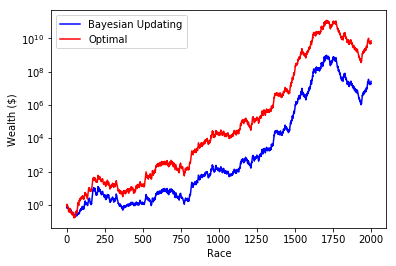

In [6]:
plot_wealth(bayesian_portfolio_history, optimal_portfolio_history, num_races)

### Probability estimates

Since the Bayesian updating portfolio keeps a running estimate of the probabilities $p(i)$, we can plot the final estimates of the portfolio, together with the uncertainty on those estimates. 

In [7]:
from scipy.stats import norm

mean = bayesian_portfolio.mean()
std_dev = np.sqrt(dirichlet.var(bayesian_portfolio.concentration_params()))
x = np.linspace(norm.ppf(0.6), norm.ppf(0.8), 100)
pdf = []
for i in range(len(odds)):
    pdf.append(norm.pdf(x, mean[i], std_dev[i]) / 100)

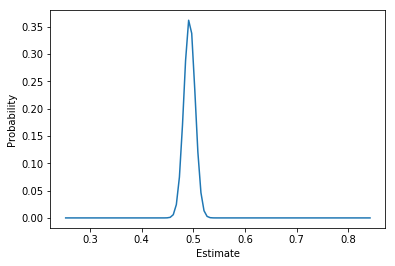

In [8]:
# example: probability of horse 1 winning the race with uncertainty
plt.plot(x, pdf[0])
plt.xlabel('Estimate')
plt.ylabel('Probability')

# Future Work

The question is: can the performance of the Bayesian updating portfolio be improved? The objective function of the Kelly criterion expects that we know the *exact probabilities*. In the case of Bayesian updating, we only know estimates. Can the Kelly criterion be reformulated to be more robust, for instance? 